IMPORTING LIBRARIES

In [ ]:
# Filtering Warnings
import warnings
warnings.filterwarnings('ignore')

#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
pd.set_option('display.max_columns', 300) #Setting column display limit
plt.style.use('ggplot') #Applying style to graphs

In [ ]:
# mounting google drive to google colab
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


LOAD DATA

In [ ]:
#app_df = pd.read_csv('application_data.csv')

app_df = pd.read_csv('/content/drive/MyDrive/ml_projects/creditdefaultrisk/application_data.csv')

DATA PRE-PROCESSING

In [ ]:
#dimension of dataset

app_df.shape

(307511, 122)

In [ ]:
#preview first and last 5 rows

app_df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment       

In [ ]:
app_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [ ]:
#Statistical description

app_df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

NULL CHECKING AND HANDLING

In [ ]:
#null checking

(app_df.isnull().sum()/len(app_df)*100).sort_values(ascending = False).head(50)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_MEDI                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MODE               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MEDI               58.515956
EXT_SOURCE_1                    56.381073
NONLIVINGAREA_MODE              55.179164
NONLIVINGAREA_AVG               55.179164
NONLIVINGAREA_MEDI              55.179164
ELEVATORS_MODE                  53.295980
ELEVATORS_AVG                   53.295980
ELEVATORS_MEDI                  53.295980
WALLSMATERIAL_MODE              50.840783
APARTMENTS_AVG                  50.749729
APARTMENTS_MODE                 50.749729
APARTMENTS_MEDI                 50.749729
ENTRANCES_AVG                   50.348768
ENTRANCES_MODE                  50.348768
ENTRANCES_MEDI                  50.348768
LIVINGAREA_AVG                  50.193326
LIVINGAREA_MODE                 50.193326
LIVINGAREA_MEDI                 50.193326
HOUSETYPE_MODE                  50.176091
FLOORSMAX_MODE                  49.760822
FLOORSMAX_MEDI                  49.760822
FLOORSMAX_AVG                   49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
dtype: float64

It is evident that there are lots of columns with missing values. We need to investigate further and drop columns with null values higher than 40%.

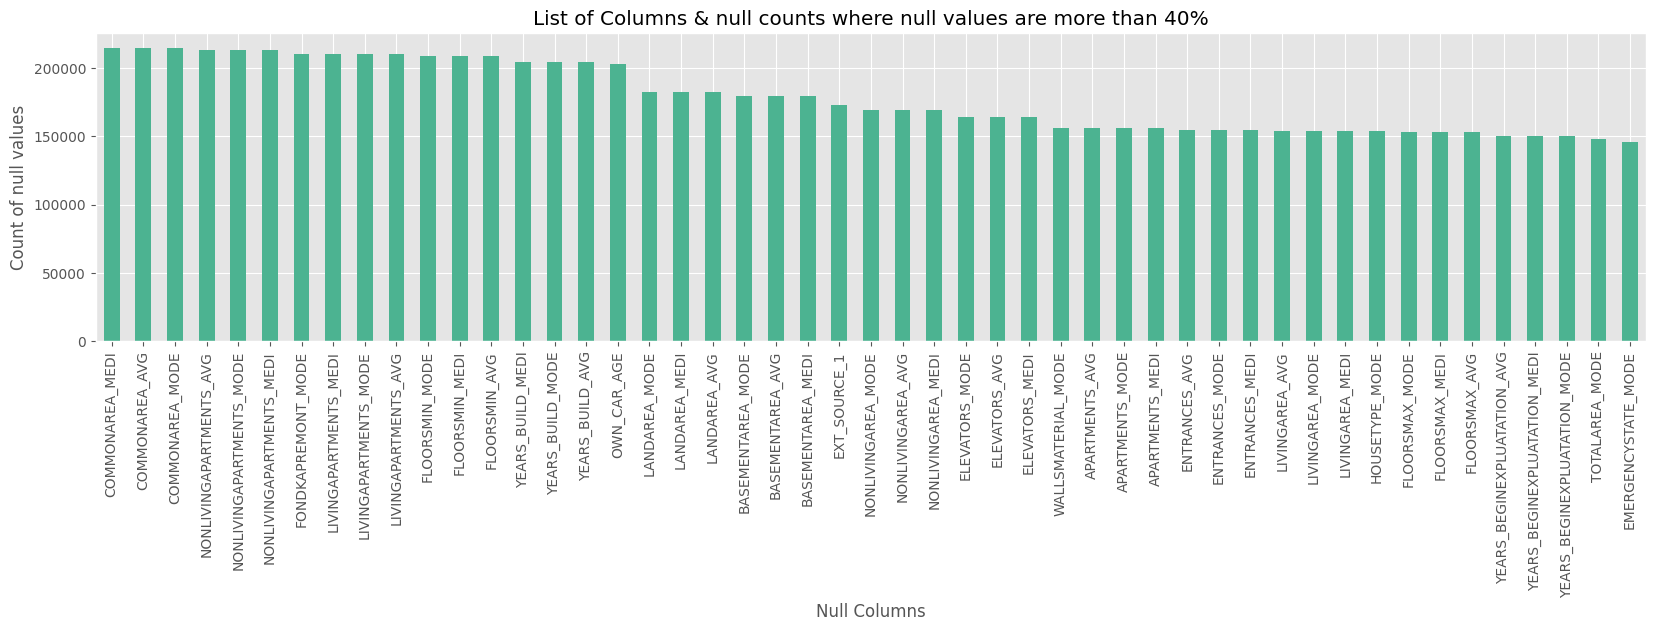

In [ ]:
null_col = app_df.isnull().sum().sort_values(ascending = False)
null_col = null_col[null_col.values >(0.40*len(app_df))]


#Plotting Bar Graph for null values greater than 40%

plt.figure(figsize=(20,4))
null_col.plot(kind='bar', color="#4CB391")
plt.title('List of Columns & null counts where null values are more than 40%')

plt.xlabel("Null Columns",fontdict={"fontsize":12,"fontweight":5})
plt.ylabel("Count of null values",fontdict={"fontsize":12,"fontweight":5})
plt.show()

In [ ]:
len(null_col)

49

CORRELATION ANALYSIS

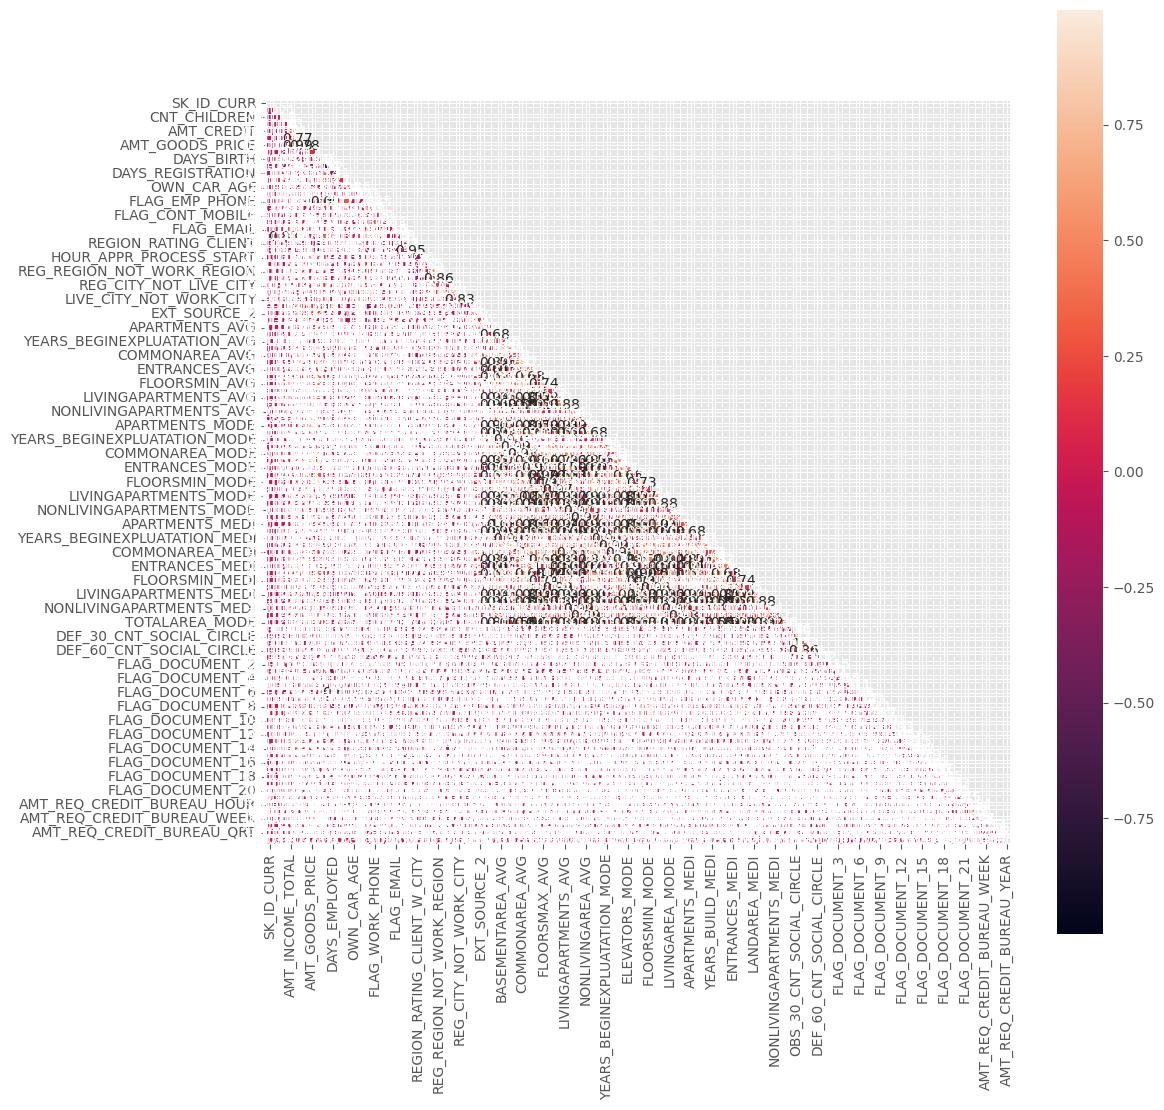

In [ ]:
#using a heatmap to show correlation

fig, ax = plt.subplots(figsize=(12,12))
mask = np.triu(np.ones_like(app_df.corr(numeric_only=True), dtype=bool))
sns.heatmap(app_df.corr(numeric_only=True), linewidths=0.5, mask=mask, square=True, ax=ax, annot=True);

In [ ]:
#Correlated columns with target

correlation=app_df.corr(numeric_only=True)
top_positive_corr = correlation.TARGET.sort_values(ascending=False).head(5).index.to_list()
top_negative_corr = correlation.TARGET.sort_values(ascending=True).head(5).index.to_list()
print(top_positive_corr)
print(top_negative_corr)

['TARGET', 'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'DAYS_LAST_PHONE_CHANGE']
['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_EMPLOYED', 'FLOORSMAX_AVG']


In [ ]:
top_corr_columns = []
top_corr_columns = top_positive_corr + top_negative_corr
print(top_corr_columns)

['TARGET', 'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'DAYS_LAST_PHONE_CHANGE', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_EMPLOYED', 'FLOORSMAX_AVG']


In [ ]:
cols_to_drop = list(null_col.index.values) #Making list of column names having null values greater than 40%

In [ ]:
#Removing top correlated columns from columns to be dropped

for col in top_corr_columns:
    if col in cols_to_drop:
        cols_to_drop.remove(col)
        print(col)

EXT_SOURCE_1
FLOORSMAX_AVG


In [ ]:
len(cols_to_drop)

47

In [ ]:
app_df.drop(labels = cols_to_drop,axis=1,inplace = True) #Dropping those columns

In [ ]:
app_df.shape

(307511, 75)

In [ ]:
#Checking for left-out columns with null

null_left = (app_df.isnull().sum()/len(app_df)*100).sort_values(ascending = False).head(20)
null_left

EXT_SOURCE_1                  56.381073
FLOORSMAX_AVG                 49.760822
OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
NAME_TYPE_SUITE                0.420148
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
dtype: float64

We need to further analyse the individual features to decide how their null values will be handled.

In [ ]:
#EXT_SOURCE_3, EXT_SOURCE_2 AND EXT_SOURCE_1
#This are continous variables, we check for skewness

app_df['EXT_SOURCE_3'].skew()

-0.4093904596160267

In [ ]:
app_df['EXT_SOURCE_2'].skew()

-0.7935760449636996

In [ ]:
app_df['EXT_SOURCE_1'].skew()

-0.06875505870176415

In [ ]:
app_df.EXT_SOURCE_3.fillna(app_df.EXT_SOURCE_3.median() , inplace = True)

app_df.EXT_SOURCE_2.fillna(app_df.EXT_SOURCE_2.median() , inplace = True)

app_df.EXT_SOURCE_1.fillna(app_df.EXT_SOURCE_1.median() , inplace = True)

In [ ]:
#Since this is an average computation based column, hence we fill NaN values with median

app_df['FLOORSMAX_AVG'].fillna(app_df['FLOORSMAX_AVG'].median(),inplace=True)

In [ ]:
#OCCUPATION_TYPE COLUMN

app_df['OCCUPATION_TYPE'].isnull().sum()

96391

In [ ]:
app_df.OCCUPATION_TYPE.value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [ ]:
occ_type_null = app_df[app_df['OCCUPATION_TYPE'].isnull()]
occ_type_null.head(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
8       100011       0         Cash loans           F            N   
11      100015       0         Cash loans           F            N   
23      100027       0         Cash loans           F            N   
28      100033       0         Cash loans           M            Y   
30      100035       0         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
8                Y             0        112500.000   1019610.0      33826.5   
11               Y             0         38419.155    148365.0      10678.5   
23               Y             0         83250.000    239850.0      23850.0   
28               Y             0        270000.000    790830.0      57676.5   
30               Y             0        292500.000    665892.0      24592.5   

    AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
8          913500.0        Children             Pensioner   
11         135000.0        Children             Pensioner   
23         225000.0   Unaccompanied             Pensioner   
28         675000.0   Unaccompanied         State servant   
30         477000.0   Unaccompanied  Commercial associate   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
8   Secondary / secondary special               Married  House / apartment   
11  Secondary / secondary special               Married  House / apartment   
23  Secondary / secondary special               Married  House / apartment   
28               Higher education  Single / not married  House / apartment   
30  Secondary / secondary special        Civil marriage  House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
8                     0.018634      -20099         365243            -7427.0   
11                    0.015221      -20417         365243            -5246.0   
23                    0.006296      -24827         365243            -9012.0   
28                    0.046220       -9994          -1796            -4668.0   
30                    0.025164      -15280          -2668            -5266.0   

    DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
8             -3514           1               0                0   
11            -2512           1               0                0   
23            -3684           1               0                0   
28            -2661           1               1                0   
30            -3787           1               1                0   

    FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
8                  1           0           0             NaN              2.0   
11                 1           1           0             NaN              2.0   
23                 1           1           0             NaN              2.0   
28                 1           0           1             NaN              1.0   
30                 1           0           1             NaN              2.0   

    REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
8                      2                            2   
11                     2                            2   
23                     3                            3   
28                     1                            1   
30                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
8                   WEDNESDAY                       14   
11                     FRIDAY                        7   
23                     FRIDAY                       12   
28                  WEDNESDAY                       11   
30                  WEDNESDAY                       13   

    REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
8                            0                           0   
11                           0                           0   
23               

In [ ]:
#OCCUPATION_TYPE against NAME_INCOME_TYPE

occ_type_null[['NAME_INCOME_TYPE','OCCUPATION_TYPE']].head(20)

NAME_INCOME_TYPE OCCUPATION_TYPE
8              Pensioner             NaN
11             Pensioner             NaN
23             Pensioner             NaN
28         State servant             NaN
30  Commercial associate             NaN
38             Pensioner             NaN
43             Pensioner             NaN
44               Working             NaN
46             Pensioner             NaN
52               Working             NaN
54             Pensioner             NaN
56             Pensioner             NaN
62             Pensioner             NaN
63               Working             NaN
76  Commercial associate             NaN
79             Pensioner             NaN
81             Pensioner             NaN
82               Working             NaN
84             Pensioner             NaN
88               Working             NaN

By investigating the first 20 null observations of OCCUPATION_TYPE against equivalent NAME_INCOME_TYPE observations, It was observed that the 12 NaN values are associated with Pensioner.

On this evidence, NaN observations will be replaced with 'Pensioner' in 'OCCUPATION_TYPE' feature.

In [ ]:
app_df['OCCUPATION_TYPE'].fillna('Pensioner',inplace=True)

In [ ]:
app_df['OCCUPATION_TYPE'].isnull().sum()

0

Since the columns are negatively skewed, we replace NaN with median values

In [ ]:
#AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_WEEK
#AMT_REQ_CREDIT_BUREAU_MON AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR

#Since these are numeric columns and percentage of null values are below 15% for all columns, filling NaN values with Mode is advisable.

app_df.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(app_df.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0],inplace = True)

app_df.AMT_REQ_CREDIT_BUREAU_MON.fillna(app_df.AMT_REQ_CREDIT_BUREAU_MON.mode()[0],inplace = True)

app_df.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(app_df.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0],inplace = True)

app_df.AMT_REQ_CREDIT_BUREAU_DAY.fillna(app_df.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0],inplace = True)

app_df.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(app_df.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0],inplace = True)

app_df.AMT_REQ_CREDIT_BUREAU_QRT.fillna(app_df.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0],inplace = True)

In [ ]:
#NAME_TYPE_SUITE

#This is a categorical column, we will replace with Mode

app_df.NAME_TYPE_SUITE.fillna(app_df.NAME_TYPE_SUITE.mode()[0],inplace = True)

In [ ]:
#OBS_30_CNT_SOCIAL_CIRCLE DEF_30_CNT_SOCIAL_CIRCLE
#OBS_60_CNT_SOCIAL_CIRCLE DEF_60_CNT_SOCIAL_CIRCLE

#These are count columns based on observed and defaulted DPD, It's better to replace NaN with Zero by assuming missing values are as a result of no observable or defaulted connections within the specified days.

OBS_DEF_columns = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']

for column in OBS_DEF_columns:
    app_df[column].fillna(0, inplace=True)

In [ ]:
#AMT_ANNUITY AMT_GOODS_PRICE
#These are continuous variables, we check for skewness

app_df['AMT_ANNUITY'].skew()

1.5797773638612507

In [ ]:
app_df['AMT_GOODS_PRICE'].skew()

1.3490003414747445

Since both columns are positively skewed, we replace NaN with median values

In [ ]:
app_df['AMT_ANNUITY'].fillna(app_df['AMT_ANNUITY'].median(),inplace=True)
app_df['AMT_GOODS_PRICE'].fillna(app_df['AMT_GOODS_PRICE'].median(),inplace=True)

In [ ]:
#CNT_FAM_MEMBERS
#This is a numeric count column, we replace with Mode

app_df.CNT_FAM_MEMBERS.fillna(app_df.CNT_FAM_MEMBERS.mode()[0] , inplace = True)

In [ ]:
#DAYS_LAST_PHONE_CHANGE

app_df['DAYS_LAST_PHONE_CHANGE'].head(5)

0   -1134.0
1    -828.0
2    -815.0
3    -617.0
4   -1106.0
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [ ]:
'''
This is a numeric column,
1. values will be standardized by taking absolute values
2. replace few missing values with Mode
'''
app_df['DAYS_LAST_PHONE_CHANGE']=app_df['DAYS_LAST_PHONE_CHANGE'].abs()

In [ ]:
app_df['DAYS_LAST_PHONE_CHANGE'].fillna(app_df['DAYS_LAST_PHONE_CHANGE'].mode,inplace=True)

In [ ]:
null_check = (app_df.isnull().sum()/len(app_df)*100).sort_values(ascending = False)
null_check

AMT_REQ_CREDIT_BUREAU_YEAR    0.0
SK_ID_CURR                    0.0
TARGET                        0.0
FLAG_DOCUMENT_12              0.0
FLAG_DOCUMENT_13              0.0
                             ... 
CNT_CHILDREN                  0.0
AMT_INCOME_TOTAL              0.0
AMT_CREDIT                    0.0
AMT_ANNUITY                   0.0
AMT_GOODS_PRICE               0.0
Length: 75, dtype: float64

No further missing values

DATA CLEANING - HANDLE NEGATIVE VALUES

In [ ]:
#Due to observation on "DAYS_LAST_PHONE_CHANGE" column, there is a need to inspect similar columns with days

app_df_days = [i for i in app_df if i.startswith('DAYS')]

app_df_days.remove("DAYS_LAST_PHONE_CHANGE")

In [ ]:
app_df[app_df_days]

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH
0            -9461           -637            -3648.0            -2120
1           -16765          -1188            -1186.0             -291
2           -19046           -225            -4260.0            -2531
3           -19005          -3039            -9833.0            -2437
4           -19932          -3038            -4311.0            -3458
...            ...            ...                ...              ...
307506       -9327           -236            -8456.0            -1982
307507      -20775         365243            -4388.0            -4090
307508      -14966          -7921            -6737.0            -5150
307509      -11961          -4786            -2562.0             -931
307510      -16856          -1262            -5128.0             -410

[307511 rows x 4 columns]

Since the data in DAYS columns are negative values, they need to be standardized by taking the absolute values.

In [ ]:
app_df[app_df_days] = abs(app_df[app_df_days])

app_df[app_df_days].head()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH
0        9461            637             3648.0             2120
1       16765           1188             1186.0              291
2       19046            225             4260.0             2531
3       19005           3039             9833.0             2437
4       19932           3038             4311.0             3458

DATA CLEANING - HANDLE COLUMN WITH XNA VALUES

In [ ]:
#GENDER

app_df['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [ ]:
#We replace the XNA values with 'F' which is the highest occuring gender

app_df.loc[app_df.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F'
app_df['CODE_GENDER'].value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

In [ ]:
#ORGANIZATION_TYPE

app_df['ORGANIZATION_TYPE'].value_counts().head()

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Name: count, dtype: int64

In [ ]:
#We compare ORGANIZATION_TYPE XNA observations against NAME_INCOME_TYPE

org_type_xna = app_df[app_df['ORGANIZATION_TYPE'] == 'XNA']
org_type_xna[['ORGANIZATION_TYPE','NAME_INCOME_TYPE']].head(10)

ORGANIZATION_TYPE NAME_INCOME_TYPE
8                XNA        Pensioner
11               XNA        Pensioner
23               XNA        Pensioner
38               XNA        Pensioner
43               XNA        Pensioner
46               XNA        Pensioner
54               XNA        Pensioner
56               XNA        Pensioner
62               XNA        Pensioner
79               XNA        Pensioner

By investigating the first 10 record of NAME_INCOME_TYPE against ORGANIZATION_TYPE features, It was observed that ORGANIZATION_TYPE's XNA values are associated with Pensioner.

On this evidence, XNA values will be replaced with 'Pensioner' in 'ORGANIZATION_TYPE' feature.

In [ ]:
app_df['ORGANIZATION_TYPE'] = app_df['ORGANIZATION_TYPE'].replace('XNA', 'Pensioner')
app_df['ORGANIZATION_TYPE'].value_counts().head()

ORGANIZATION_TYPE
Business Entity Type 3    67992
Pensioner                 55374
Self-employed             38412
Other                     16683
Medicine                  11193
Name: count, dtype: int64

FEATURE ENGINEERING - BINNING AND GROUPING

In [ ]:
#DAYS_BIRTH

app_df['DAYS_BIRTH']= (app_df['DAYS_BIRTH']/365).astype(int)
app_df['DAYS_BIRTH'].unique()

array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

In [ ]:
app_df['AGE_GROUP']=pd.cut(app_df['DAYS_BIRTH'],
                         bins=[19,25,40,60,100], labels=['Very_Young','Youth', 'Middle_Age', 'Elder'])

In [ ]:
app_df[['DAYS_BIRTH','AGE_GROUP']]

DAYS_BIRTH   AGE_GROUP
0               25  Very_Young
1               45  Middle_Age
2               52  Middle_Age
3               52  Middle_Age
4               54  Middle_Age
...            ...         ...
307506          25  Very_Young
307507          56  Middle_Age
307508          41  Middle_Age
307509          32       Youth
307510          46  Middle_Age

[307511 rows x 2 columns]

In [ ]:
#AMT_CREDIT

app_df['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [ ]:
#Bin into groups

bin_edges = [45000, 270000, 513531, 808650, 1200000, 1600000, 2000000, 2500000, 4050000]
bin_labels = ['45k-270k', '270k-513.5k', '513.5k-808.65k', '808.65k-1.2M', '1.2M-1.6M', '1.6M-2M', '2M-2.5M', '2.5M-4.05M']

In [ ]:
# Create a new column 'AMT_CREDIT_GROUP' based on the bins and labels

app_df['AMT_CREDIT_GROUP'] = pd.cut(app_df['AMT_CREDIT'], bins=bin_edges, labels=bin_labels, right=False)

In [ ]:
app_df['AMT_CREDIT_GROUP'].value_counts()

AMT_CREDIT_GROUP
270k-513.5k       82480
513.5k-808.65k    73823
45k-270k          71180
808.65k-1.2M      52169
1.2M-1.6M         21161
1.6M-2M            4669
2M-2.5M            1668
2.5M-4.05M          353
Name: count, dtype: int64

In [ ]:
#AMT_INCOME_TOTAL

app_df.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [ ]:
income_bins = [25650, 75000, 112500, 135000, 157500, 180000, 202500, 225000, 117000000]
income_labels = ["26k to 75k", "75k to 112.5k", "112.5k to 135k", "135k to 157.5k", "157.5k to 180k", "180k to 202.5k", "202.5k to 225k", "225k to 117M"]

In [ ]:
# Creating a new column INCOME_GROUP
app_df['AMT_INCOME_GROUP'] = pd.cut(app_df['AMT_INCOME_TOTAL'], bins=income_bins, labels=income_labels)

In [ ]:
app_df.AMT_INCOME_GROUP.value_counts()

AMT_INCOME_GROUP
75k to 112.5k     76686
112.5k to 135k    48849
225k to 117M      47118
135k to 157.5k    33628
157.5k to 180k    32529
202.5k to 225k    24420
26k to 75k        23890
180k to 202.5k    20389
Name: count, dtype: int64

    RE-CONFIRMING DATASET AFTER BINNING

In [ ]:
app_df.shape

(307511, 78)

In [ ]:
app_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801          25            637             3648.0   
1                    0.003541          45           1188             1186.0   
2                    0.010032          52            225             4260.0   
3                    0.008019          52           3039             9833.0   
4                    0.028663          54           3038             4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [ ]:
app_df.isnull().sum().sort_values(ascending=False).head()

AMT_CREDIT_GROUP    8
AMT_INCOME_GROUP    2
FLAG_DOCUMENT_10    0
FLAG_DOCUMENT_8     0
FLAG_DOCUMENT_7     0
dtype: int64

There are still null values in 'AMT_CREDIT_GROUP' and 'AMT_INCOME_GROUP'. We need to investigate.

In [ ]:
amt_credit_grp_null = app_df[app_df['AMT_CREDIT_GROUP'].isnull()]
amt_credit_grp_null[['AMT_CREDIT','AMT_CREDIT_GROUP']].head(8)

AMT_CREDIT AMT_CREDIT_GROUP
14852    4050000.0              NaN
17948    4050000.0              NaN
110459   4050000.0              NaN
119681   4050000.0              NaN
120757   4050000.0              NaN
133766   4050000.0              NaN
287732   4050000.0              NaN
288455   4050000.0              NaN

In [ ]:
amt_inc_grp_null = app_df[app_df['AMT_INCOME_GROUP'].isnull()]
amt_inc_grp_null[['AMT_INCOME_TOTAL','AMT_INCOME_GROUP']].head(2)

AMT_INCOME_TOTAL AMT_INCOME_GROUP
1678            25650.0              NaN
20727           25650.0              NaN

We can observe that all null values in 'AMT_CREDIT_GROUP' has 'AMT_CREDIT' of 4,050,000.0, while null values of 'AMT_INCOME_GROUP' has 'AMT_INCOME_TOTAL' of 25,650.0.

Hence, we input the null values with respective AMT_CREDIT and AMT_INCOME_TOTAL.

In [ ]:
app_df.AMT_CREDIT_GROUP.fillna('2.5M-4.05M',inplace = True)
app_df.AMT_INCOME_GROUP.fillna('225k to 117M',inplace = True)

In [ ]:
app_df.isnull().sum().sort_values(ascending=False).head()

AMT_INCOME_GROUP      0
SK_ID_CURR            0
TARGET                0
NAME_CONTRACT_TYPE    0
CODE_GENDER           0
dtype: int64

No further null values

EXPLORATORY DATA ANALYSIS

In [ ]:
#DATA IMBALANCE CHECK

target_counts = app_df['TARGET'].value_counts()
target_counts

TARGET
0    282686
1     24825
Name: count, dtype: int64

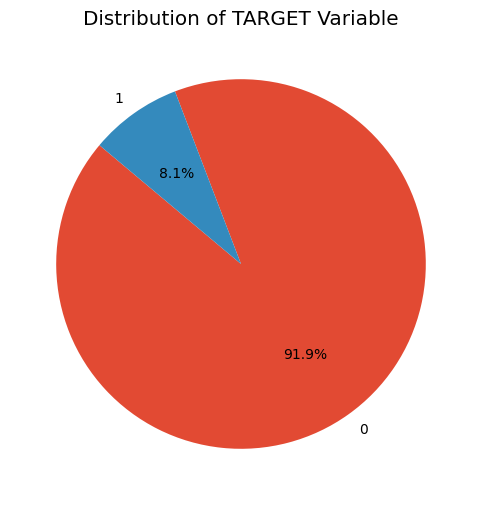

In [ ]:
# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of TARGET Variable')
plt.show()

This reveals that 8.1% of the dataset are defaulting customers while 91.9% are not.

In [ ]:
Target0 = app_df.loc[app_df["TARGET"]==0]
Target1 = app_df.loc[app_df["TARGET"]==1]

round(len(Target0)/len(Target1),2)

11.39

The imbalance ratio of non-defaulters to defaulter is "11.39". This simply means for every one defaulter, there is approximately 11 non-defaulters. Hence, ROC AUC curve will be better suited to evaluate selected models in predictive modelling section.

UNIVARIATE ANALYSIS

In [ ]:
app_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 78 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [ ]:
#The datatype of categorical columns below will be changed to category to suit univariate analysis
app_df['NAME_CONTRACT_TYPE'] = app_df['NAME_CONTRACT_TYPE'].astype('category')
app_df['CODE_GENDER'] = app_df['CODE_GENDER'].astype('category')
app_df['NAME_TYPE_SUITE'] = app_df['NAME_TYPE_SUITE'].astype('category')
app_df['NAME_INCOME_TYPE'] = app_df['NAME_INCOME_TYPE'].astype('category')
app_df['NAME_EDUCATION_TYPE'] = app_df['NAME_EDUCATION_TYPE'].astype('category')
app_df['NAME_FAMILY_STATUS'] = app_df['NAME_FAMILY_STATUS'].astype('category')
app_df['NAME_HOUSING_TYPE'] = app_df['NAME_HOUSING_TYPE'].astype('category')
app_df['OCCUPATION_TYPE'] = app_df['OCCUPATION_TYPE'].astype('category')
app_df['WEEKDAY_APPR_PROCESS_START'] = app_df['WEEKDAY_APPR_PROCESS_START'].astype('category')
app_df['ORGANIZATION_TYPE'] = app_df['ORGANIZATION_TYPE'].astype('category')

In [ ]:
#CONVERTING OBJECT DATATYPES TO NUMERICAL OR CATEGORICAL DATATYPE

app_df.select_dtypes(include='object').info()

app_df['FLAG_OWN_CAR'] = app_df['FLAG_OWN_CAR'].astype('category')
app_df['FLAG_OWN_REALTY'] = app_df['FLAG_OWN_REALTY'].astype('category')
app_df['DAYS_LAST_PHONE_CHANGE'] = pd.to_numeric(app_df['DAYS_LAST_PHONE_CHANGE'], errors= 'coerce')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   FLAG_OWN_CAR            307511 non-null  object
 1   FLAG_OWN_REALTY         307511 non-null  object
 2   DAYS_LAST_PHONE_CHANGE  307511 non-null  object
dtypes: object(3)
memory usage: 7.0+ MB


In [ ]:
#FINAL NULL CHECKING AND HANDLING

app_df.isnull().sum().sort_values(ascending=False).head()

DAYS_LAST_PHONE_CHANGE    1
FLAG_OWN_REALTY           0
FLAG_DOCUMENT_8           0
FLAG_DOCUMENT_7           0
FLAG_DOCUMENT_6           0
dtype: int64

In [ ]:
days_last_phone_change_null = app_df[app_df['DAYS_LAST_PHONE_CHANGE'].isnull()]
days_last_phone_change_null

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
15709      118330       0         Cash loans           M            Y   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
15709               Y             0          126000.0    278613.0   

       AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
15709      25911.0         252000.0   Unaccompanied          Working   

      NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
15709   Incomplete higher            Married  House / apartment   

       REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
15709                    0.010643          23            293   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
15709             4790.0             1075           0               1   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
15709                0                 1           0           0   

      OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
15709       Pensioner              2.0                     2   

       REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
15709                            2                     FRIDAY   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
15709                       13                           0   

       REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
15709                           0                            0   

       REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
15709                       0                       0   

       LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  \
15709                        0     Trade: type 3      0.505998      0.565961   

       EXT_SOURCE_3  FLOORSMAX_AVG  OBS_30_CNT_SOCIAL_CIRCLE  \
15709      0.535276          0.375                       0.0   

       DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
15709                       0.0                       0.0   

       DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  \
15709                       0.0                     NaN                0   

       FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
15709                0                0                0                0   

       FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  \
15709                0                1                0                 0   

       FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
15709                 0                 0                 0                 0   

       FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  \
15709                 0                 0                 0                 1   

       FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
15709                 0                 0                 0   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
15709                         0.0                        0.0   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
15709                         0.0                        0.0   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR   AGE_GROUP  \
15709                        0.0                         0.0  Very_Young   

      AMT_CREDIT_GROUP AMT_INCOME_GROUP  
15709      270k-513.5k   112.5k to 135k

In [ ]:
app_df['DAYS_LAST_PHONE_CHANGE'].fillna(app_df['DAYS_LAST_PHONE_CHANGE'].median(),inplace=True)
app_df.isnull().sum().sort_values(ascending=False).head()

AMT_INCOME_GROUP      0
SK_ID_CURR            0
TARGET                0
NAME_CONTRACT_TYPE    0
CODE_GENDER           0
dtype: int64

In [ ]:
'''
- After observations, these columns are recommended to be dropped due to less relevance for analysis and modelling
- A column is to be dropped provided it is not highly correlated with the target column
'''
drop_this_columns =['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','FLAG_EMAIL',
       'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

In [ ]:
#confirming that top correlated columns are not included among columns recommended to be dropped

for col in top_corr_columns:
    if col in drop_this_columns:
        drop_this_columns.remove(col)
        print(col)

In [ ]:
app_df[drop_this_columns].head()

FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           1   
1           1               1                0                 1           1   
2           1               1                1                 1           1   
3           1               1                0                 1           0   
4           1               1                0                 1           0   

   FLAG_EMAIL  FLAG_EMAIL  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  \
0           0           0                0                1                0   
1           0           0                0                1                0   
2           0           0                0                0                0   
3           0           0                0                1                0   
4           0           0                0                0                0   

   FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                1   

   FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  \
0                0                 0                 0                 0   
1                0                 0                 0                 0   
2                0                 0                 0                 0   
3                0                 0                 0                 0   
4                0                 0                 0                 0   

   FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_21  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [ ]:
app_df.drop(labels=drop_this_columns,axis=1,inplace=True)

In [ ]:
app_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

In [ ]:
app_df.shape

(307511, 52)

UNIVARIATE ANALYSIS

Text(0.5, 1.0, 'Gender Distribution for Defaulters')

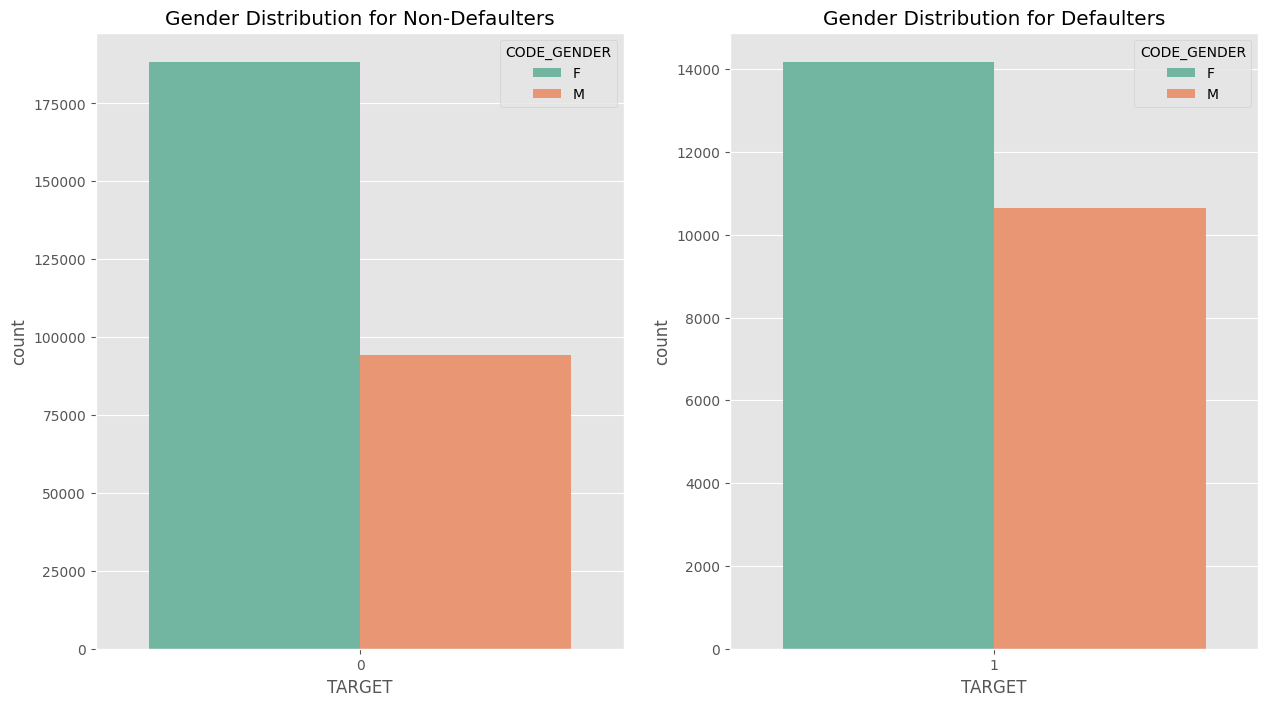

In [ ]:
#GENDER DISTRIBUTION FOR NON-DEFAULTERS AND DEFAULTERS
Target0 = app_df.loc[app_df["TARGET"] == 0]
Target1 = app_df.loc[app_df["TARGET"] == 1]

plt.figure(figsize=(15,8))
plt.subplot(121)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=Target0, palette = 'Set2')
plt.title("Gender Distribution for Non-Defaulters")
plt.subplot(122)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=Target1, palette = 'Set2')
plt.title("Gender Distribution for Defaulters")

Female clients applied more than than their male counterparts, but analysis revealed that the ratio of male defaulters is higher than female defaulters.

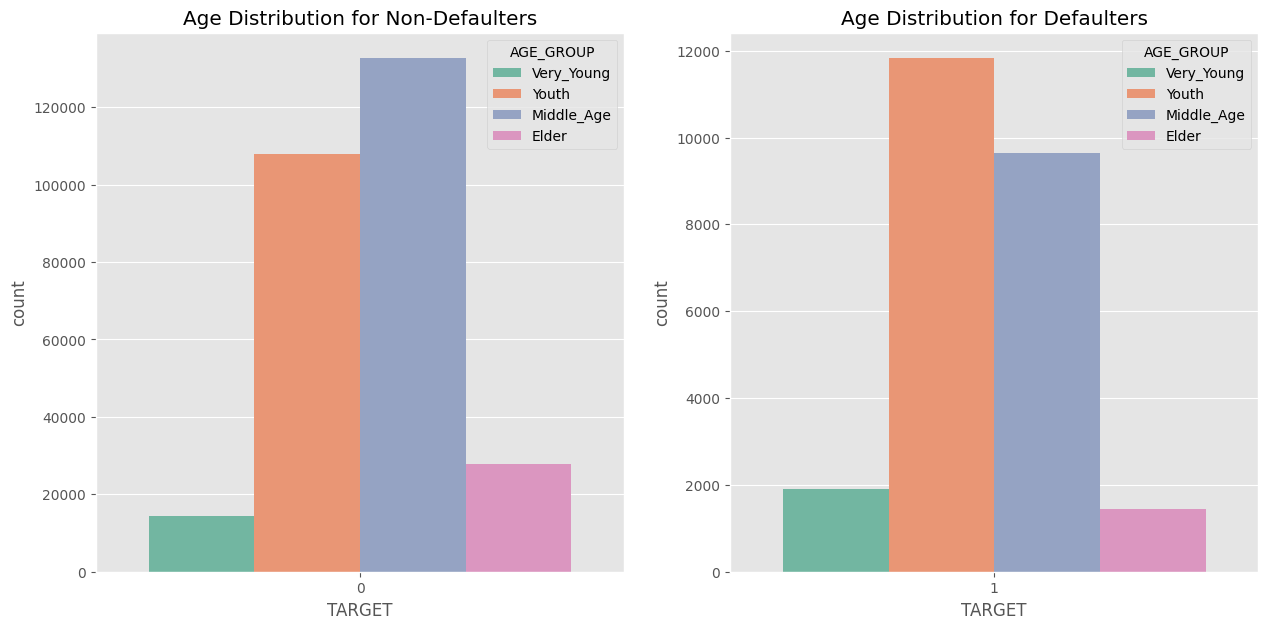

In [ ]:
#AGE DISTRIBUTION FOR NON-DEFAULTERS AND DEFAULTERS

plt.figure(figsize=(15,7))
plt.subplot(121)
sns.countplot(x='TARGET',hue='AGE_GROUP',data=Target0,palette='Set2')
plt.title("Age Distribution for Non-Defaulters")
plt.subplot(122)
sns.countplot(x='TARGET',hue='AGE_GROUP',data=Target1,palette='Set2')
plt.title("Age Distribution for Defaulters")
plt.show()

Analysis revealed that the Youth age group has the highest number of defaulters

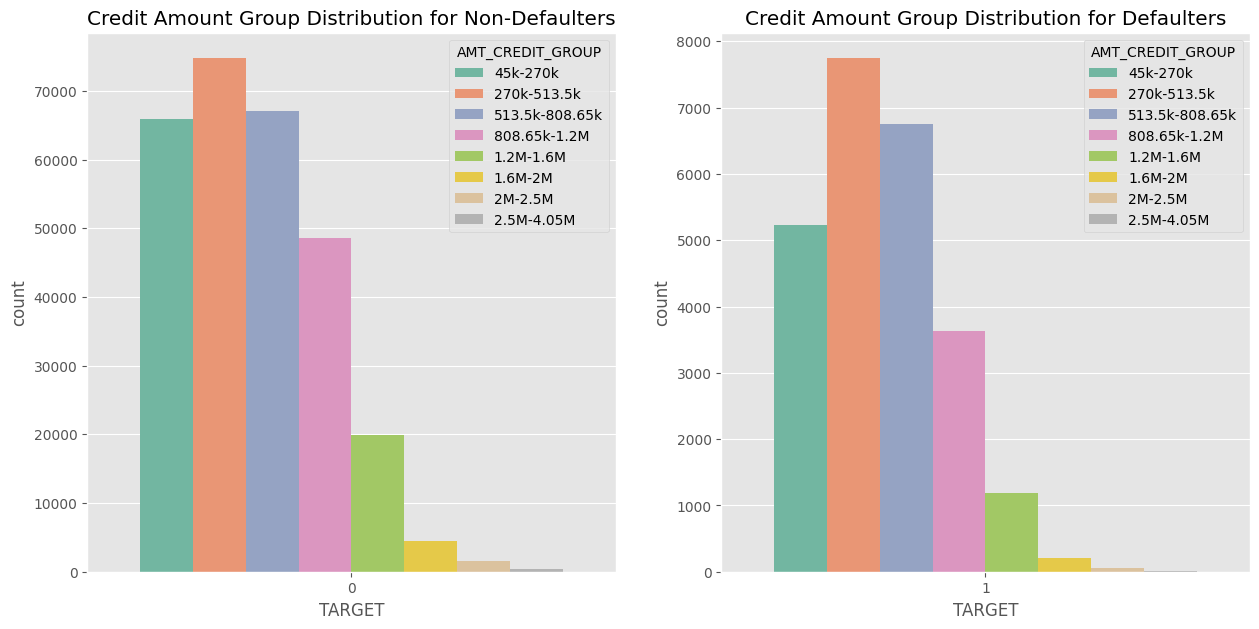

In [ ]:
#CREDIT AMOUNT DISTRIBUTION FOR NON-DEFAULTERS AND DEFAULTERS

plt.figure(figsize=(15,7))
plt.subplot(121)
sns.countplot(x='TARGET',hue='AMT_CREDIT_GROUP',data=Target0,palette='Set2')
plt.title("Credit Amount Group Distribution for Non-Defaulters")
plt.subplot(122)
sns.countplot(x='TARGET',hue='AMT_CREDIT_GROUP',data=Target1,palette='Set2')
plt.title("Credit Amount Group Distribution for Defaulters")
plt.show()

Analysis revealed that credit amount within 270k - 513.5k were granted most and also has the highest number of defaulters. Observing the ratio of amount granted to number of defaulters, people granted the most least amount of 45k - 270k had less difficulty paying back their loans.

UNIVARIATE ANALYSIS - CUSTOM FUNCTION

In [ ]:
categorical_col = list(app_df.select_dtypes(include= 'category').columns)

#Removing CODE_GENDER','AGE_GROUP', 'AMT_CREDIT_GROUP' because we have already taken up the insights from  above plots
categorical_col.remove('CODE_GENDER')
categorical_col.remove('AGE_GROUP')
categorical_col.remove('AMT_CREDIT_GROUP')

#Removing FLAG_OWN_CAR and FLAG_OWN_REALTY from categorical analysis
categorical_col.remove('FLAG_OWN_CAR')
categorical_col.remove('FLAG_OWN_REALTY')

categorical_col

['NAME_CONTRACT_TYPE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'AMT_INCOME_GROUP']

In [ ]:
def categorical_plot(var):
    plt.figure(figsize=(40,20))

    plt.rcParams['axes.labelpad'] = 50
    plt.subplot(1, 2, 1)
    sns.countplot(x='TARGET', hue=var, data=Target0, palette = 'Set3')
    plt.xlabel(var, fontsize= 30, fontweight="bold")
    plt.ylabel('NON DEFAULTERS', fontsize= 30, fontweight="bold")
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)


    plt.rcParams['axes.labelpad'] = 50
    plt.subplot(1, 2, 2)
    sns.countplot(x='TARGET', hue=var, data=Target1, palette = 'Set1')
    plt.xlabel(var, fontsize= 30, fontweight="bold")
    plt.ylabel('DEFAULTERS', fontsize= 30, fontweight="bold")
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)
    plt.show()

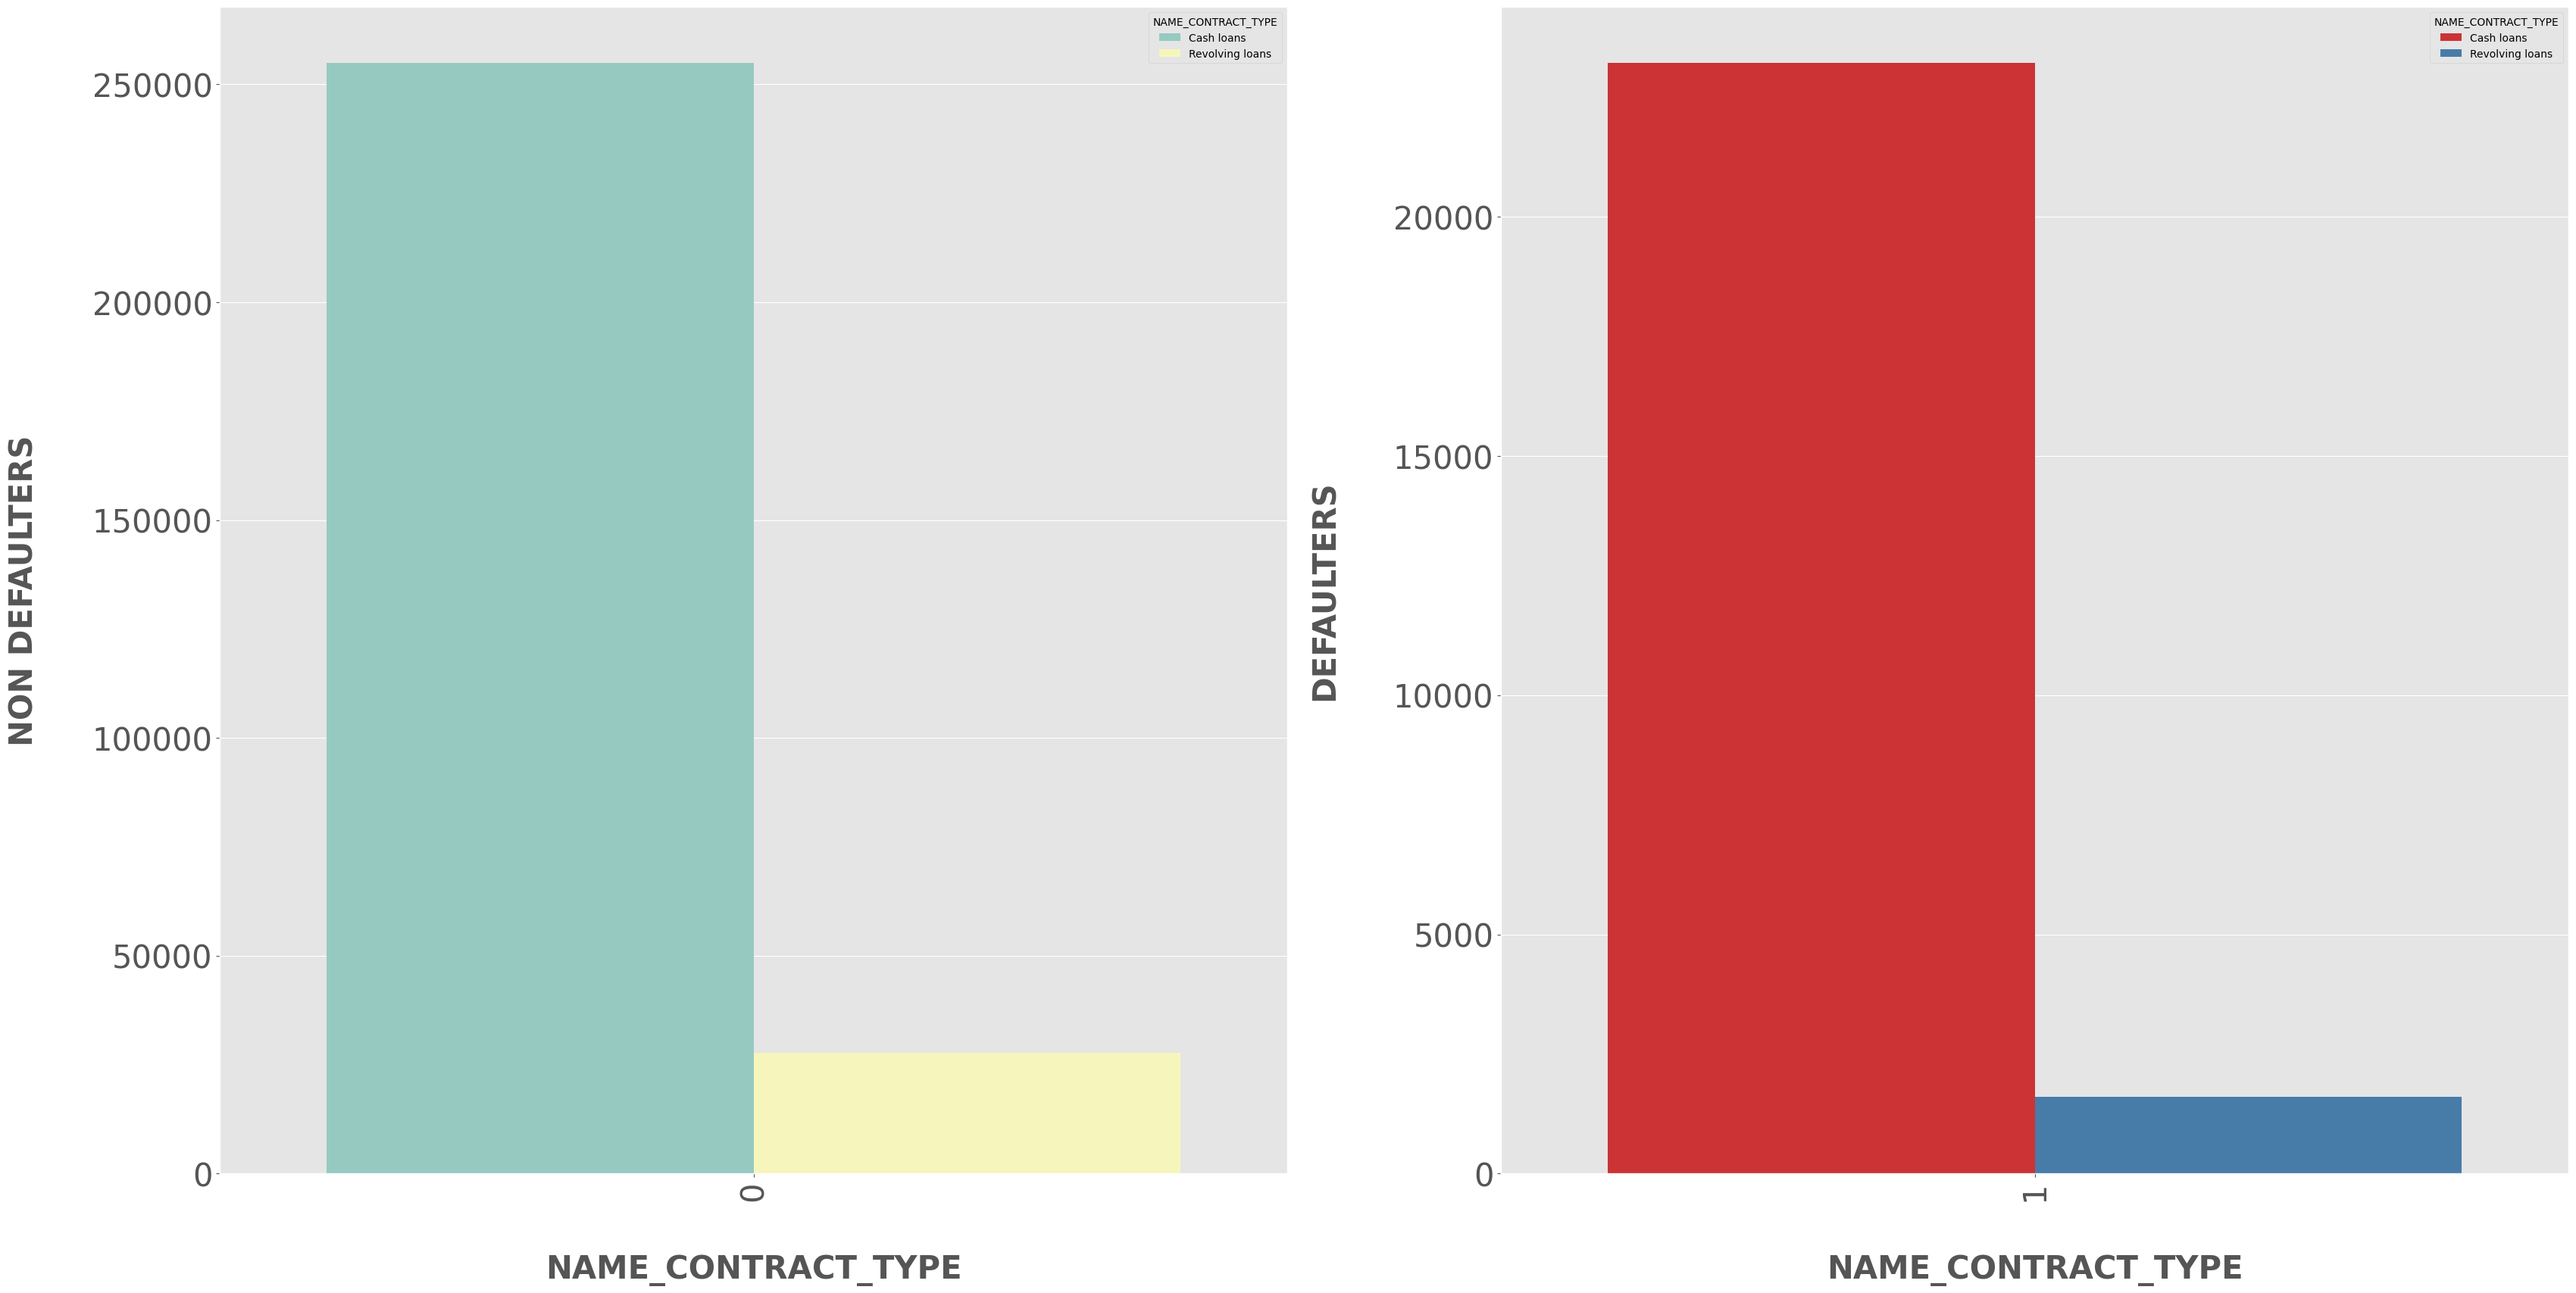

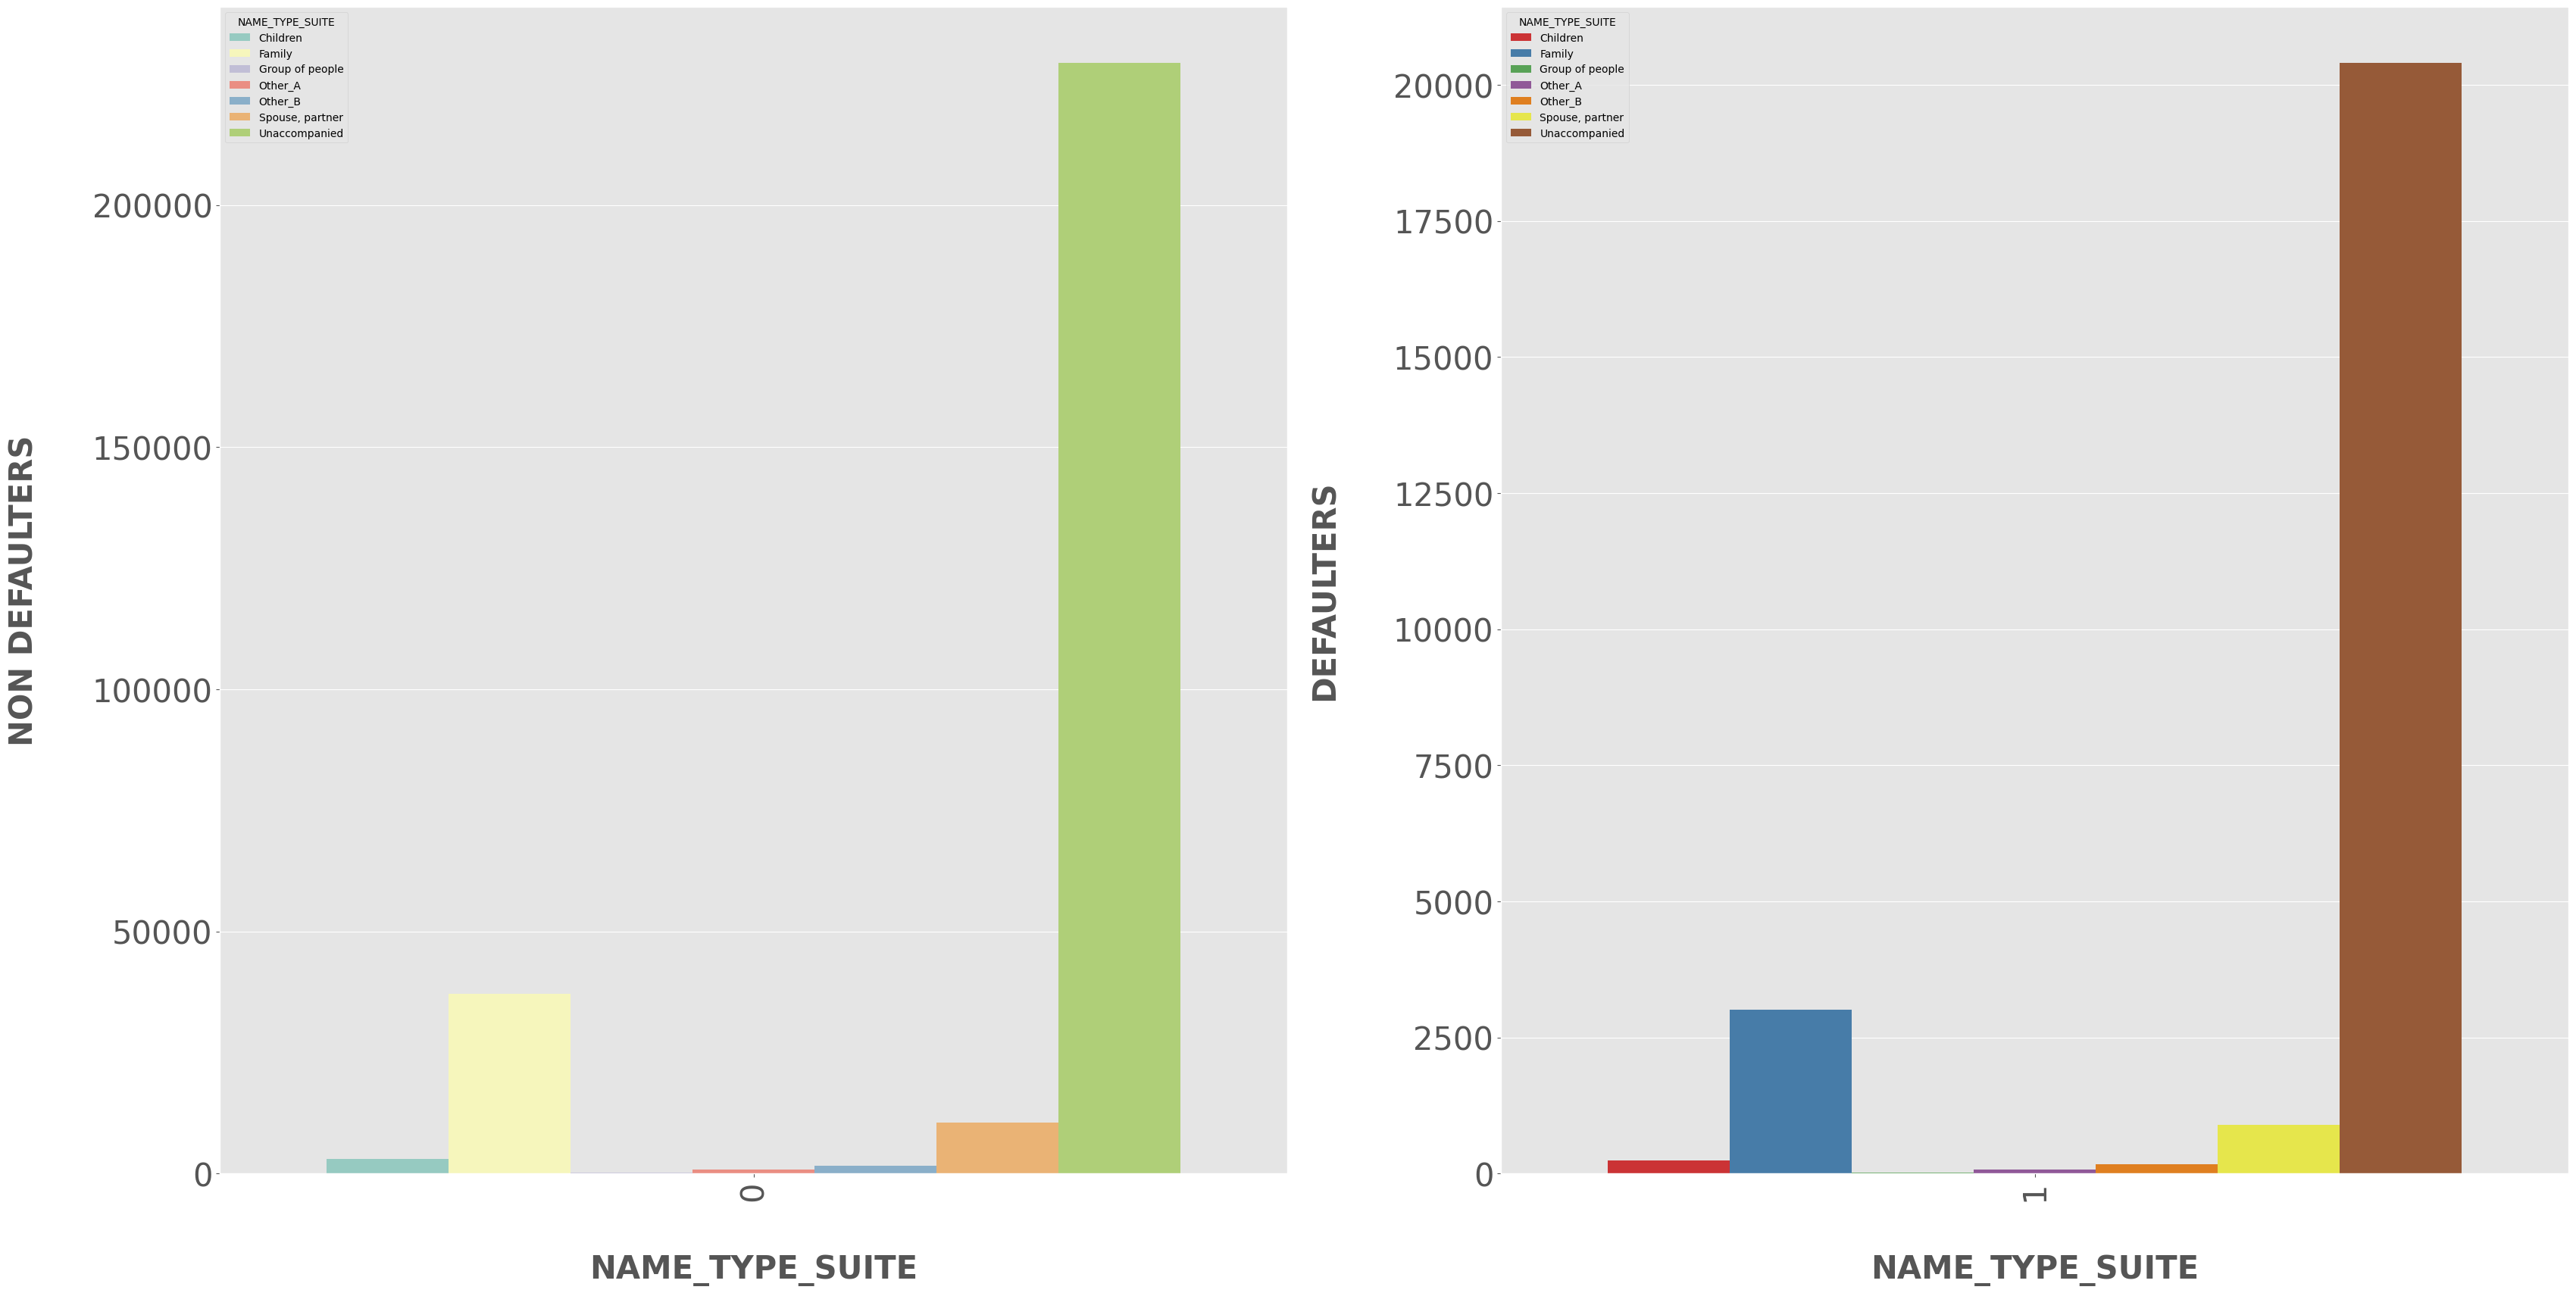

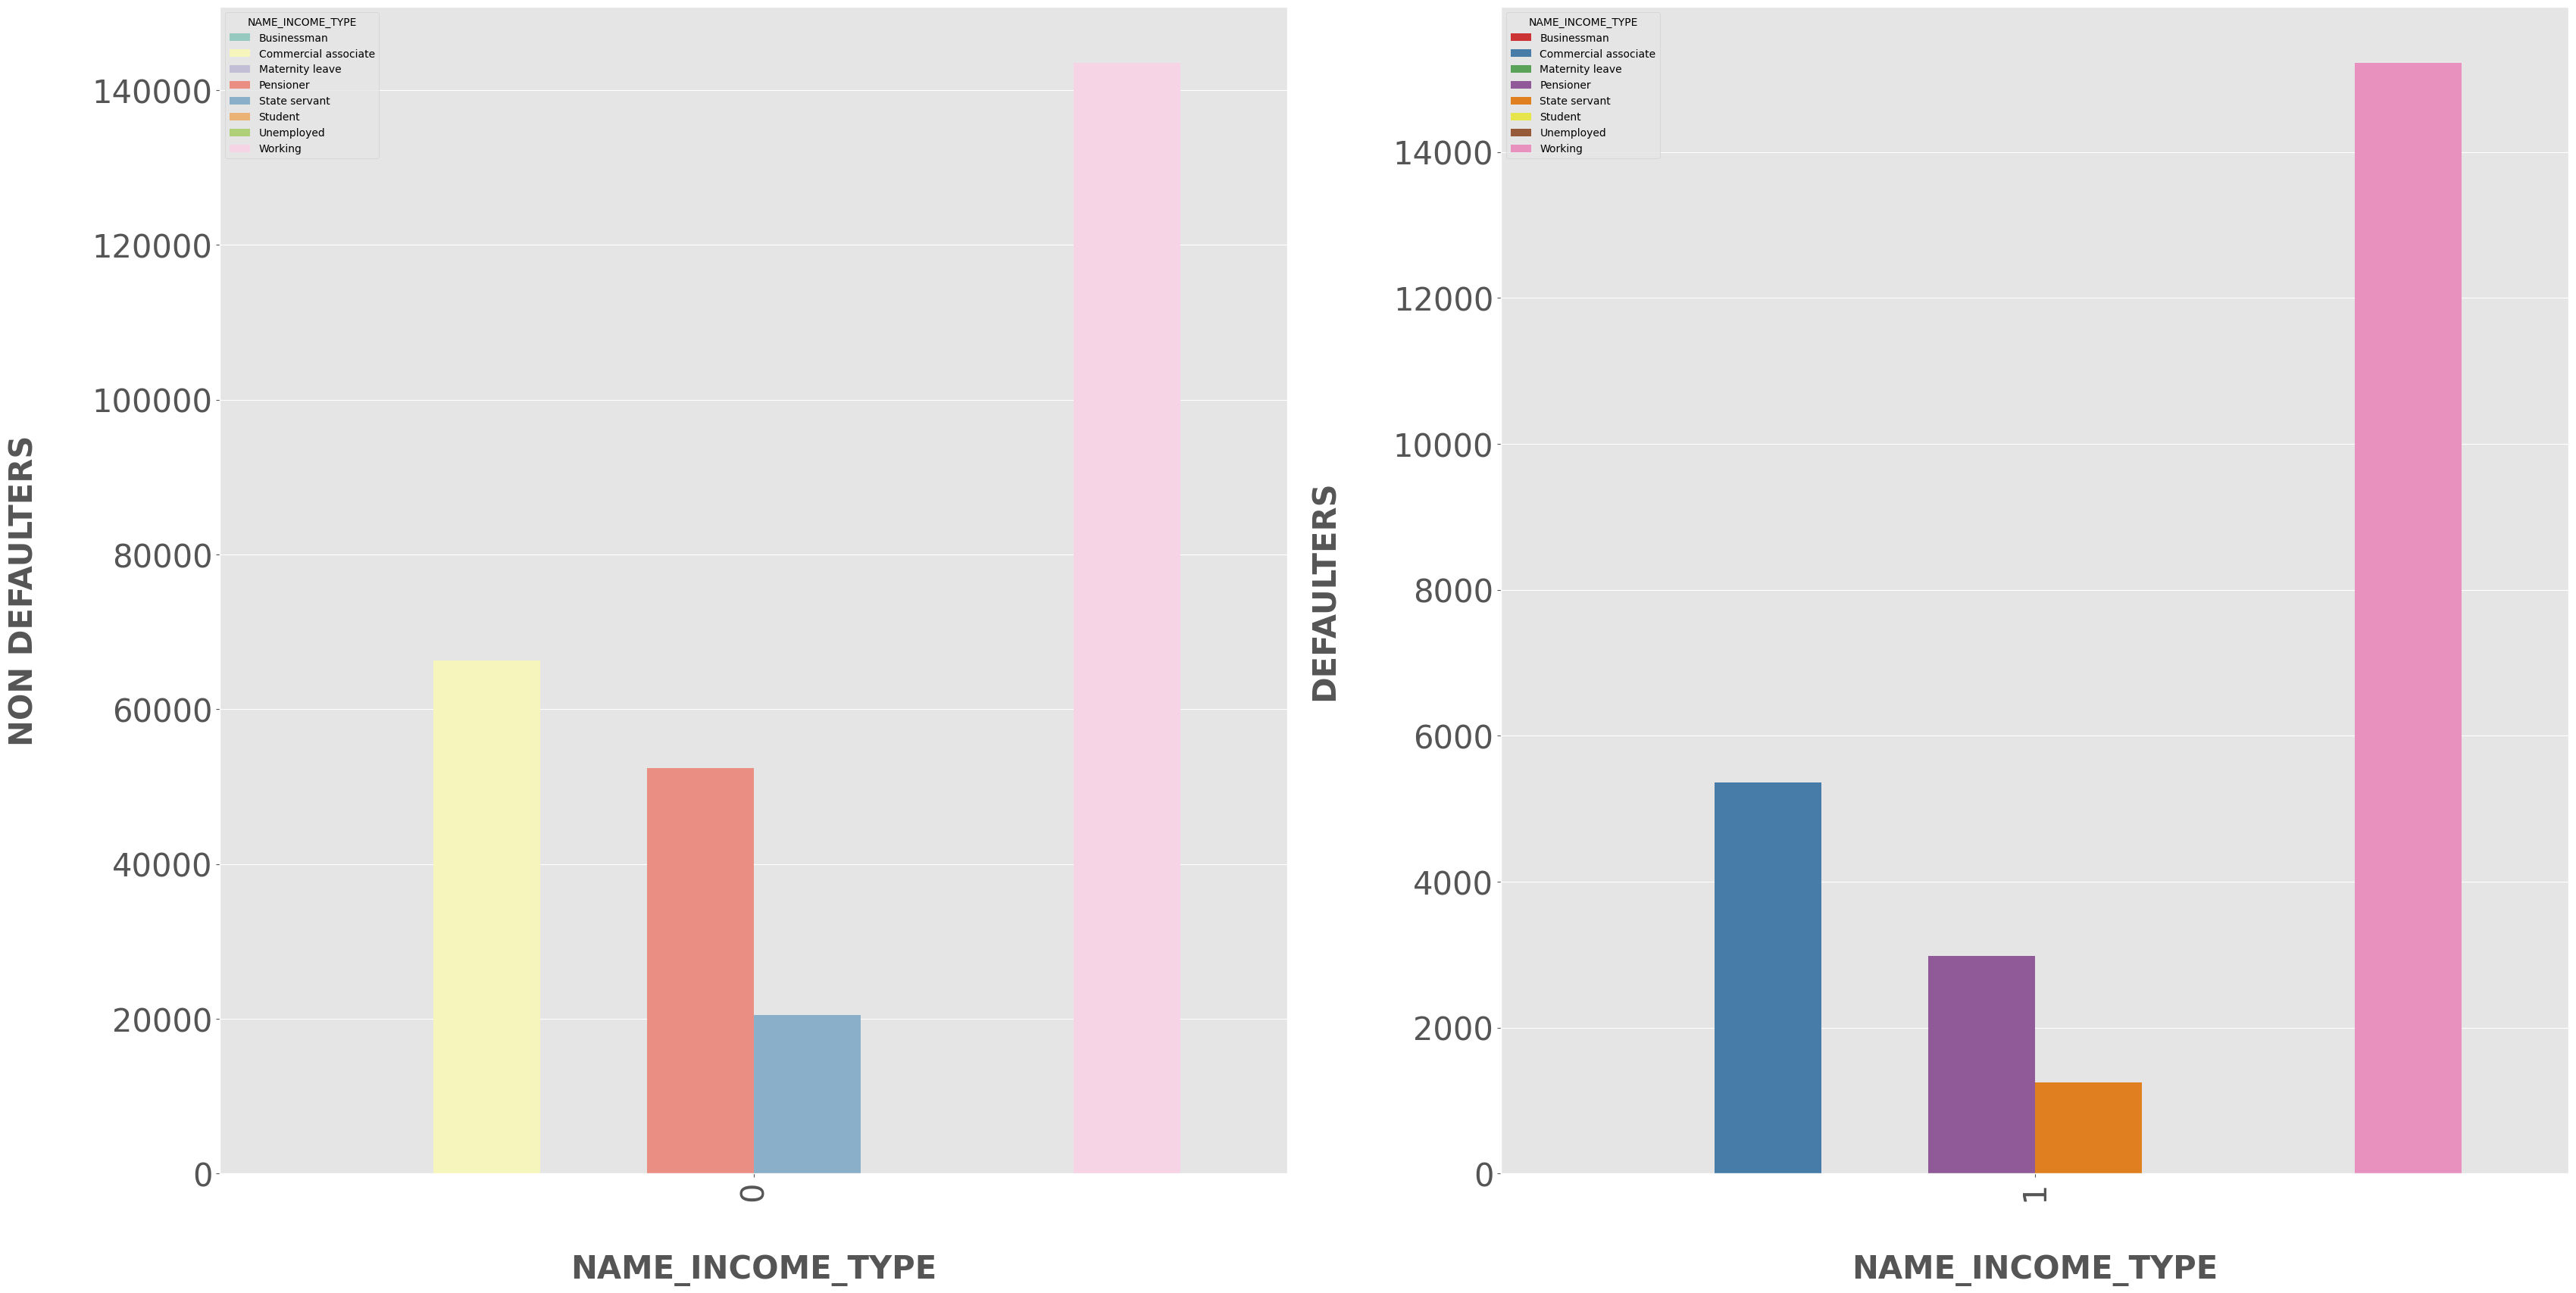

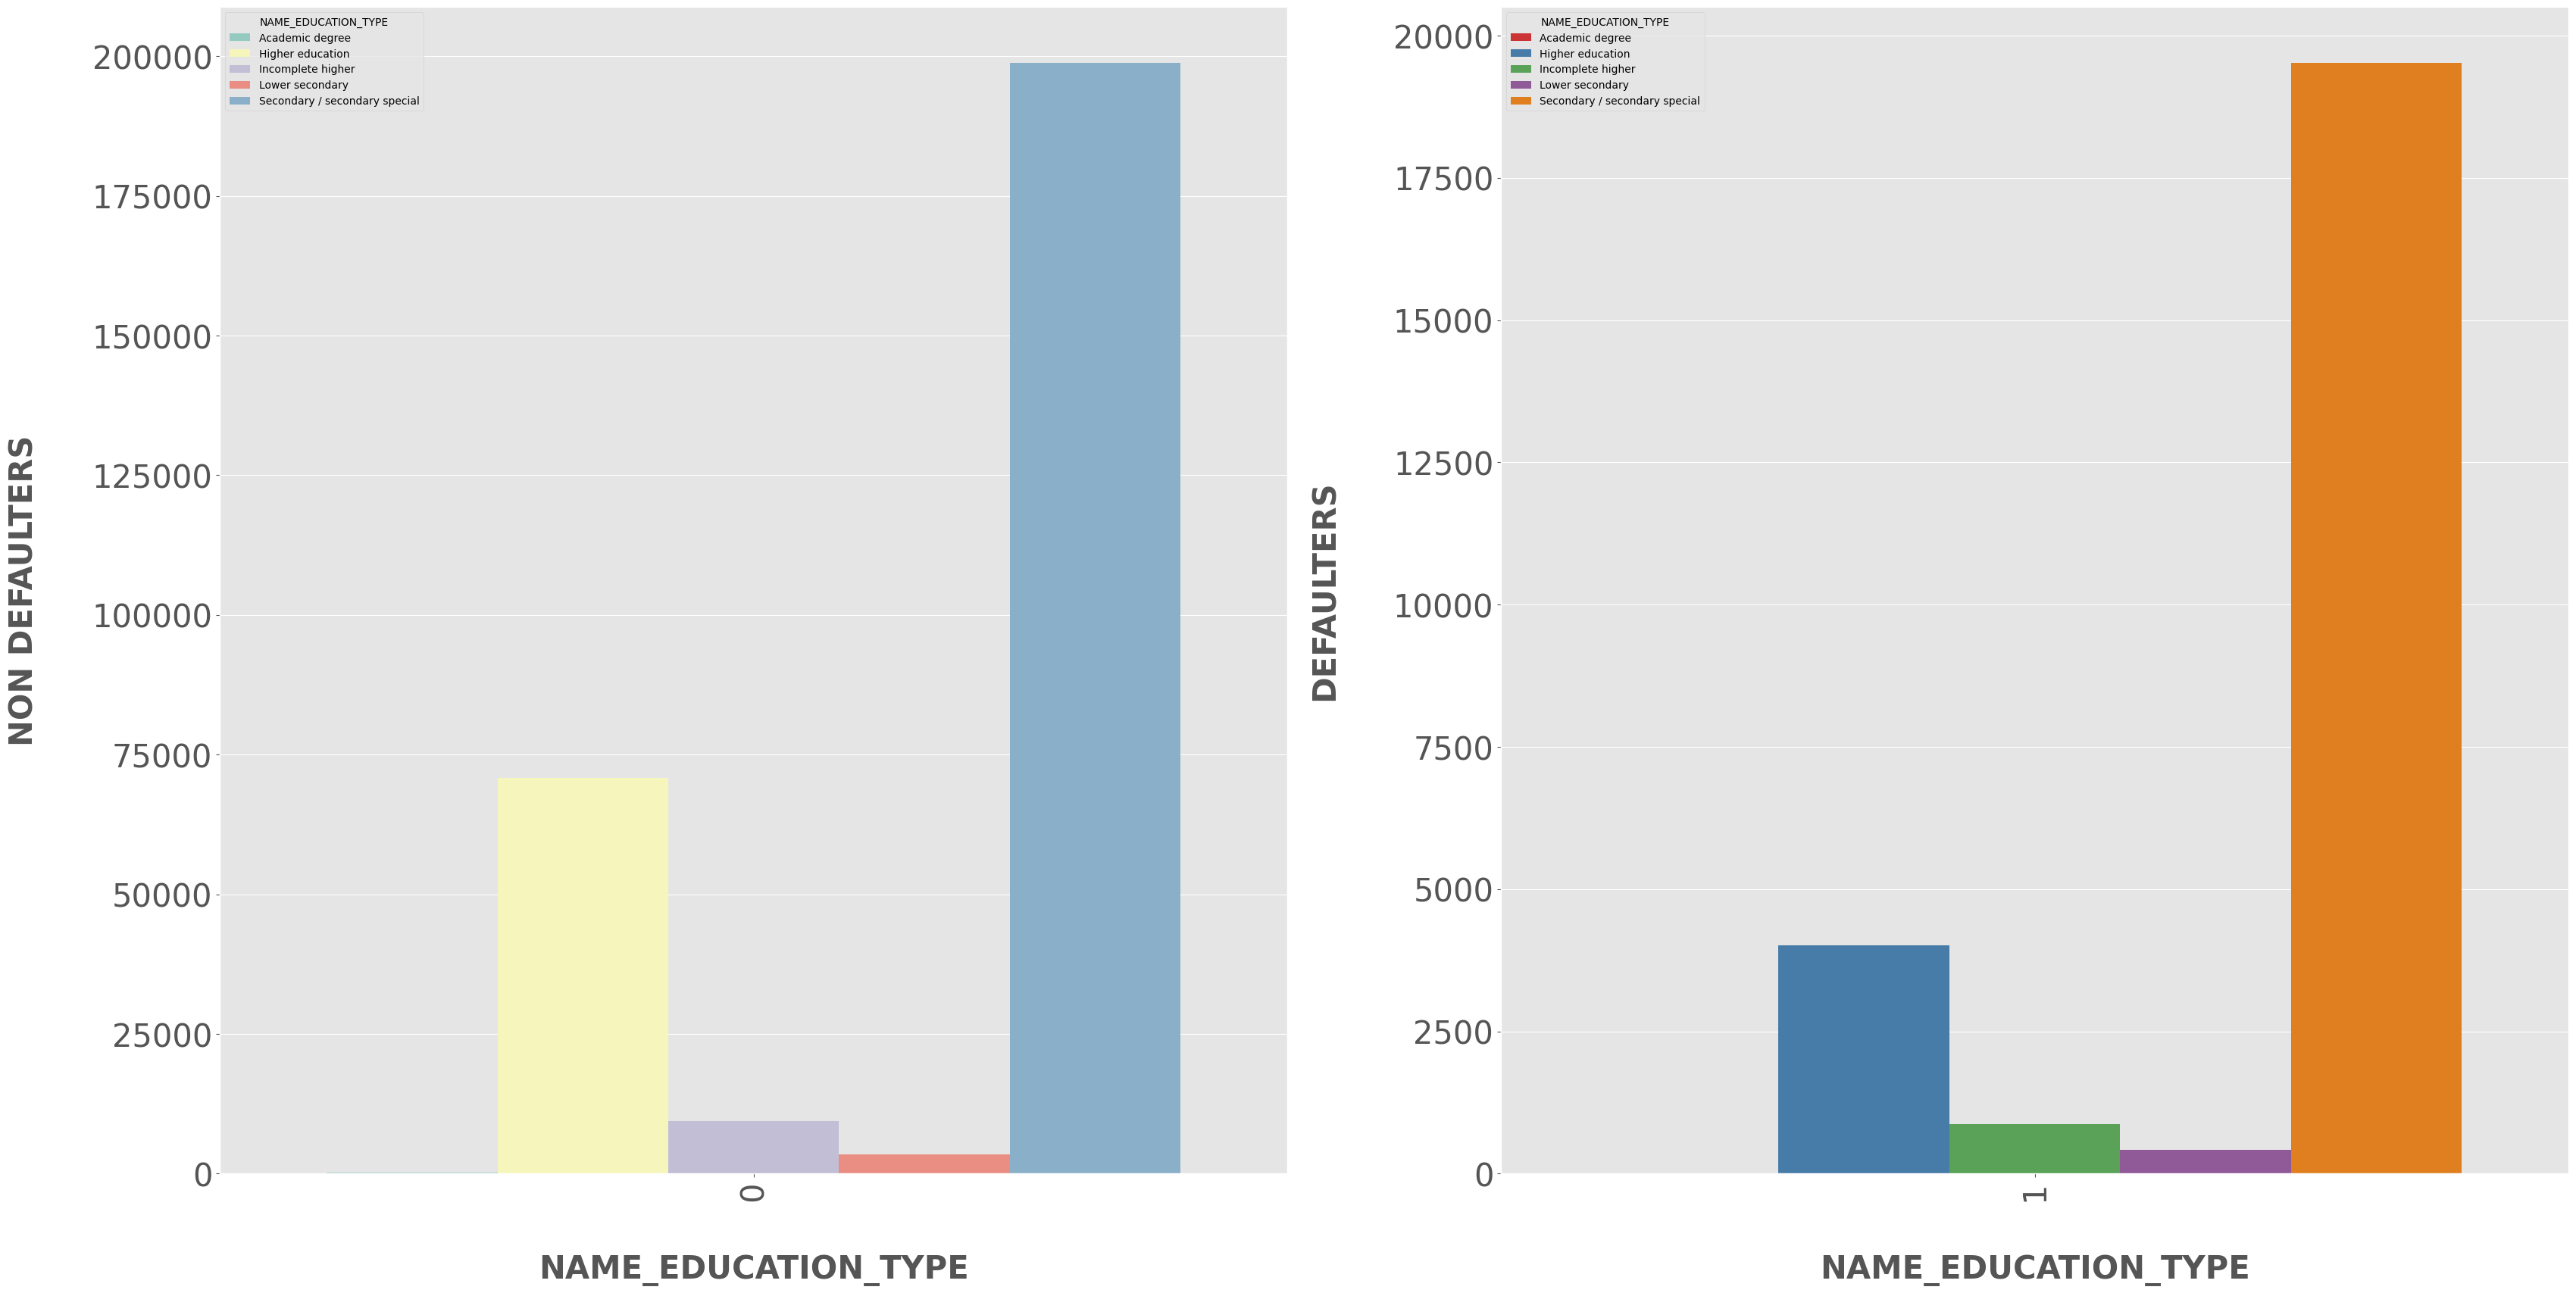

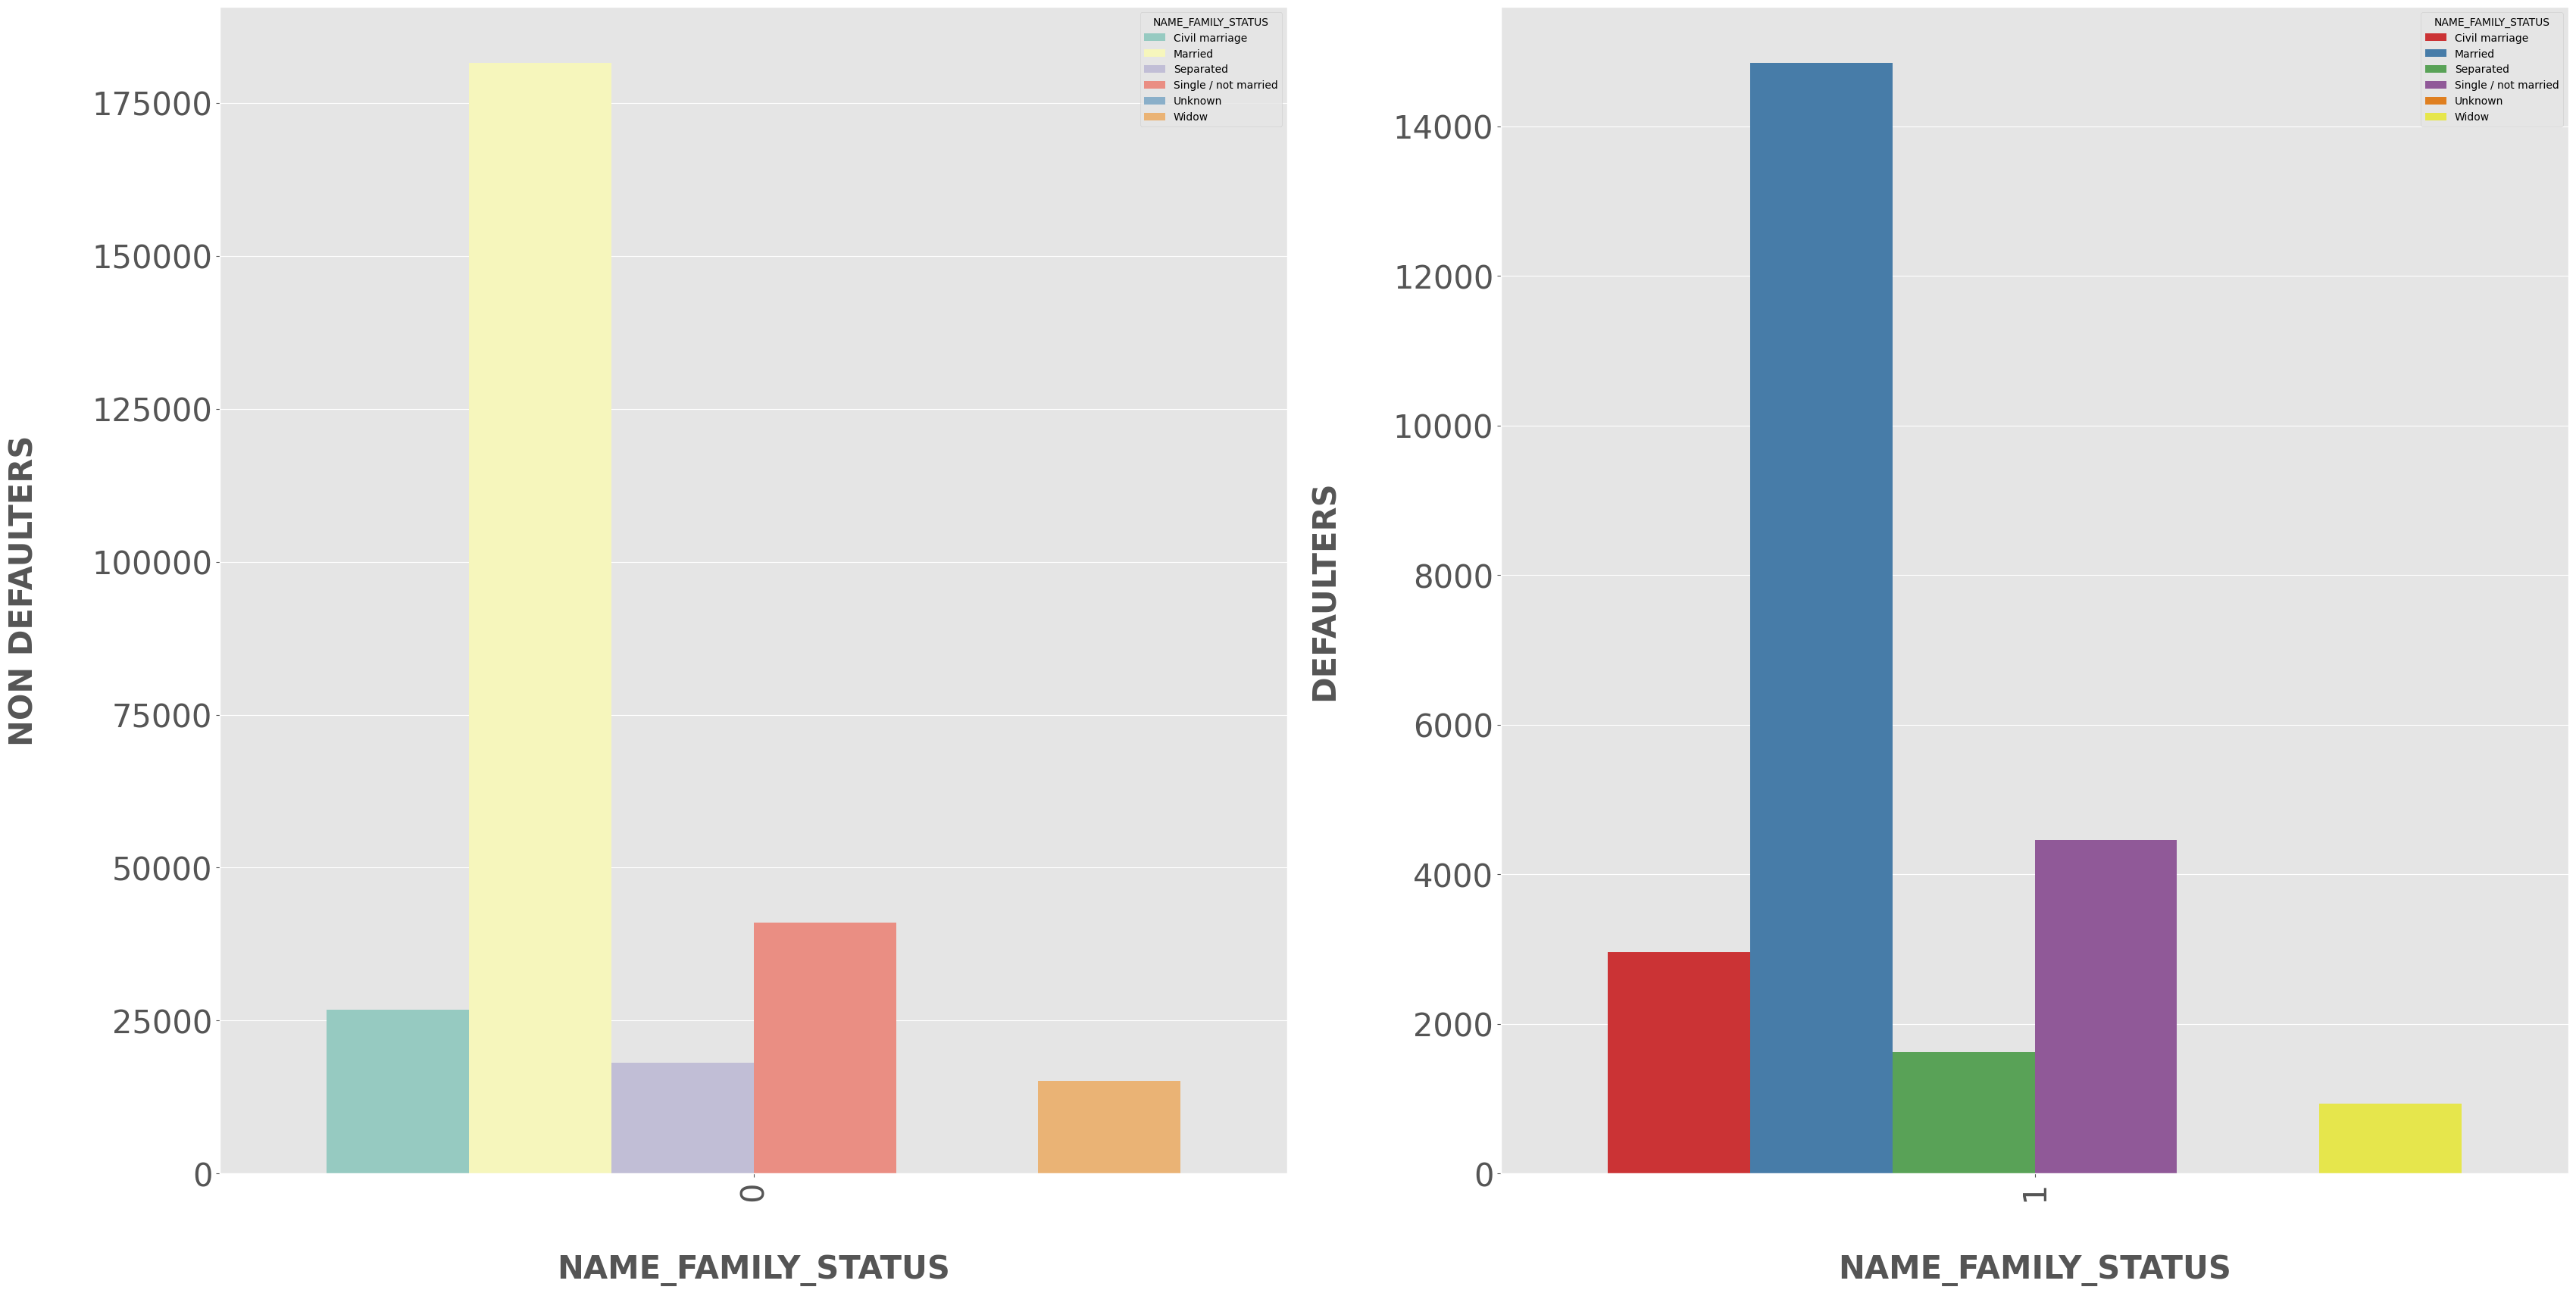

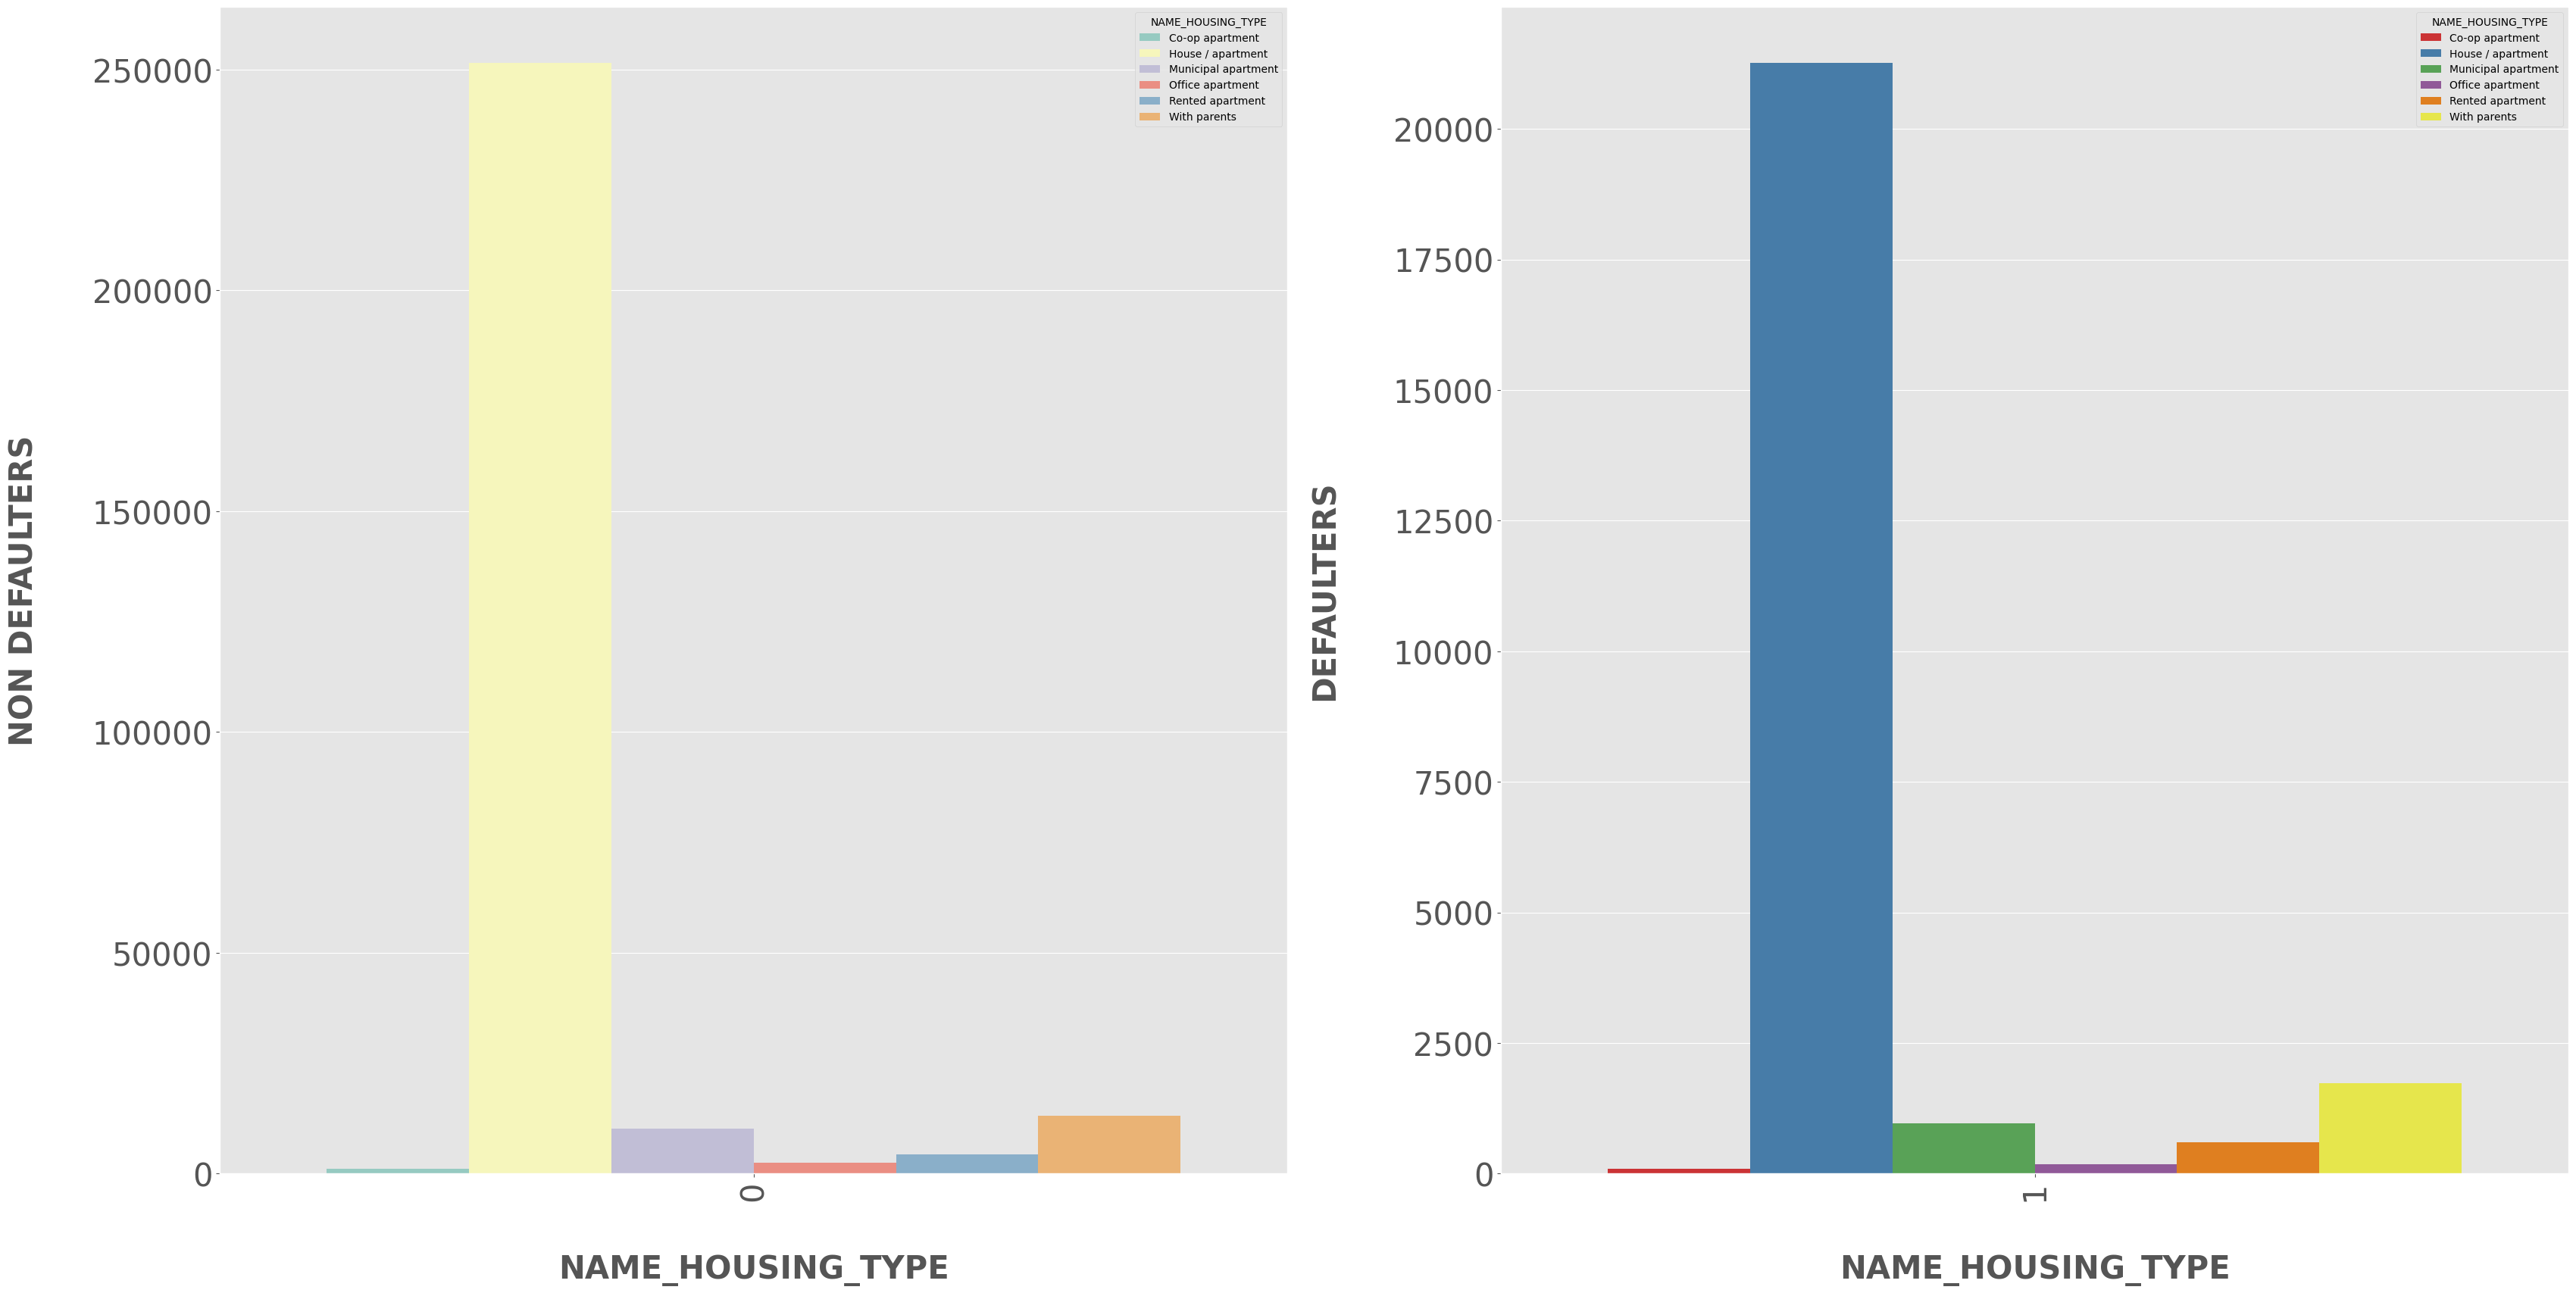

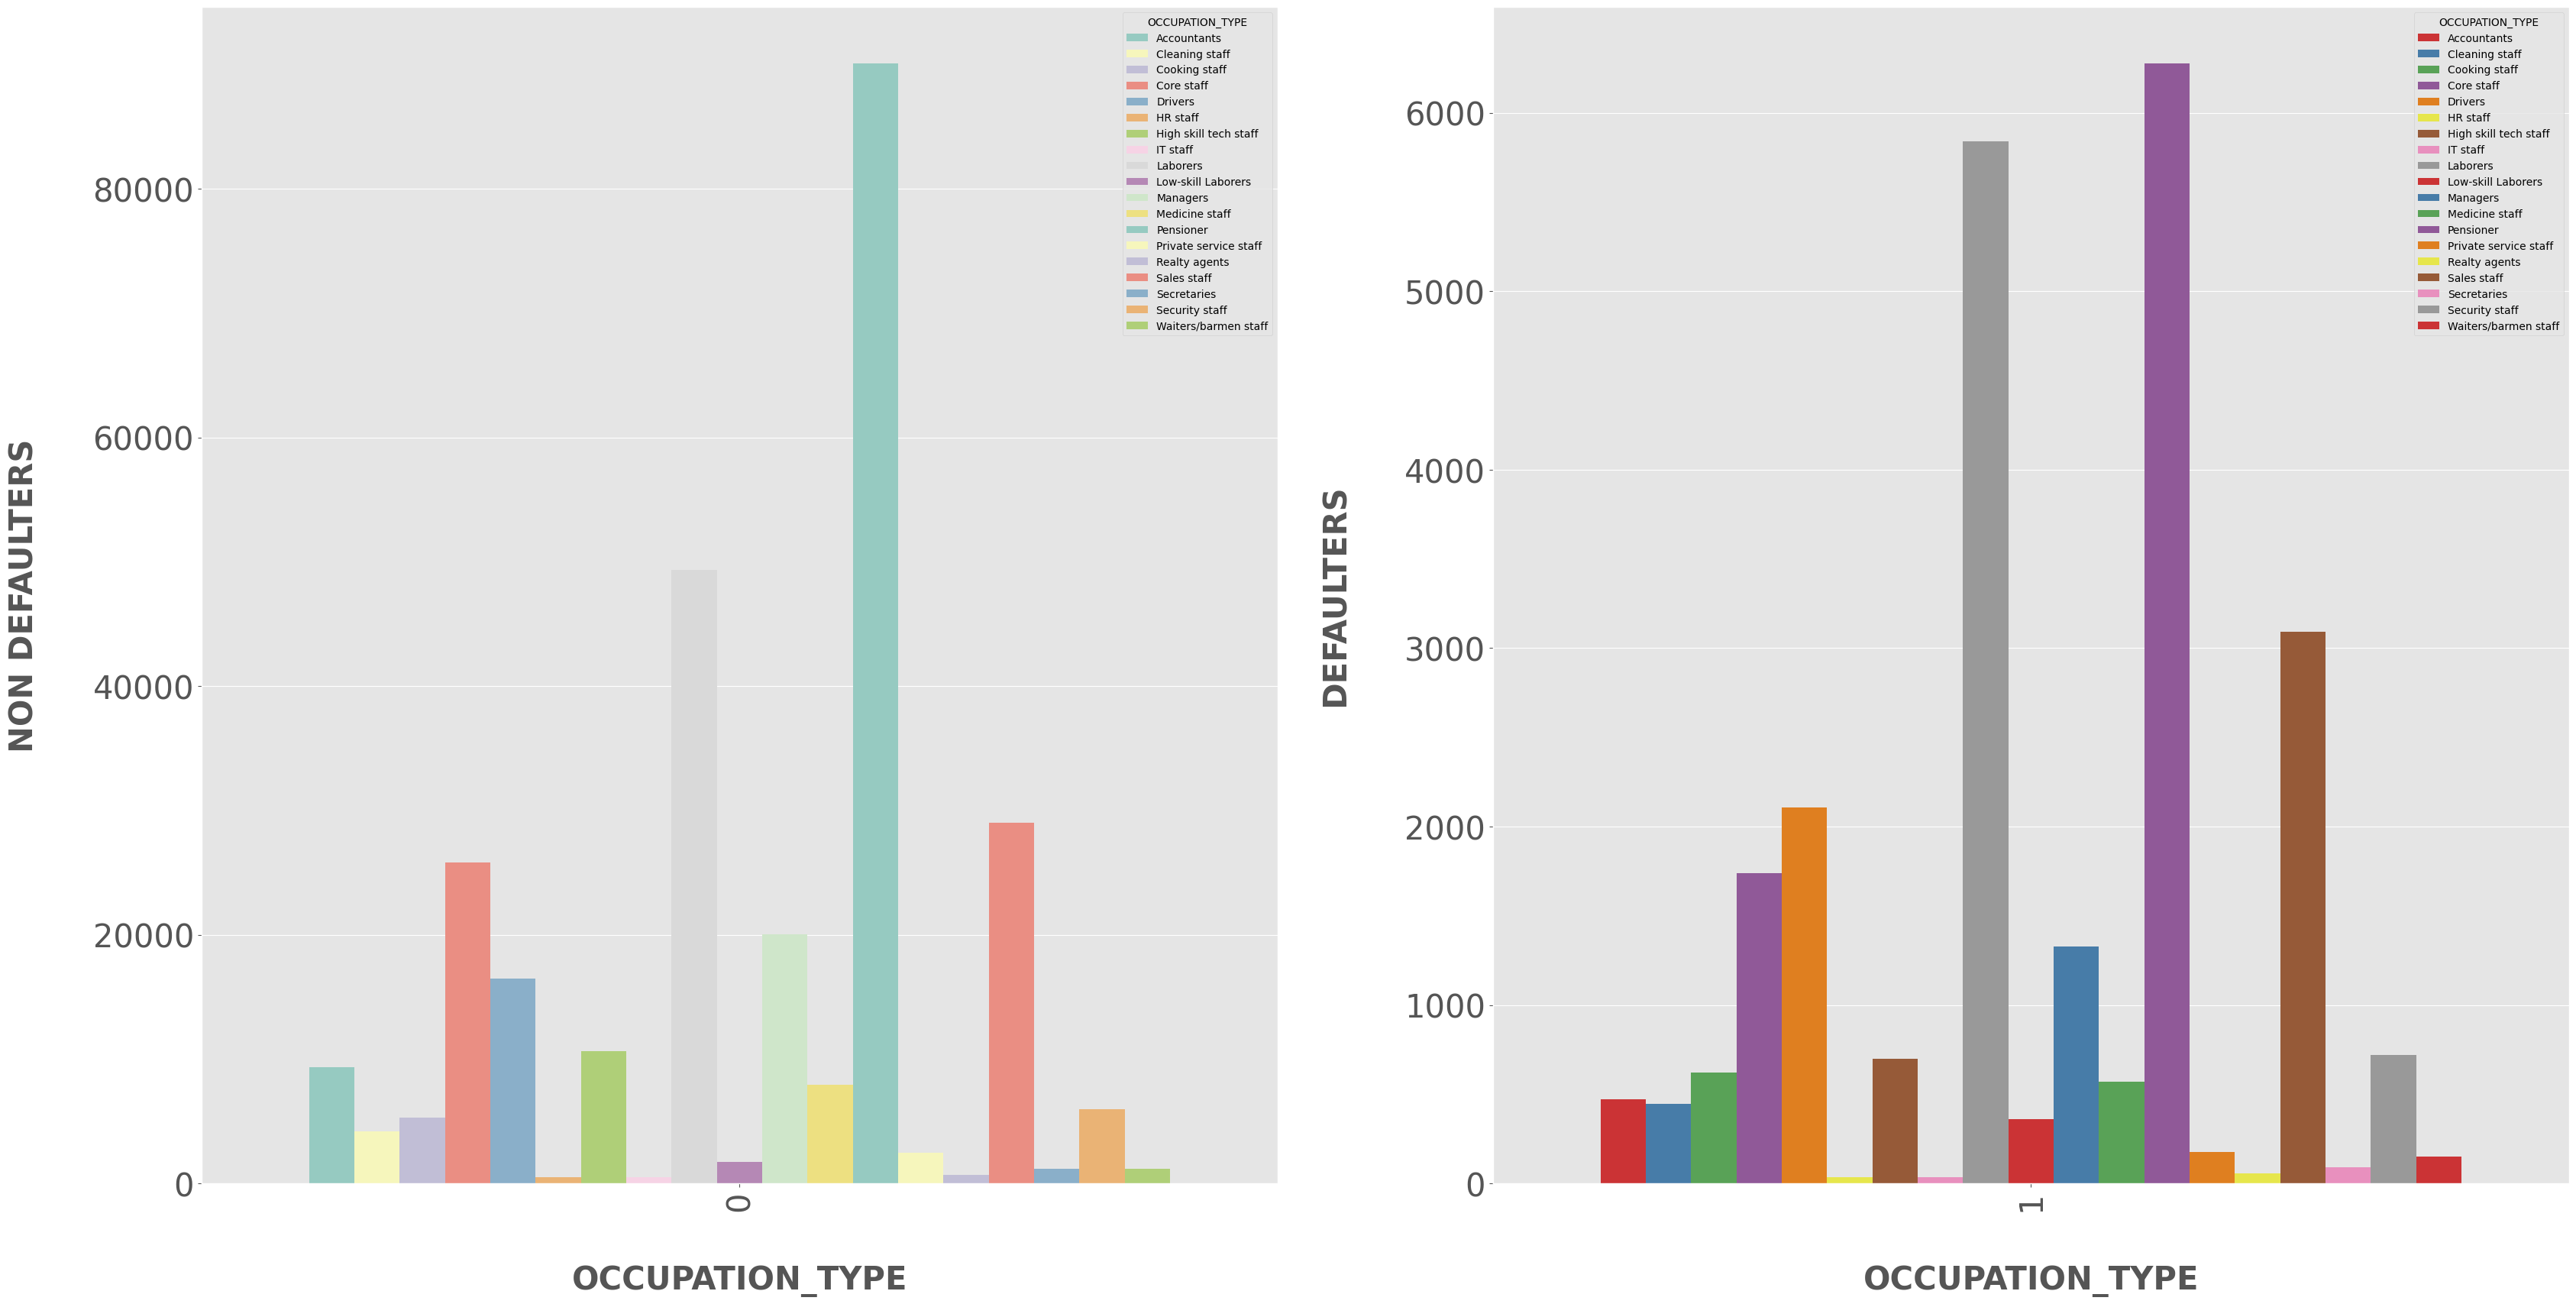

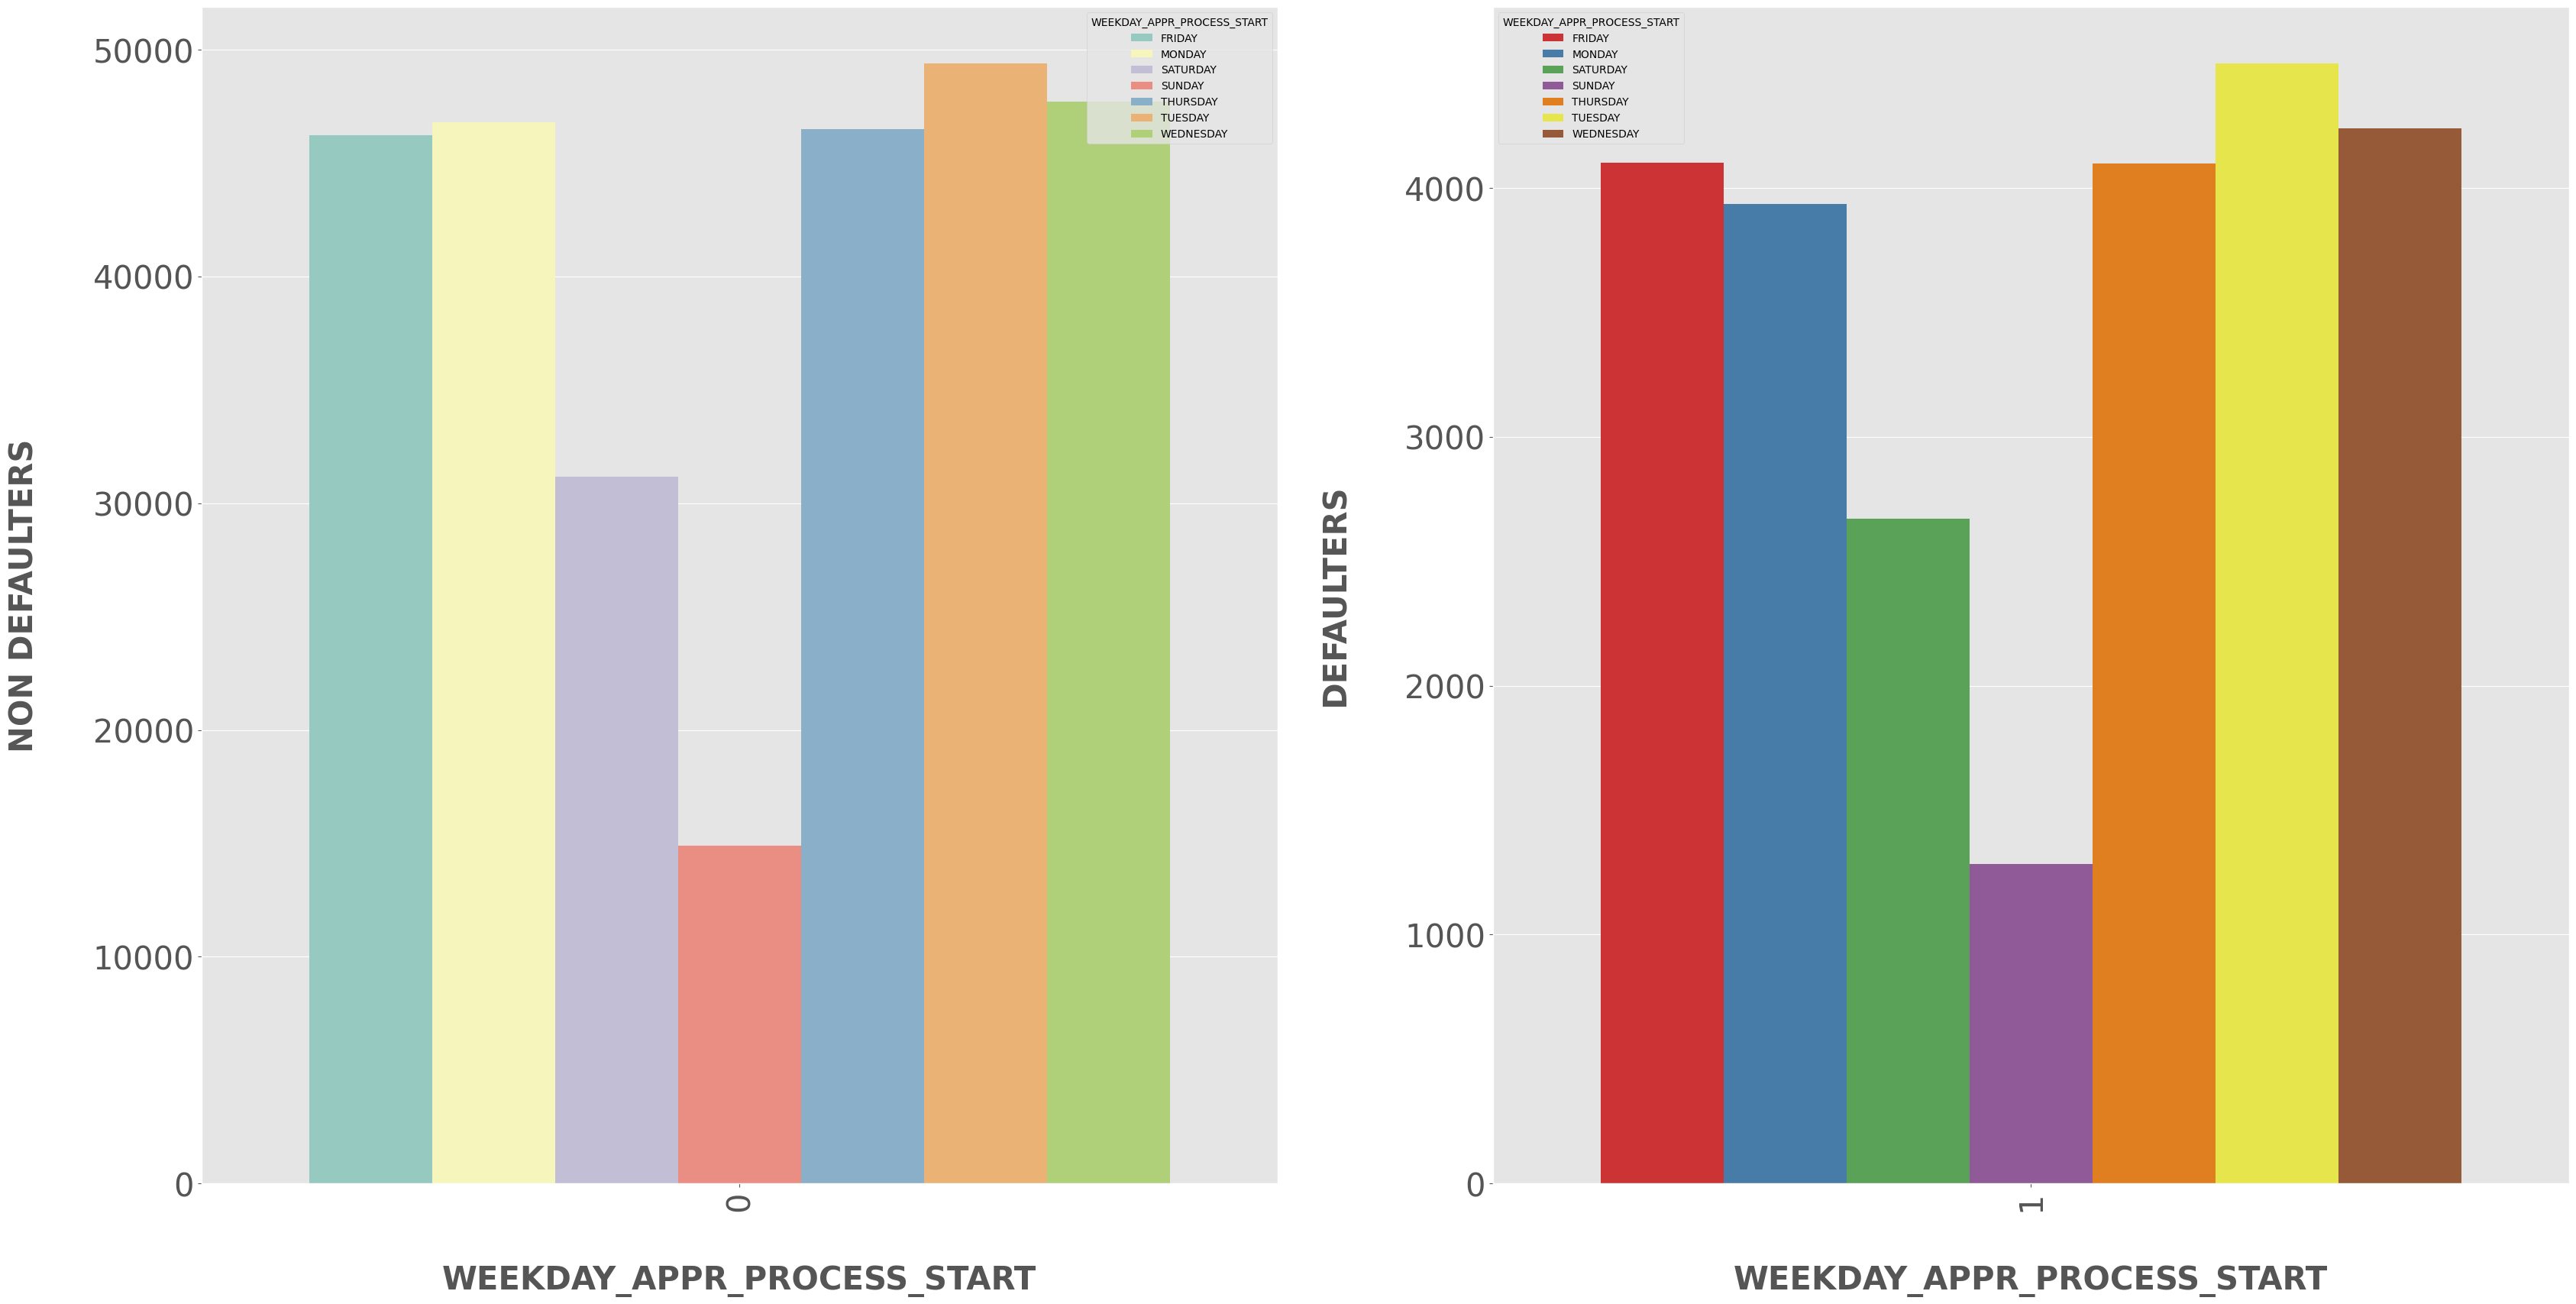

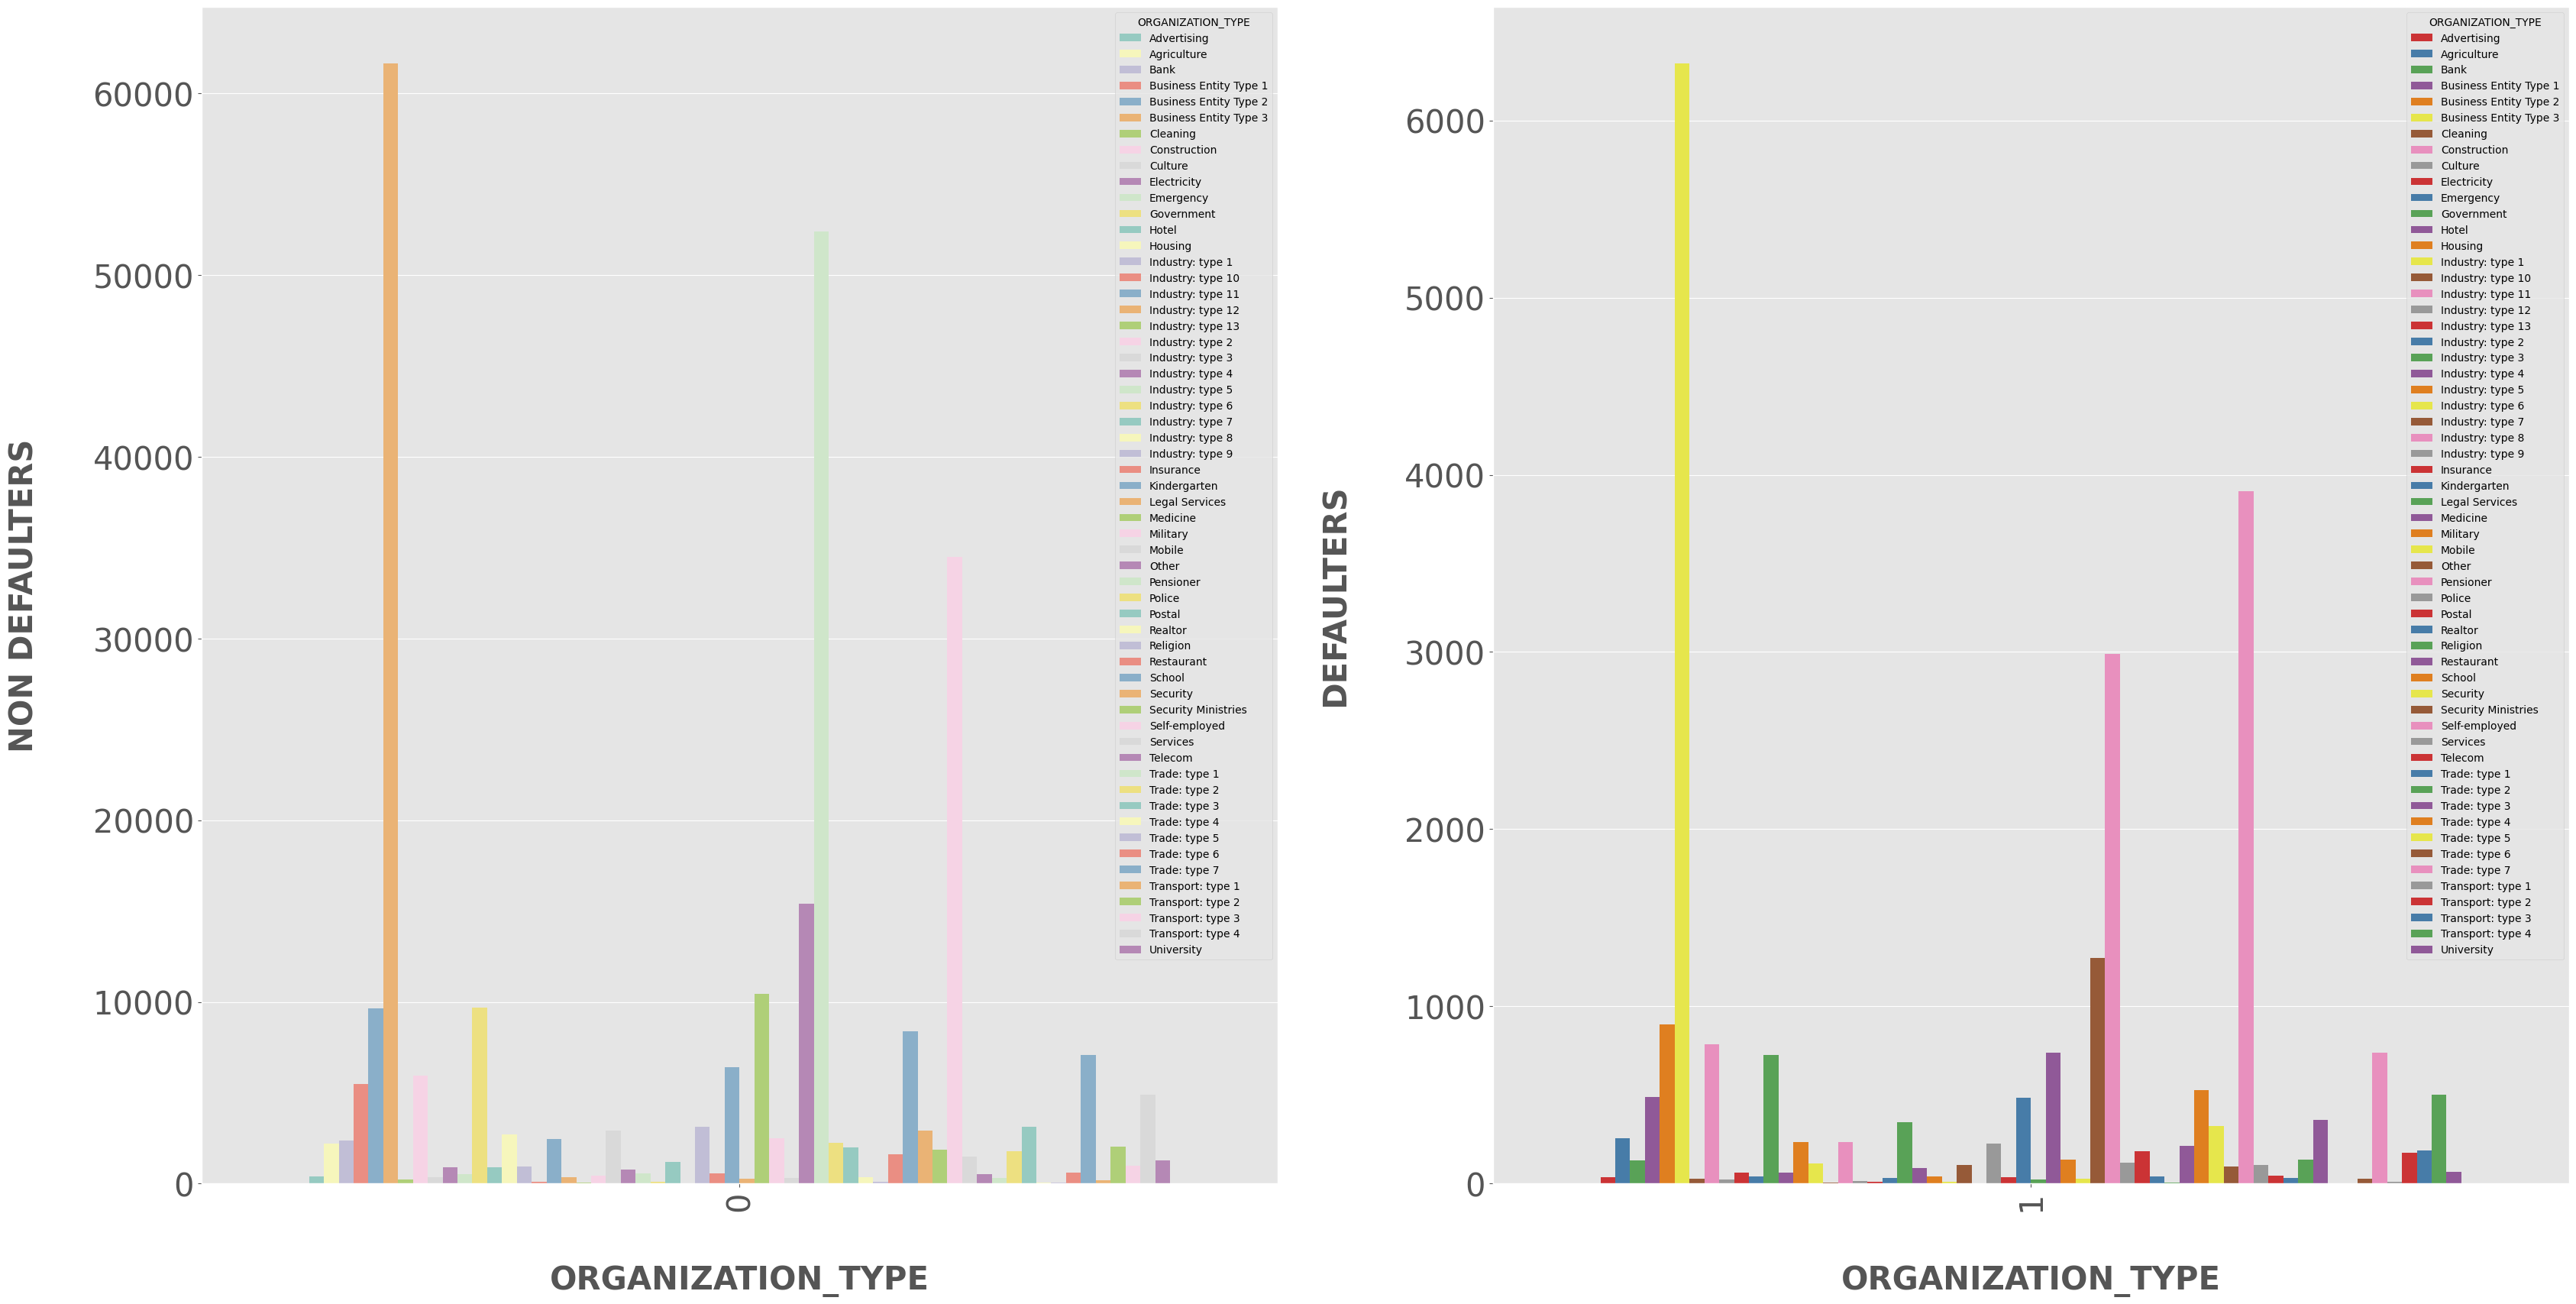

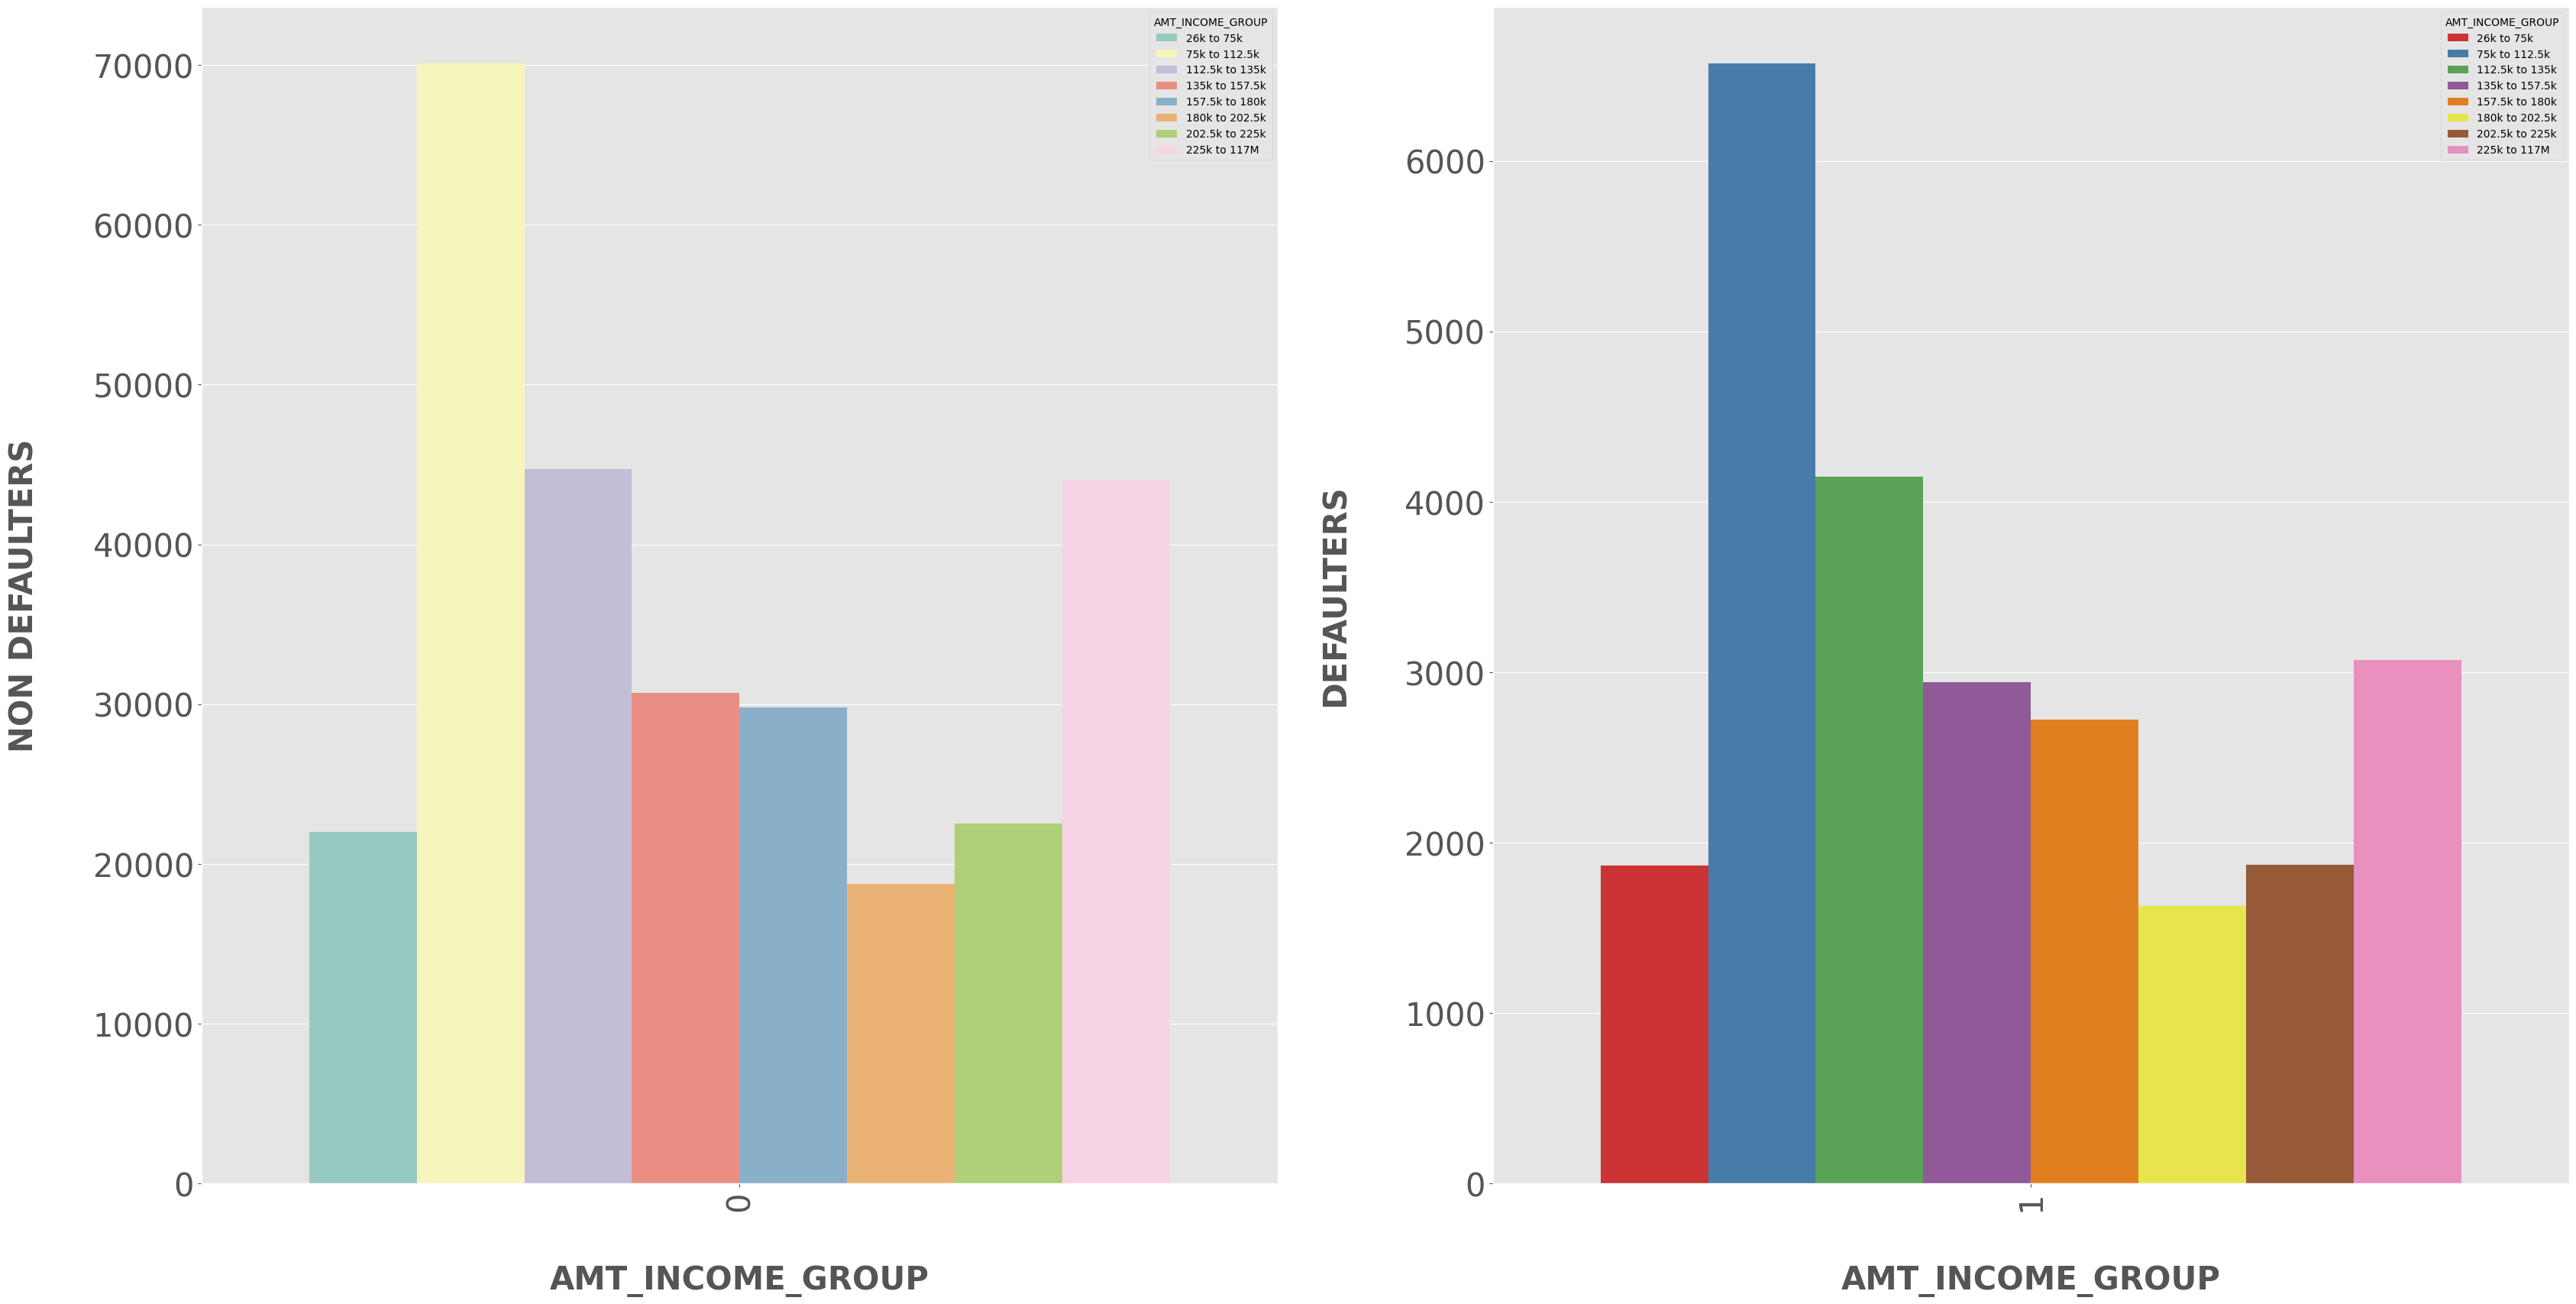

In [ ]:
for col in categorical_col:
    categorical_plot(col)

OBSERVATIONS

NAME_CONTRACT_TYPE - Most client applied for Cash Loan, but client that obtained revolving loan are less likely to default.
NAME_TYPE_SUITE - Unaccompanied client applied for most loan and are most likely to default.
NAME_INCOME_TYPE - Working class income earners are the most applying for loans and they are most likely to default.
NAME_EDUCATION_TYPE - Those that have secondary/secondary special education applied for most loans followed by higher education clients. secondary/secondary special client are also most likely to default.
NAME_FAMILY_STATUS - Married people applied for most loan with highest likelihood of default.
NAME_HOUSING_TYPE - Comfortable clients with housing apartment applied for more loans than others and they also have the highest chance of default.
OCCUPATION_TYPE - Pensioners applied most for loans and are most likely to default.
WEEKDAY_APPR_PROCESS_START - The day of the week a loan process start is not conclusive to label a day as most defaulting day.
ORGANIZATION_TYPE - Clients working within Business Entity Type 3 applied for most loan and has the highest number of default.
AMT_INCOME_GROUP - Income earners between 75k to 112.5k applied for most loan and are most likely to default.





UNIVARIATE ANALYSIS - SELECTED NUMERICAL COLUMNS

In [ ]:
def numerical_plot(col):
    sns.set(style="darkgrid")
    plt.figure(figsize=(40,20))


    plt.subplot(1,2,1)
    sns.distplot(Target0[col], color="g" )
    plt.yscale('linear')
    plt.xlabel(col, fontsize= 30, fontweight="bold")
    plt.ylabel('NON DEFAULTERS', fontsize= 30, fontweight="bold")
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)




    plt.subplot(1,2,2)
    sns.distplot(Target1[col], color="r")
    plt.yscale('linear')
    plt.xlabel(col, fontsize= 30, fontweight="bold")
    plt.ylabel('DEFAULTERS', fontsize= 30, fontweight="bold")
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)

    plt.show();

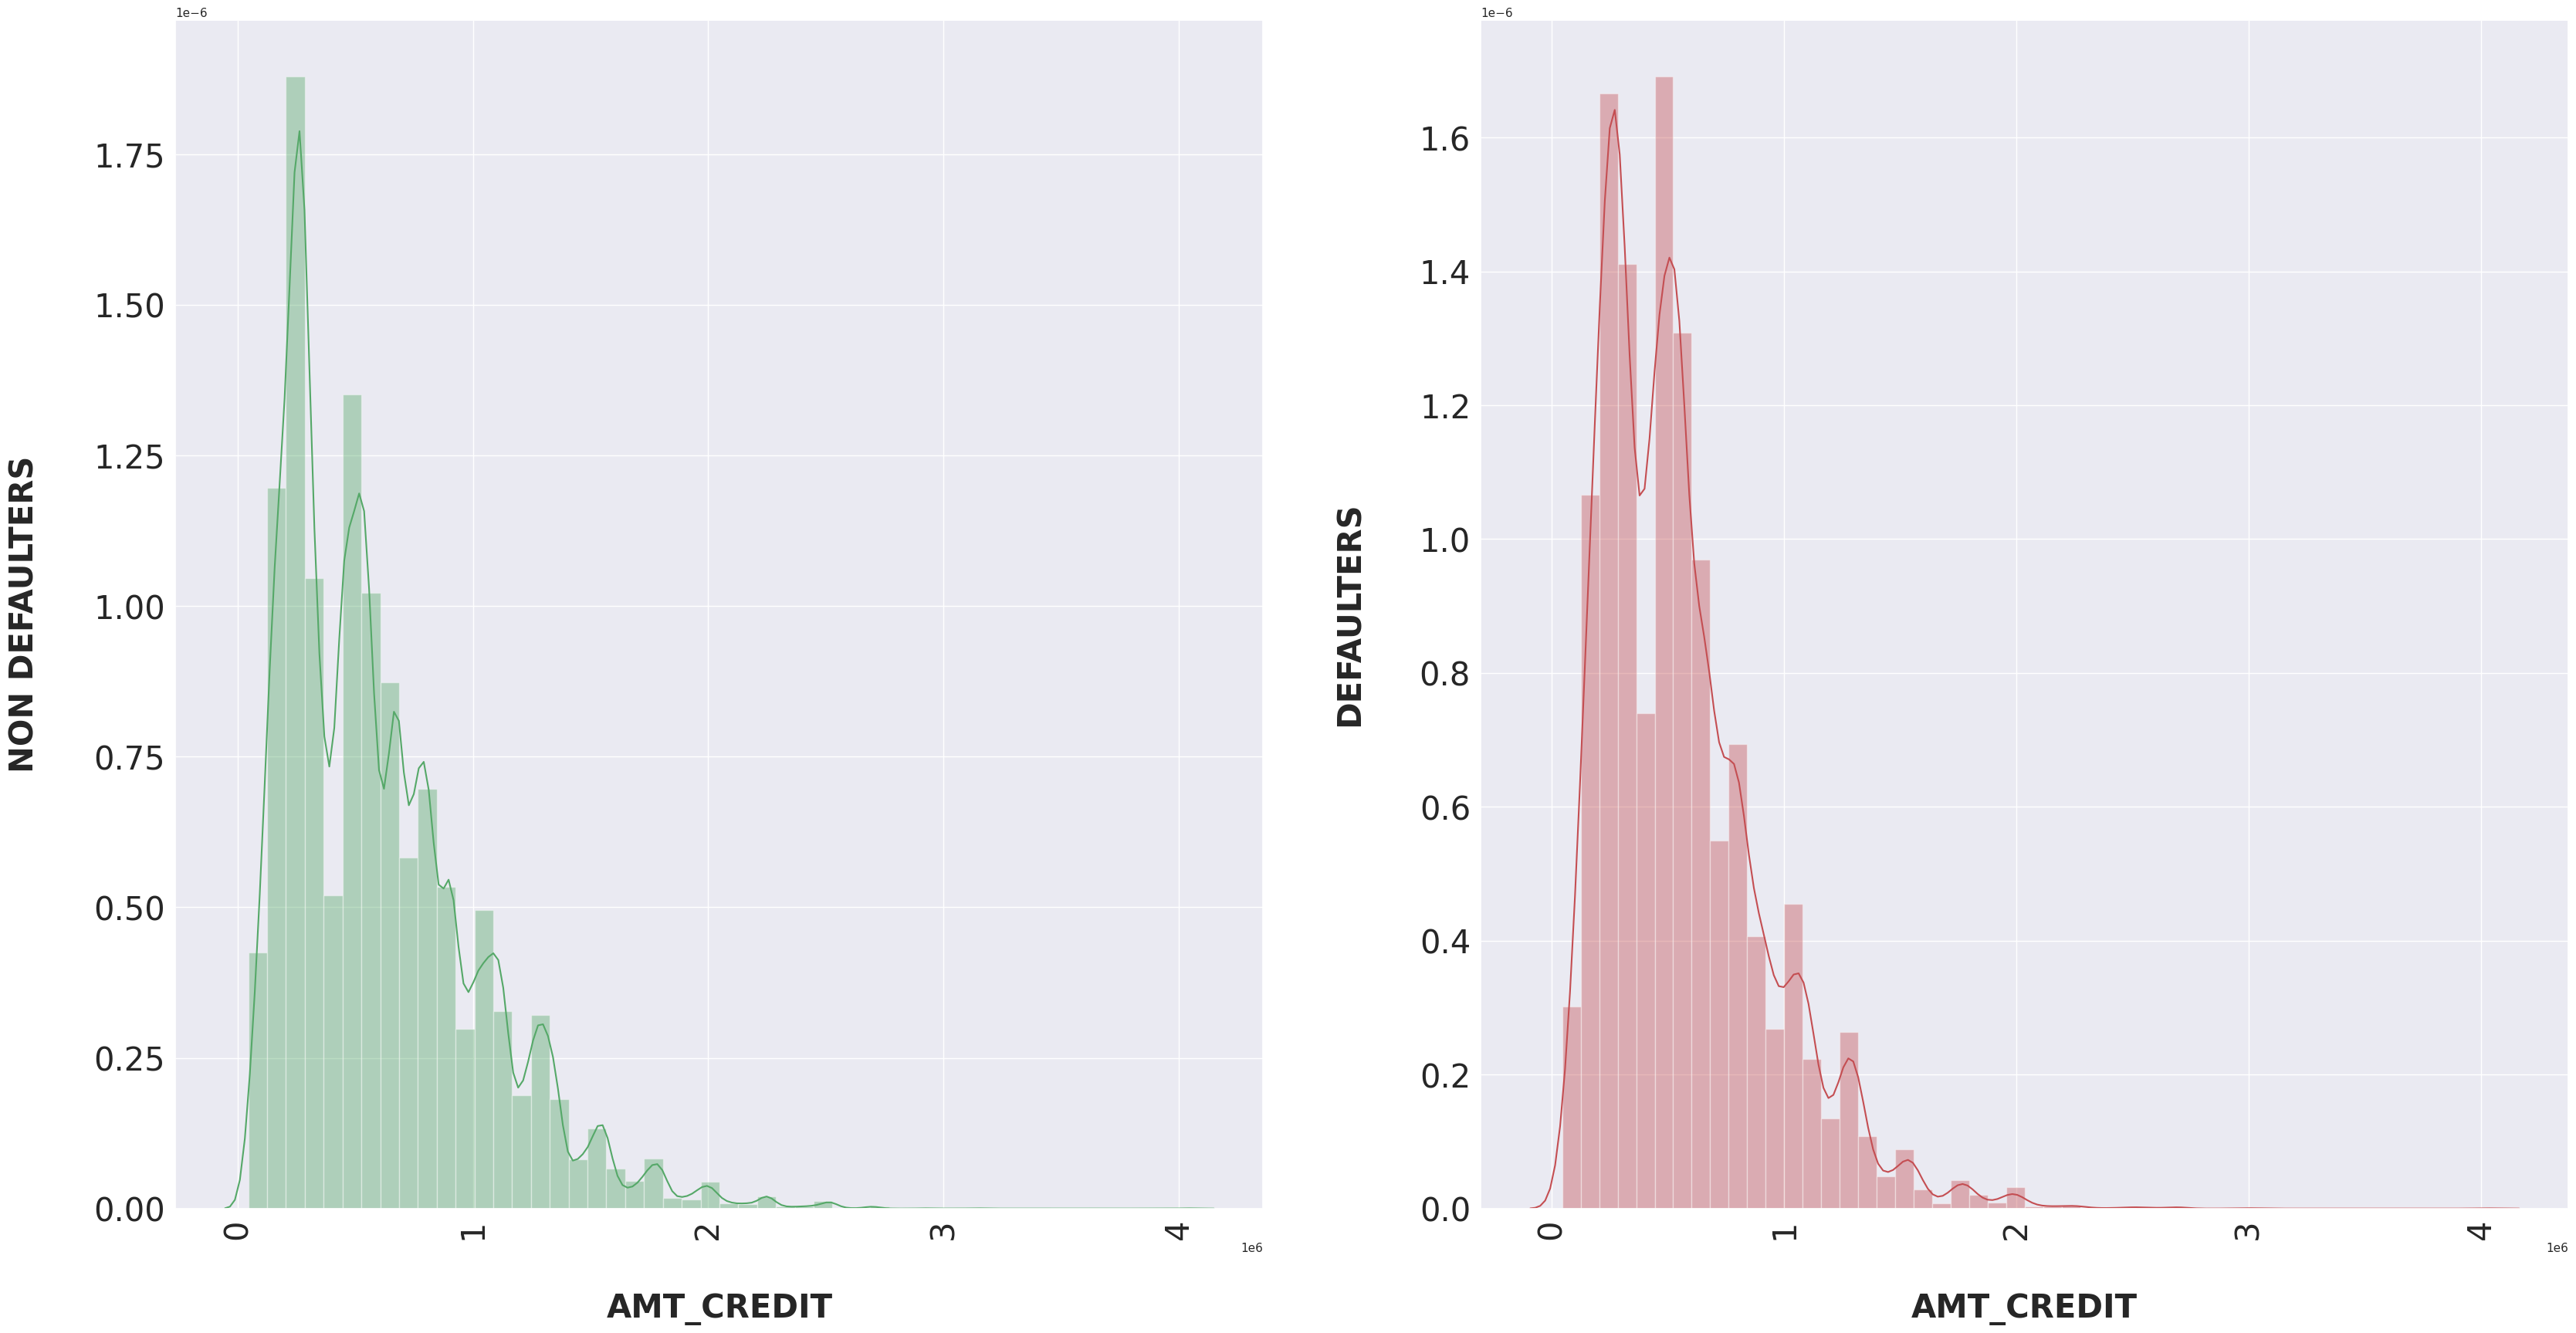

In [ ]:
numerical_plot(col='AMT_CREDIT')

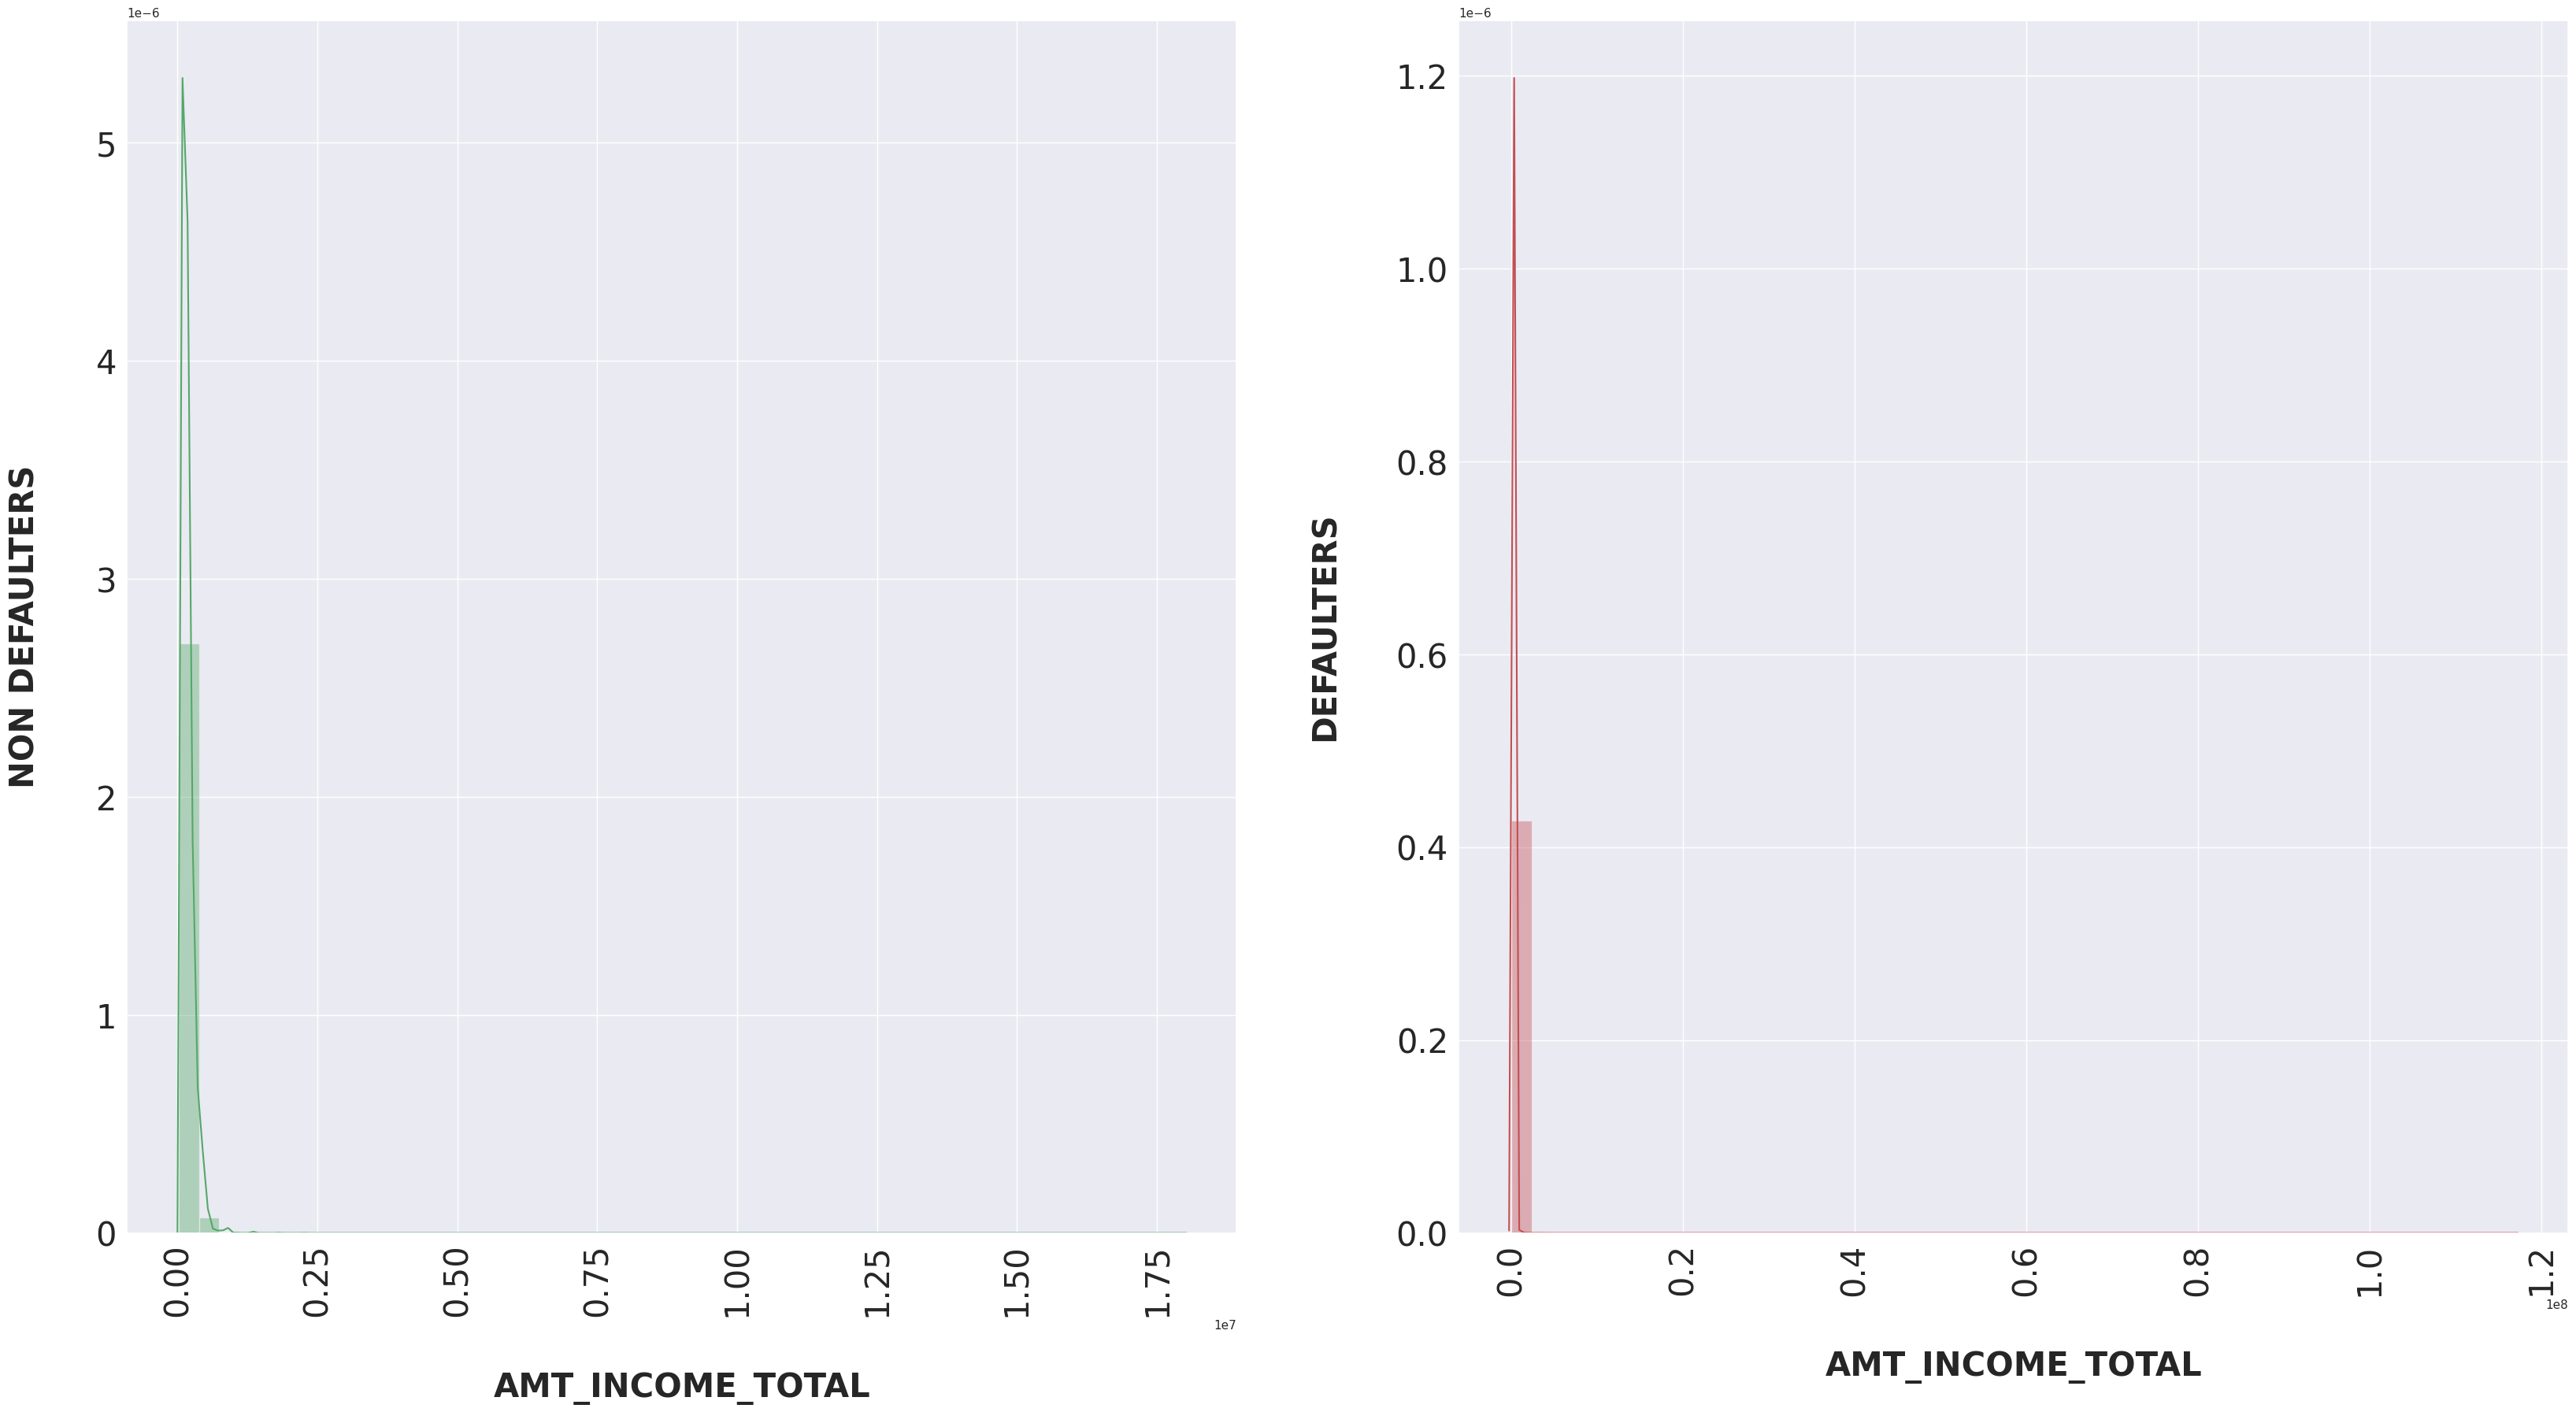

In [ ]:
numerical_plot('AMT_INCOME_TOTAL')

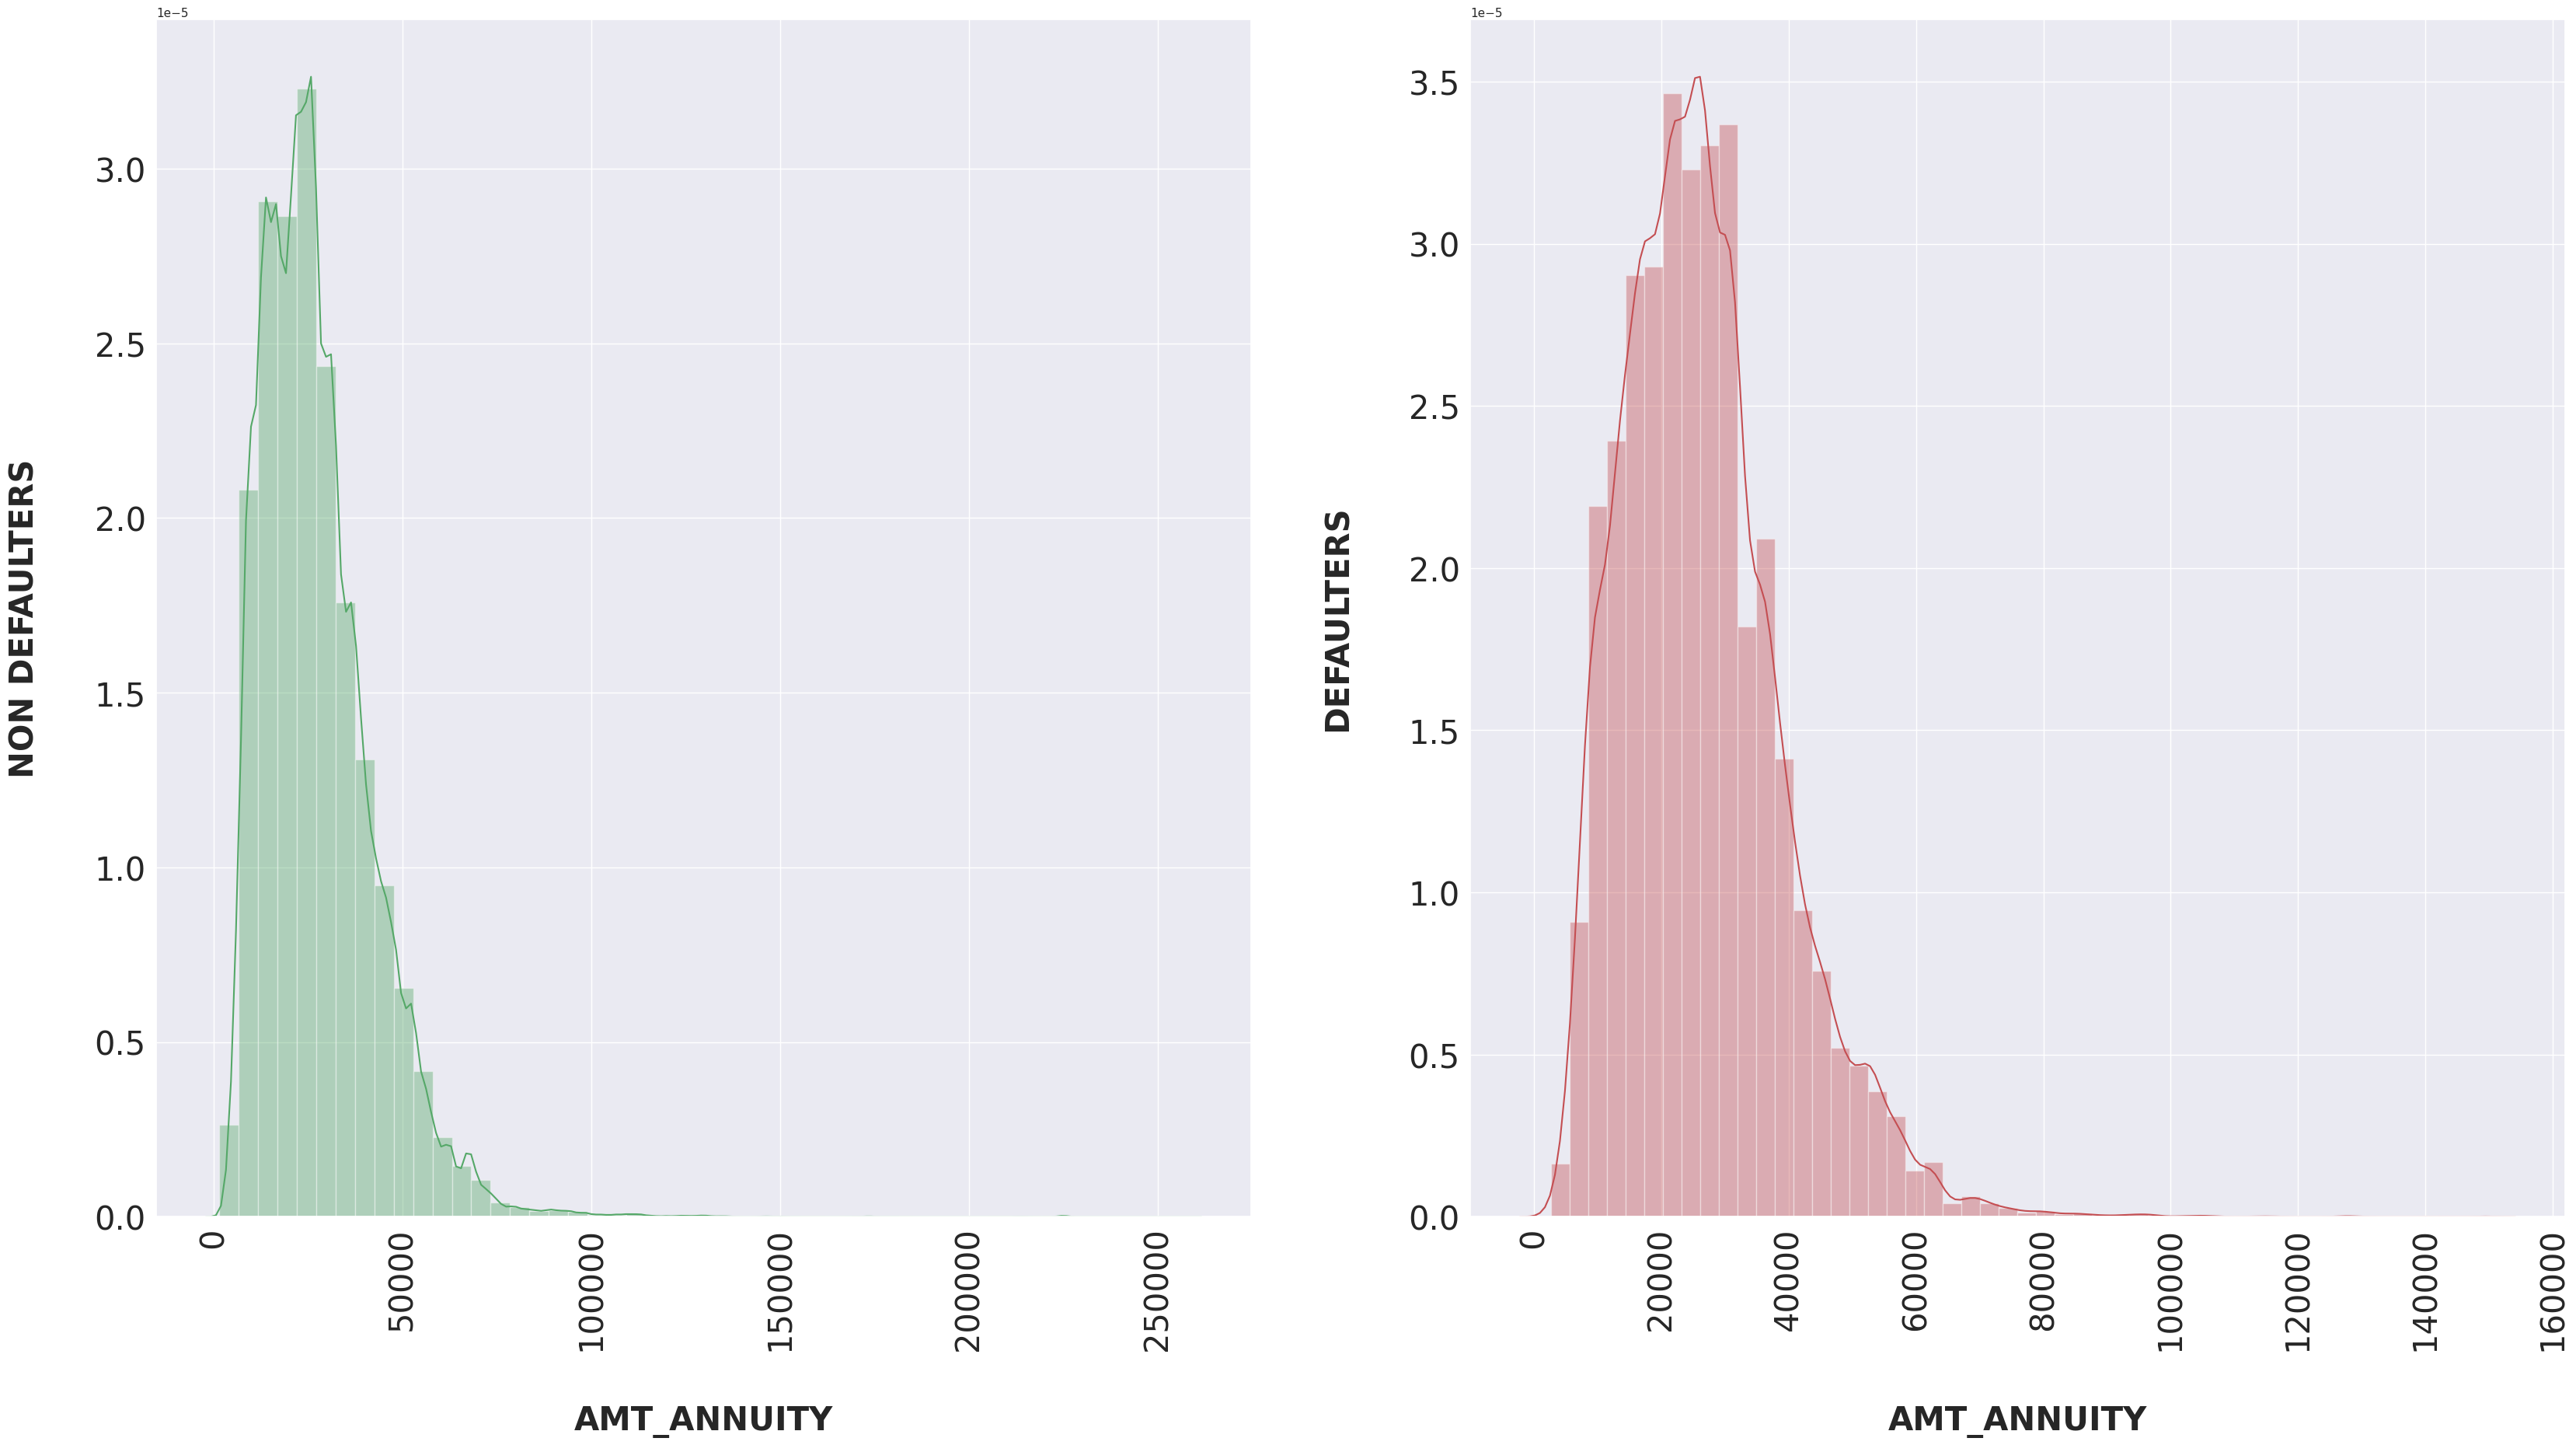

In [ ]:
numerical_plot('AMT_ANNUITY')

OBSERVATIONS

Dist Plot shows that Annuity is the closest feature to been normally distributed. Hence, the data will require more standardization to further reveal insights.

Client with target one has largely staggered income as compared to target zero. Dist. plot clearly shows that the shape in Income total, Annuity and Credit is similar for Target 0 and similar for Target 1.

The plots are also highlighting that people who have difficulty in paying back loans with respect to their income, loan amount, price of goods against which loan is procured and Annuity.

BIVARIATE ANALYSIS

In [ ]:
app_df[["TARGET","AMT_INCOME_TOTAL","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS"]]

TARGET  AMT_INCOME_TOTAL            NAME_EDUCATION_TYPE  \
0            1          202500.0  Secondary / secondary special   
1            0          270000.0               Higher education   
2            0           67500.0  Secondary / secondary special   
3            0          135000.0  Secondary / secondary special   
4            0          121500.0  Secondary / secondary special   
...        ...               ...                            ...   
307506       0          157500.0  Secondary / secondary special   
307507       0           72000.0  Secondary / secondary special   
307508       0          153000.0               Higher education   
307509       1          171000.0  Secondary / secondary special   
307510       0          157500.0               Higher education   

          NAME_FAMILY_STATUS  
0       Single / not married  
1                    Married  
2       Single / not married  
3             Civil marriage  
4       Single / not married  
...                      ...  
307506             Separated  
307507                 Widow  
307508             Separated  
307509               Married  
307510               Married  

[307511 rows x 4 columns]

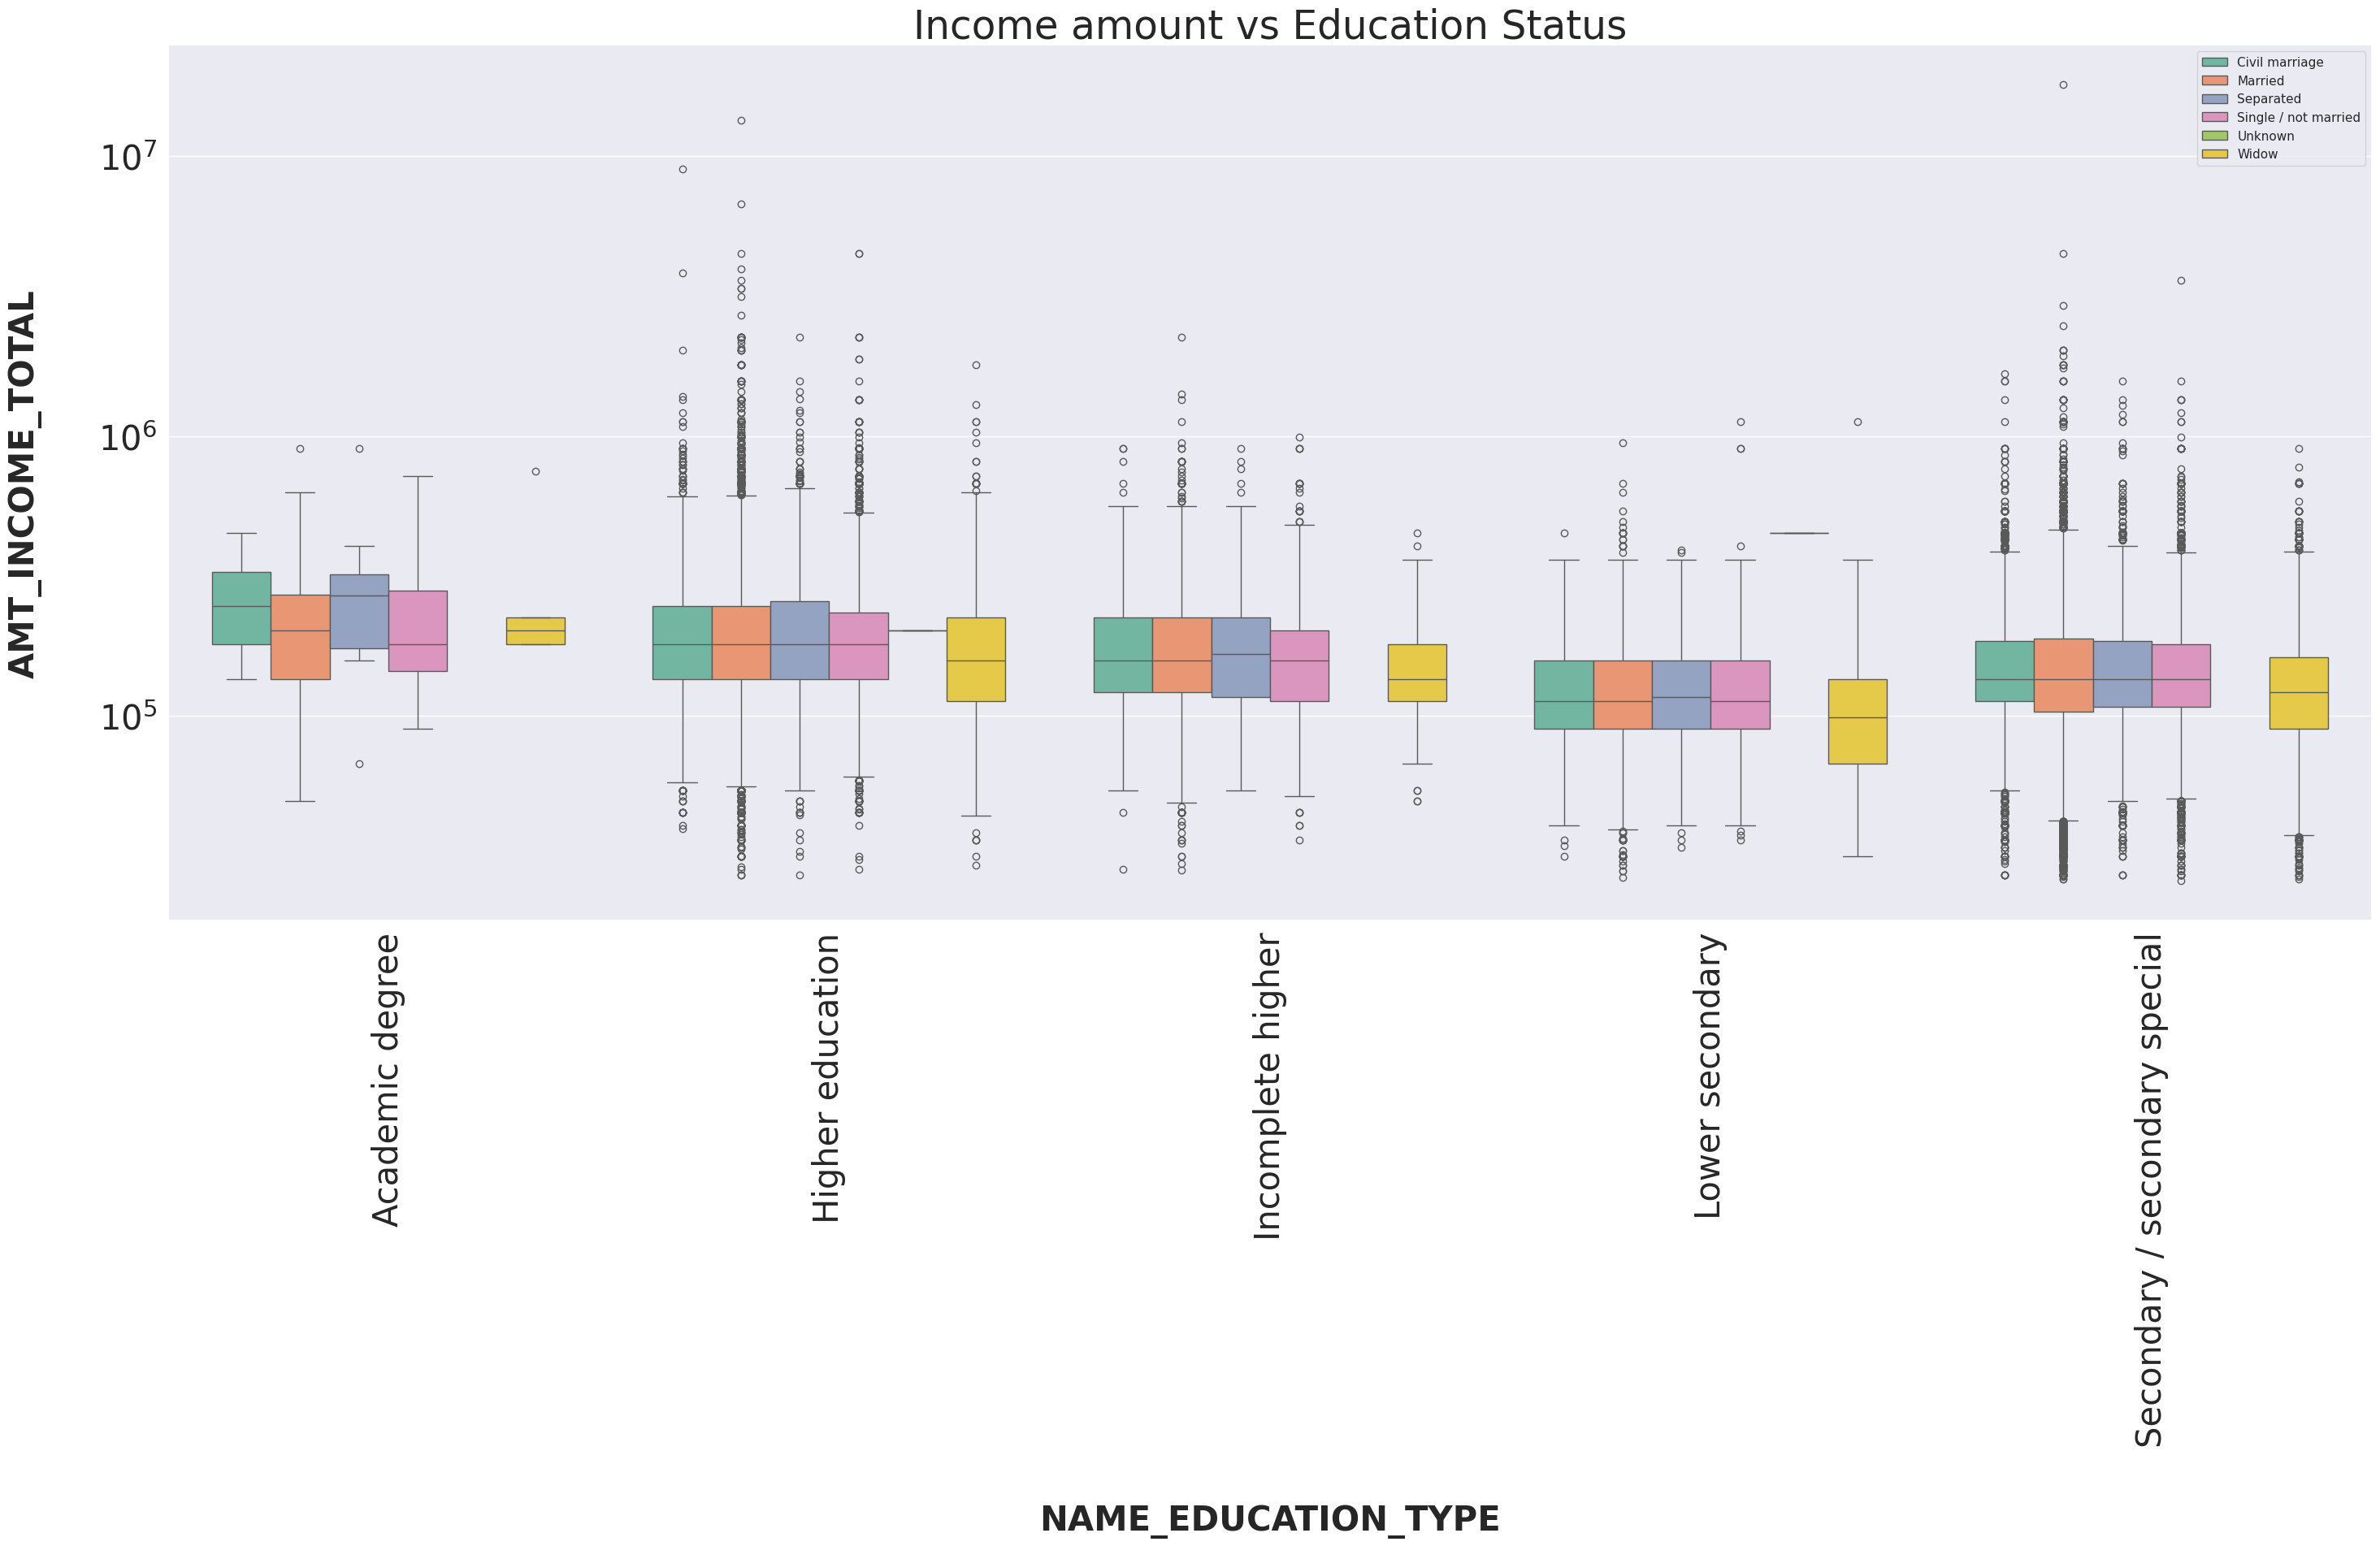

In [ ]:
#NAME_EDUCATION_TYPE VS AMT_INCOME_TOTAL VS NAME_FAMILY_STATUS

#As the values are too large, it is better to use log for better analysis
plt.figure(figsize=(35,14))
plt.yscale('log')
plt.xticks(rotation = 90)

#Boxplot w.r.t Data Target 0
sns.boxplot(data =Target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')

#Adjusting legend position
plt.legend( loc = 'upper right')
plt.title('Income amount vs Education Status',fontsize=35 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_INCOME_TOTAL",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

OBSERVATIONS

Widowed Client with Academic degree have less noticeable outliers and doesn’t have First and Third quartile. Also, Clients with all types of family statuses having academic degrees have very less outliers as compared to other types of education.

Income of the clients with all types of family status having rest of the education type lie Below the First quartile i.e. 25%
Clients having Higher Education, Incomplete Higher Education, Lower Secondary Education and Secondary/Secondary Special have a higher number of outliers.

From the above figure, we can say that some of the clients having Higher Education tend to have the highest income compared to others.
Though some of the clients who haven’t completed their Higher Education tend to have higher incomes.

Some of the clients having Secondary/Secondary Special Education tend to have higher incomes.

MODELLING

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
import pickle
import gc

In [ ]:
!pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 13.6 MB/s eta 0:00:00


In [ ]:
import lightgbm as lgb

In [ ]:
model_df = app_df.drop(['SK_ID_CURR'],axis=1)

In [ ]:
model_df.head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0       1         Cash loans           M            N               Y   
1       0         Cash loans           F            N               N   
2       0    Revolving loans           M            Y               Y   
3       0         Cash loans           F            N               Y   
4       0         Cash loans           M            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2   Unaccompanied          Working  Secondary / secondary special   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0          25            637             3648.0             2120   
1          45           1188             1186.0              291   
2          52            225             4260.0             2531   
3          52           3039             9833.0             2437   
4          54           3038             4311.0             3458   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0        Laborers              1.0                     2   
1      Core staff              2.0                     1   
2        Laborers              1.0                     2   
3        Laborers              2.0                     2   
4      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0         

In [ ]:
y_label = model_df.pop('TARGET').values

In [ ]:
y_label

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
model_df.head()

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0         Cash loans           M            N               Y             0   
1         Cash loans           F            N               N             0   
2    Revolving loans           M            Y               Y             0   
3         Cash loans           F            N               Y             0   
4         Cash loans           M            N               Y             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  \
0          202500.0    406597.5      24700.5         351000.0   Unaccompanied   
1          270000.0   1293502.5      35698.5        1129500.0          Family   
2           67500.0    135000.0       6750.0         135000.0   Unaccompanied   
3          135000.0    312682.5      29686.5         297000.0   Unaccompanied   
4          121500.0    513000.0      21865.5         513000.0   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  House / apartment                    0.018801          25            637   
1  House / apartment                    0.003541          45           1188   
2  House / apartment                    0.010032          52            225   
3  House / apartment                    0.008019          52           3039   
4  House / apartment                    0.028663          54           3038   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0             3648.0             2120        Laborers              1.0   
1             1186.0              291      Core staff              2.0   
2             4260.0             2531        Laborers              1.0   
3             9833.0             2437        Laborers              2.0   
4             4311.0             3458      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0              

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(model_df, y_label, stratify = y_label, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, stratify = y_temp, test_size=0.5, random_state=42)
print('Shape of X_train:',X_train.shape)
print('Shape of X_val:',X_val.shape)
print('Shape of X_test:',X_test.shape)

Shape of X_train: (215257, 50)
Shape of X_val: (46127, 50)
Shape of X_test: (46127, 50)


STANDARDIZATION

In [ ]:
# Seperation of columns into numeric and categorical columns
num_cols = np.array(X_train.select_dtypes(include= ['int64','float64']).columns)
cat_cols = np.array(X_train.select_dtypes(include= ['category','object']).columns)

In [ ]:
#NUMERIC COLUMN STANDARDIZATION
X_train_num = X_train[num_cols]
X_val_num = X_val[num_cols]
X_test_num = X_test[num_cols]


#SCALING
scaler_num = StandardScaler()
X_train_num_scaled = scaler_num.fit_transform(X_train_num)
X_val_num_scaled = scaler_num.transform(X_val_num)
X_test_num_scaled = scaler_num.transform(X_test_num)

X_train_num_final = pd.DataFrame(X_train_num_scaled, columns=num_cols)
X_val_num_final = pd.DataFrame(X_val_num_scaled, columns=num_cols)
X_test_num_final = pd.DataFrame(X_test_num_scaled, columns=num_cols)

In [ ]:
#CATEGORICAL COLUMN STANDARDIZATION

X_train_cat = X_train[cat_cols]
X_val_cat = X_val[cat_cols]
X_test_cat = X_test[cat_cols]

X_train_cat1= pd.DataFrame(X_train_cat, columns=cat_cols)
X_val_cat1= pd.DataFrame(X_val_cat, columns=cat_cols)
X_test_cat1= pd.DataFrame(X_test_cat, columns=cat_cols)

#ONE HOT ENCODING
ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')
X_train_cat2 = ohe.fit_transform(X_train_cat1)
X_val_cat2 = ohe.transform(X_val_cat1)
X_test_cat2 = ohe.transform(X_test_cat1)

cat_cols_ohe = list(ohe.get_feature_names_out(input_features=cat_cols))
X_train_cat_final = pd.DataFrame(X_train_cat2, columns = cat_cols_ohe)
X_val_cat_final = pd.DataFrame(X_val_cat2, columns = cat_cols_ohe)
X_test_cat_final = pd.DataFrame(X_test_cat2, columns = cat_cols_ohe)

In [ ]:
# STANDARDIZED DATA

X_train_final = pd.concat([X_train_num_final,X_train_cat_final], axis = 1)
X_val_final = pd.concat([X_val_num_final,X_val_cat_final], axis = 1)
X_test_final = pd.concat([X_test_num_final,X_test_cat_final], axis = 1)
print(X_train_final.shape)
print(X_val_final.shape)
print(X_test_final.shape)

(215257, 179)
(46127, 179)
(46127, 179)


In [ ]:
#RENAMING SPECIAL CHARACTER COLUMN NAMES

import re
X_train_final = X_train_final.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
X_val_final = X_val_final.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
X_test_final = X_test_final.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

MODELLING DATA SAVING

In [ ]:
# Saving the Dataframes into CSV files
X_train_final.to_csv('X_train_final.csv')
X_val_final.to_csv('X_val_final.csv')
X_test_final.to_csv('X_test_final.csv')
# Saving the numpy arrays into text files
np.savetxt('y_label.txt', y_label)
np.savetxt('y_train.txt', y_train)
np.savetxt('y_val.txt', y_val)
np.savetxt('y_test.txt', y_test)

FEATURE SELECTION

In [ ]:
model_sk = lgb.LGBMClassifier(boosting_type='gbdt', max_depth=7, learning_rate=0.01, n_estimators= 2000,
                 class_weight='balanced', subsample=0.9, colsample_bytree= 0.8, n_jobs=-1, early_stopping_rounds=100)

train_features, val_features, train_y, val_y = train_test_split(X_train_final, y_train, test_size = 0.15, random_state = 42)

model_sk.fit(train_features, train_y, eval_set = [(val_features, val_y)], eval_metric = 'auc')

[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Info] Number of positive: 14802, number of negative: 168166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023441 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3552
[LightGBM] [Info] Number of data points in the train set: 182968, number of used features: 173
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

LGBMClassifier(class_weight='balanced', colsample_bytree=0.8,
               early_stopping_rounds=100, learning_rate=0.01, max_depth=7,
               n_estimators=2000, n_jobs=-1, subsample=0.9)

In [ ]:
#FEATURE IMPORTANCE

feature_imp = pd.DataFrame(sorted(zip(model_sk.feature_importances_, X_train_final.columns)), columns=['Value','Feature'])
features_df = feature_imp.sort_values(by="Value", ascending=False)
selected_features = list(features_df[features_df['Value']>=50]['Feature'])

# Save selected features into pickle file
with open('select_features.txt','wb') as pf:
    pickle.dump(selected_features, pf)
print('The no. of features selected:',len(selected_features))

The no. of features selected: 70


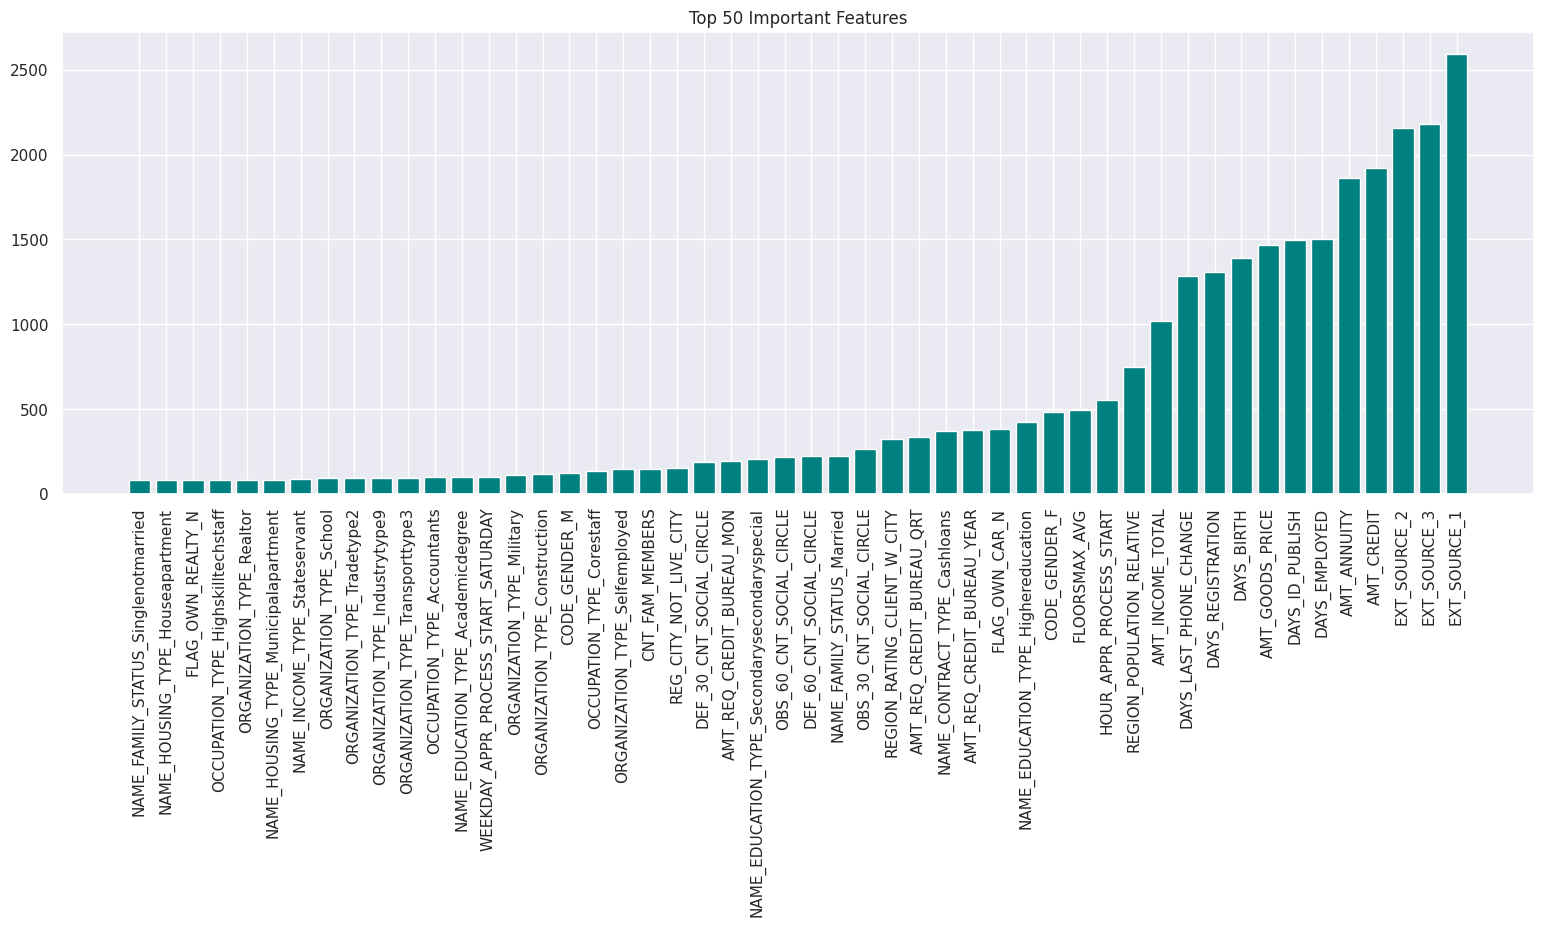

In [ ]:
# Feature importance Plot

top50_features = features_df.head(50)

# Create a data frame for visualization.
top50_features_df = pd.DataFrame({"Features": pd.DataFrame(top50_features).sort_values(by='Value')['Feature'],
                                  "Importances": top50_features.sort_values(by='Value')['Value']})

# Plot the feature importances in bars.
plt.figure(figsize=(19, 6))
plt.bar(top50_features_df['Features'], top50_features_df['Importances'], color='teal')
plt.xticks(rotation=90)
plt.title("Top 50 Important Features")
plt.show()

RE-USABLE PLOT FUNCTIONS

In [ ]:
def plot_confusion_matrix(test_y, predicted_y):
    # Confusion matrix
    C = confusion_matrix(test_y, predicted_y)

    # Recall matrix
    A = (((C.T)/(C.sum(axis=1))).T)

    # Precision matrix
    B = (C/C.sum(axis=0))

    plt.figure(figsize=(20,4))

    labels = ['Re-paid(0)','Not Re-paid(1)']
    cmap=sns.light_palette("purple")
    plt.subplot(1,3,1)
    sns.heatmap(C, annot=True, cmap=cmap,fmt="d", xticklabels = labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title('Confusion matrix')

    plt.subplot(1,3,2)
    sns.heatmap(A, annot=True, cmap=cmap, xticklabels = labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title('Recall matrix')

    plt.subplot(1,3,3)
    sns.heatmap(B, annot=True, cmap=cmap, xticklabels = labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title('Precision matrix')

    plt.show()

In [ ]:
def cv_plot(alpha, cv_auc):

    fig, ax = plt.subplots()
    ax.plot(np.log10(alpha), cv_auc,c='g')
    for i, txt in enumerate(np.round(cv_auc,3)):
        ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_auc[i]))
    plt.grid()
    plt.xticks(np.log10(alpha))
    plt.title("Cross Validation Error for each alpha")
    plt.xlabel("Alpha i's")
    plt.ylabel("Error measure")
    plt.show()

ML MODELS

In [ ]:
model_results = [[],[],[]]

For alpha 9.999999999999999e-05, cross validation AUC score 0.7433319283871069
For alpha 0.001, cross validation AUC score 0.7417649920043707
For alpha 0.01, cross validation AUC score 0.7253001815503954
For alpha 0.09999999999999999, cross validation AUC score 0.7055227210556738
For alpha 1.0, cross validation AUC score 0.5
For alpha 10.0, cross validation AUC score 0.5
For alpha 100.0, cross validation AUC score 0.5
For alpha 1000.0, cross validation AUC score 0.5
For alpha 10000.0, cross validation AUC score 0.5


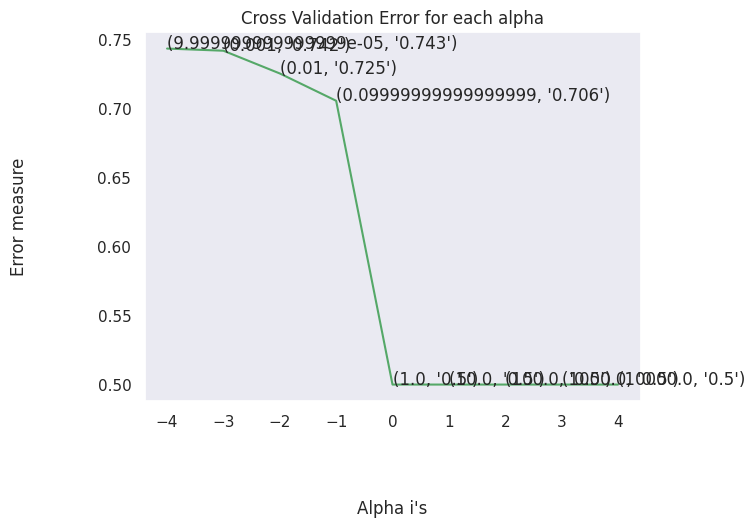

The Optimal C value is: 9.999999999999999e-05


In [ ]:
#LOGISTIC REGRESSION

alpha = np.logspace(-4,4,9)
cv_auc_score = []
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1',class_weight = 'balanced', loss='log_loss', random_state=28)
    clf.fit(X_train_final[selected_features], y_train)
    sig_clf = CalibratedClassifierCV(clf, method='sigmoid')
    sig_clf.fit(X_train_final[selected_features], y_train)
    y_pred_prob = sig_clf.predict_proba(X_val_final[selected_features])[:,1]
    cv_auc_score.append(roc_auc_score(y_val,y_pred_prob))
    print('For alpha {0}, cross validation AUC score {1}'.format(i,roc_auc_score(y_val,y_pred_prob)))
cv_plot(alpha, cv_auc_score)
print('The Optimal C value is:', alpha[np.argmax(cv_auc_score)])

For best alpha 9.999999999999999e-05, The Train AUC score is 0.7426773310819729
For best alpha 9.999999999999999e-05, The Cross validated AUC score is 0.7433319283871069
For best alpha 9.999999999999999e-05, The Test AUC score is 0.7456717667337696
The test AUC score is : 0.7456717667337696
The test accuracy score is : 0.654345611030416
The percentage of misclassified points 34.57% :


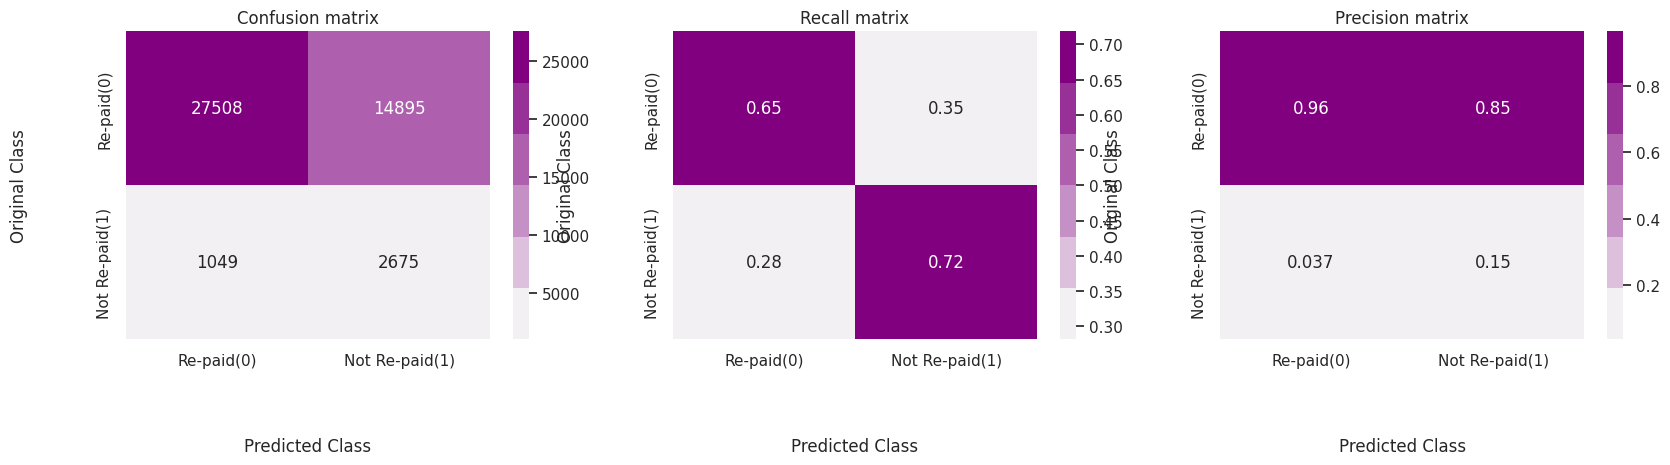

In [ ]:
best_alpha = alpha[np.argmax(cv_auc_score)]
logreg = SGDClassifier(alpha = best_alpha, class_weight = 'balanced', penalty = 'l1', loss='log_loss', random_state = 28)
logreg.fit(X_train_final[selected_features], y_train)
logreg_sig_clf = CalibratedClassifierCV(logreg, method='sigmoid')
logreg_sig_clf.fit(X_train_final[selected_features], y_train)
y_pred_prob = logreg_sig_clf.predict_proba(X_train_final[selected_features])[:,1]
print('For best alpha {0}, The Train AUC score is {1}'.format(best_alpha, roc_auc_score(y_train,y_pred_prob)))
model_results[0].append(roc_auc_score(y_train,y_pred_prob))
y_pred_prob = logreg_sig_clf.predict_proba(X_val_final[selected_features])[:,1]
print('For best alpha {0}, The Cross validated AUC score is {1}'.format(best_alpha, roc_auc_score(y_val,y_pred_prob)))
model_results[0].append(roc_auc_score(y_val,y_pred_prob))
y_pred_prob = logreg_sig_clf.predict_proba(X_test_final[selected_features])[:,1]
print('For best alpha {0}, The Test AUC score is {1}'.format(best_alpha, roc_auc_score(y_test,y_pred_prob)))
model_results[0].append(roc_auc_score(y_test,y_pred_prob))
y_pred = logreg.predict(X_test_final[selected_features])
print('The test AUC score is :', roc_auc_score(y_test,y_pred_prob))
print('The test accuracy score is :', accuracy_score(y_test, y_pred))
model_results[0].append(accuracy_score(y_test,y_pred))
print('The percentage of misclassified points {:05.2f}% :'.format((1-accuracy_score(y_test, y_pred))*100))
plot_confusion_matrix(y_test, y_pred)

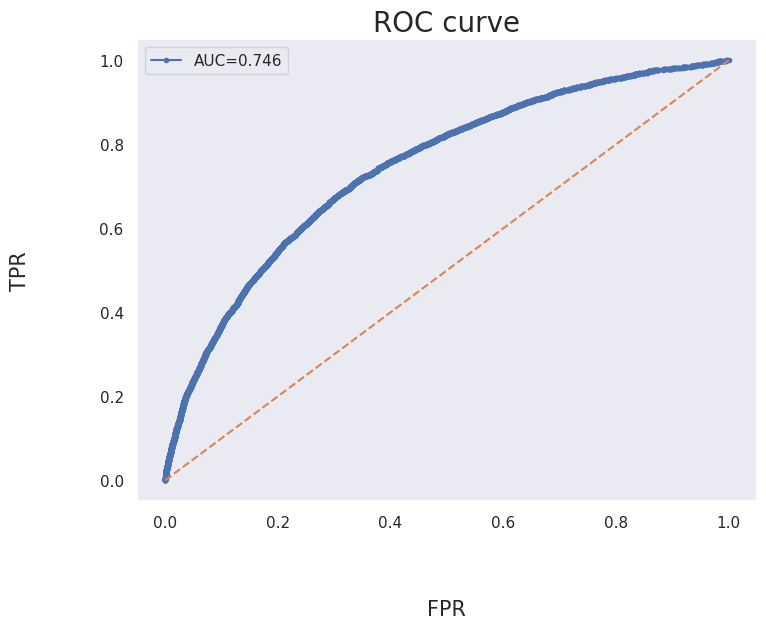

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test,y_pred_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC curve', fontsize = 20)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.grid()
plt.legend(["AUC=%.3f"%auc])
plt.show()

In [ ]:
#RANDOM FOREST CLASSIFIER

alpha = [200,500,1000]
max_depth = [7, 10]
cv_auc_score = []
for i in alpha:
    for j in max_depth:
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j,class_weight='balanced',
                                     random_state=42, n_jobs=-1)
        clf.fit(X_train_final[selected_features], y_train)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(X_train_final[selected_features], y_train)
        y_pred_prob = sig_clf.predict_proba(X_val_final[selected_features])[:,1]
        cv_auc_score.append(roc_auc_score(y_val,y_pred_prob))
        print('For n_estimators {0}, max_depth {1} cross validation AUC score {2}'.
              format(i,j,roc_auc_score(y_val,y_pred_prob)))

For n_estimators 200, max_depth 7 cross validation AUC score 0.7368550114492689
For n_estimators 200, max_depth 10 cross validation AUC score 0.7407382029416326
For n_estimators 500, max_depth 7 cross validation AUC score 0.7372388343315087
For n_estimators 500, max_depth 10 cross validation AUC score 0.7409792281837262
For n_estimators 1000, max_depth 7 cross validation AUC score 0.7372293858380458
For n_estimators 1000, max_depth 10 cross validation AUC score 0.740921751959416


The optimal values are: n_estimators 500, max_depth 10 
For best n_estimators 500 best max_depth 10, The Train AUC score is 0.8033919386086404
For best n_estimators 500 best max_depth 10, The Validation AUC score is 0.7409792281837262
For best n_estimators 500 best max_depth 10, The Test AUC score is 0.7444952266489666
The test AUC score is : 0.7444952266489666
The accuracy score is : 0.9192663732737876
The percentage of misclassified points 08.07% :


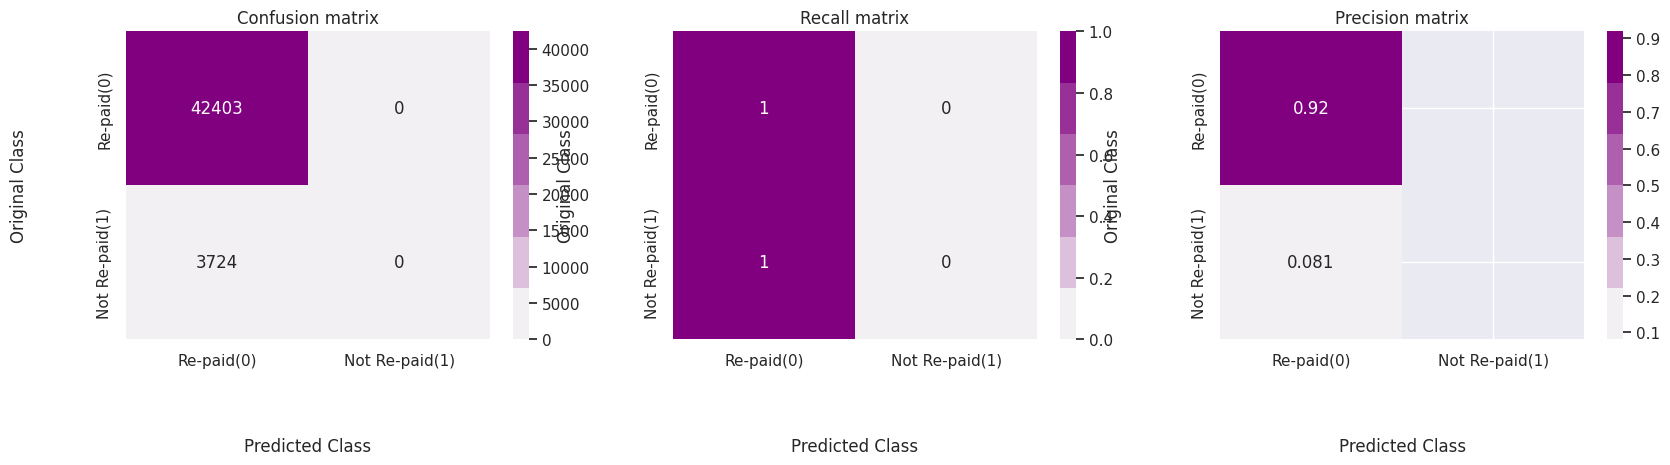

In [ ]:
best_alpha = np.argmax(cv_auc_score)
print('The optimal values are: n_estimators {0}, max_depth {1} '.format(alpha[int(best_alpha/2)],
                                                                        max_depth[int(best_alpha%2)]))
rf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)],
                            class_weight='balanced', random_state=42, n_jobs=-1)
rf.fit(X_train_final[selected_features], y_train)
rf_sig_clf = CalibratedClassifierCV(rf, method="sigmoid")
rf_sig_clf.fit(X_train_final[selected_features], y_train)
y_pred_prob = rf_sig_clf.predict_proba(X_train_final[selected_features])[:,1]
print('For best n_estimators {0} best max_depth {1}, The Train AUC score is {2}'.format(alpha[int(best_alpha/2)],
                                                    max_depth[int(best_alpha%2)],roc_auc_score(y_train,y_pred_prob)))
model_results[1].append(roc_auc_score(y_train,y_pred_prob))
y_pred_prob = rf_sig_clf.predict_proba(X_val_final[selected_features])[:,1]
print('For best n_estimators {0} best max_depth {1}, The Validation AUC score is {2}'.format(alpha[int(best_alpha/2)],
                                                            max_depth[int(best_alpha%2)],roc_auc_score(y_val,y_pred_prob)))
model_results[1].append(roc_auc_score(y_val,y_pred_prob))
y_pred_prob = rf_sig_clf.predict_proba(X_test_final[selected_features])[:,1]
print('For best n_estimators {0} best max_depth {1}, The Test AUC score is {2}'.format(alpha[int(best_alpha/2)],
                                                        max_depth[int(best_alpha%2)],roc_auc_score(y_test,y_pred_prob)))
model_results[1].append(roc_auc_score(y_test,y_pred_prob))
y_pred = rf_sig_clf.predict(X_test_final[selected_features])
print('The test AUC score is :', roc_auc_score(y_test,y_pred_prob))
print('The accuracy score is :', accuracy_score(y_test, y_pred))
model_results[1].append(accuracy_score(y_test,y_pred))
print('The percentage of misclassified points {:05.2f}% :'.format((1-accuracy_score(y_test, y_pred))*100))
plot_confusion_matrix(y_test, y_pred)

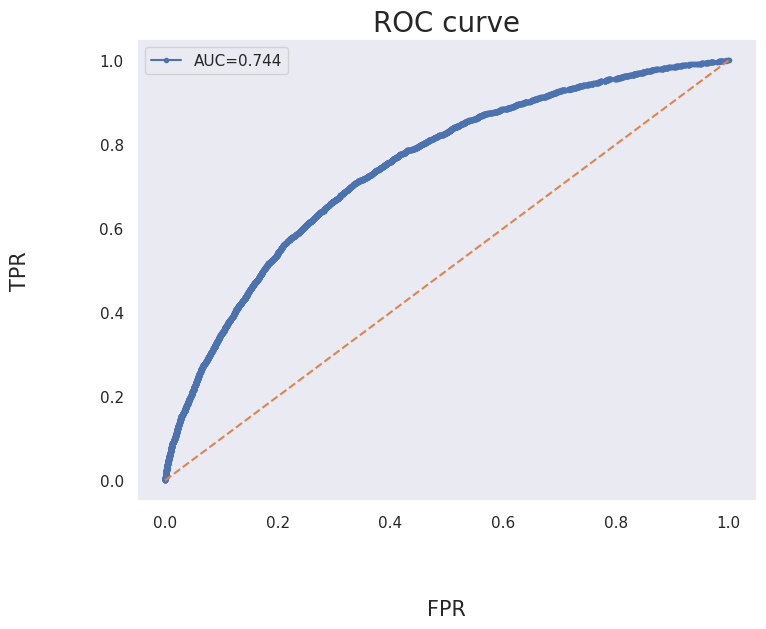

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test,y_pred_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC curve', fontsize = 20)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.grid()
plt.legend(["AUC=%.3f"%auc])
plt.show()

[LightGBM] [Warning] Using too small ``bin_construct_sample_cnt`` may encounter unexpected errors and poor accuracy.
[LightGBM] [Info] Number of positive: 17377, number of negative: 197880
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034787 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 843
[LightGBM] [Info] Number of data points in the train set: 215257, number of used features: 67
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491346 -> initscore=-0.034618
[LightGBM] [Info] Start training from score -0.034618
For  max_depth 10 and some other parameters, cross validation AUC score 0.7503983819214299
The optimal  max_depth:  3
[LightGBM] [Info] Number of positive: 17377, number of negative: 197880
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035046 seconds.
You can set `force_row_wise=tr

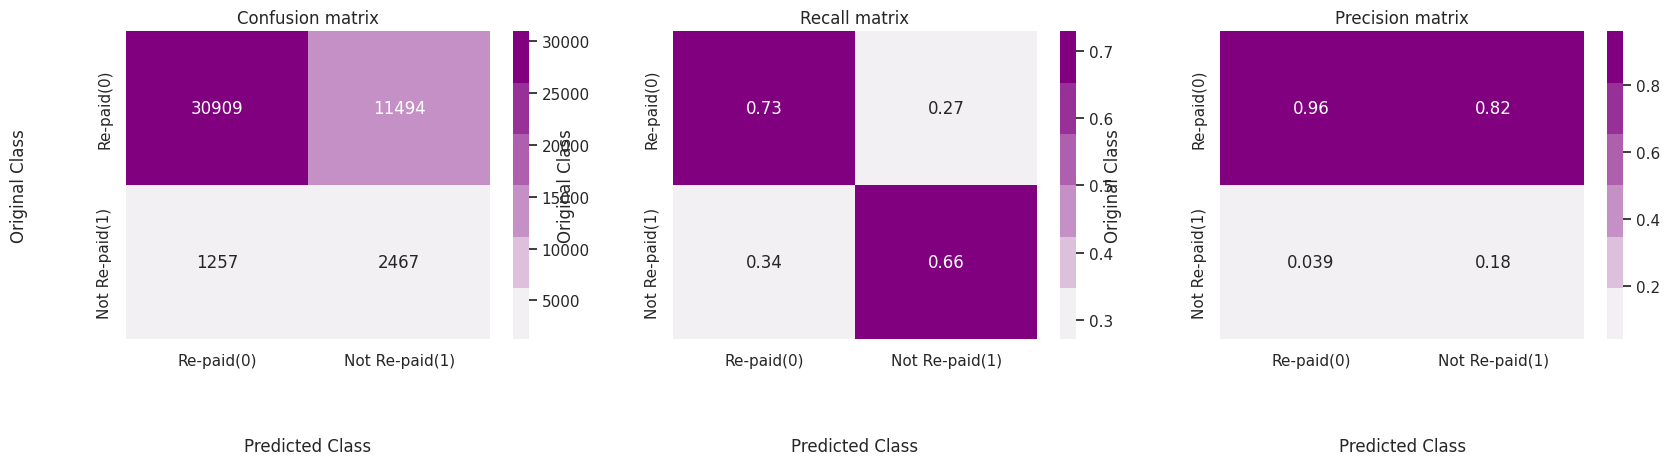

In [ ]:
#LIGHTGBM

weight = np.ones((len(X_train_final),), dtype=int)
for i in range(len(X_train_final)):
    if y_train[i]== 0:
        weight[i]=1
    else:
        weight[i]=11

train_data=lgb.Dataset(X_train_final[selected_features], label = y_train, weight= weight )
valid_data=lgb.Dataset(X_val_final[selected_features], label = y_val)
cv_auc_score = []
max_depth = [3, 5, 7, 10]
for i in max_depth:

    params = {'boosting_type': 'gbdt',
          'max_depth' : i,
          'objective': 'binary',
          'nthread': 5,
          'num_leaves': 32,
          'learning_rate': 0.05,
          'max_bin': 512,
          'subsample_for_bin': 200,
          'subsample': 0.7,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'reg_alpha': 20,
          'reg_lambda': 20,
          'min_split_gain': 0.5,
          'min_child_weight': 1,
          'min_child_samples': 10,
          'scale_pos_weight': 1,
          'num_class' : 1,
          'metric' : 'auc'
          }
lgbm = lgb.train(params,
              train_data,
              2500,
              valid_sets=valid_data
              )
y_pred_prob = lgbm.predict(X_val_final[selected_features])
cv_auc_score.append(roc_auc_score(y_val,y_pred_prob))
print('For  max_depth {0} and some other parameters, cross validation AUC score {1}'.format(i,roc_auc_score(y_val,y_pred_prob)))
print('The optimal  max_depth: ', max_depth[np.argmax(cv_auc_score)])
params = {'boosting_type': 'gbdt',
      'max_depth' : max_depth[np.argmax(cv_auc_score)],
      'objective': 'binary',
      'nthread': 5,
      'num_leaves': 32,
      'learning_rate': 0.05,
      'max_bin': 512,
      'subsample_for_bin': 200,
      'subsample': 0.7,
      'subsample_freq': 1,
      'colsample_bytree': 0.8,
      'reg_alpha': 20,
      'reg_lambda': 20,
      'min_split_gain': 0.5,
      'min_child_weight': 1,
      'min_child_samples': 10,
      'scale_pos_weight': 1,
      'num_class' : 1,
      'metric' : 'auc'
      }
lgbm = lgb.train(params,
                 train_data,
                 2500,
                 valid_sets=valid_data
                 )
y_pred_prob = lgbm.predict(X_train_final[selected_features])
print('For best max_depth {0}, The Train AUC score is {1}'.format(max_depth[np.argmax(cv_auc_score)],
                                                                  roc_auc_score(y_train,y_pred_prob) ))
model_results[2].append(roc_auc_score(y_train,y_pred_prob))
y_pred_prob = lgbm.predict(X_val_final[selected_features])
print('For best max_depth {0}, The Cross validated AUC score is {1}'.format(max_depth[np.argmax(cv_auc_score)],
                                                                            roc_auc_score(y_val,y_pred_prob) ))
model_results[2].append(roc_auc_score(y_val,y_pred_prob))
y_pred_prob = lgbm.predict(X_test_final[selected_features])
print('For best max_depth {0}, The Test AUC score is {1}'.format(max_depth[np.argmax(cv_auc_score)],
                                                                 roc_auc_score(y_test,y_pred_prob) ))
model_results[2].append(roc_auc_score(y_test,y_pred_prob))
y_pred = np.ones((len(X_test_final),), dtype=int)
for i in range(len(y_pred_prob)):
    if y_pred_prob[i]<=0.5:
        y_pred[i]=0
    else:
        y_pred[i]=1
print('The test AUC score is :', roc_auc_score(y_test,y_pred_prob))
print('The accuracy score is :', accuracy_score(y_test, y_pred))
model_results[2].append(accuracy_score(y_test,y_pred))
print('The percentage of misclassified points {:05.2f}% :'.format((1-accuracy_score(y_test, y_pred))*100))
plot_confusion_matrix(y_test, y_pred)

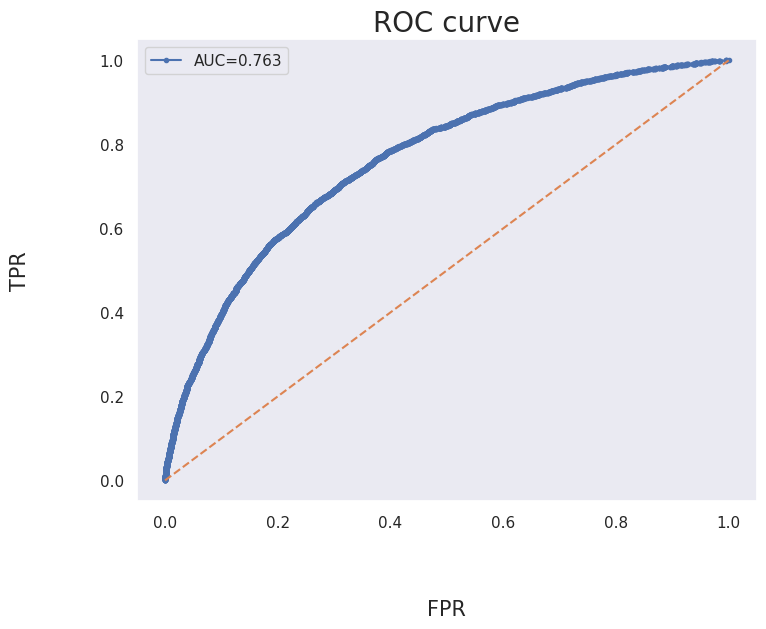

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test,y_pred_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC curve', fontsize = 20)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.grid()
plt.legend(["AUC=%.3f"%auc])
plt.show()

In [ ]:
eval_score = pd.DataFrame(model_results, columns=['Train AUC','Cross Val AUC','Test AUC','Accuracy'], index=['Logistic Regression','Random Forest','LightGBM'])
eval_score

Train AUC  Cross Val AUC  Test AUC  Accuracy
Logistic Regression   0.742677       0.743332  0.745672  0.654346
Random Forest         0.803392       0.740979  0.744495  0.919266
LightGBM              0.804518       0.758411  0.763158  0.723568

In [ ]:
# Saving the best performing LightGBM model as a pickle file for the future use
with open('final_model.pkl','wb') as fp:
    pickle.dump(lgbm, fp)